<a href="https://colab.research.google.com/github/konorbj/optimization_methods/blob/master/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.patches
import matplotlib.path
import time
import math
import pylab
import random
import warnings
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn.datasets import make_spd_matrix
from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, \
  title, show, xlim, ylim, axvline, axhline, gca
import sympy as sym

In [ ]:
warnings.filterwarnings("ignore")

# Лабораторная работа №0

Цель лабораторной работы - создать программу для визуализации функции множества переменных.

Создадим функцию draw_func, которая принимает саму функцию, пределы для x1 и x2, количество  линий уровня и точки кривой, которая будет отрисовываться поверх графика функции.

In [ ]:
def draw_func(func, x1, x2, level_num, dots):
  # увеличим размер графика
  plt.figure(figsize=(20, 10))

  # сгенерируем результаты работы функции для отрисовки графика
  x = np.arange(x1[1], x1[0], 0.1)
  y = np.arange(x2[1], x2[0], 0.1)
  X, Y = meshgrid(x, y)
  func_results = func(X, Y)

  # возьмём минимальный и максимальный результаты функции
  min_result = np.min(func_results)
  max_result = np.max(func_results)

  # подсчитаем расстояние между линиями уровня
  level_line_dist = round(abs(max_result - min_result) / level_num, 2)

  # если больше 3 линий уровня, то уменьшим расстояние
  if level_num > 3:
    level_line_dist -= 0.04 / level_num

  # отрисовываем график, выводим линии уровня и шкалу
  # также ограничиваем график, задаными пределами значений
  im = imshow(func_results, cmap=cm.RdBu)
  cset = contour(func_results, 
                 np.arange(
                     min_result, 
                     max_result, 
                     level_line_dist
                  ), linewidths=2, cmap=cm.Set2)
  gca().get_ylim()
  clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
  colorbar(im)

  # задаём ломаную линию по переданным точкам
  codes = [matplotlib.path.Path.MOVETO]

  codes += [matplotlib.path.Path.LINETO] * (len(dots) - 1)

  path = matplotlib.patches.Path(dots, codes)
  path_patch = matplotlib.patches.PathPatch(path, fill=False)
  gca().add_patch(path_patch)

  # выводим график
  show()

Проверим функцию тестовой функцией. Зададим границы значений переменных и координаты прямой, а также количество линий уровня. 

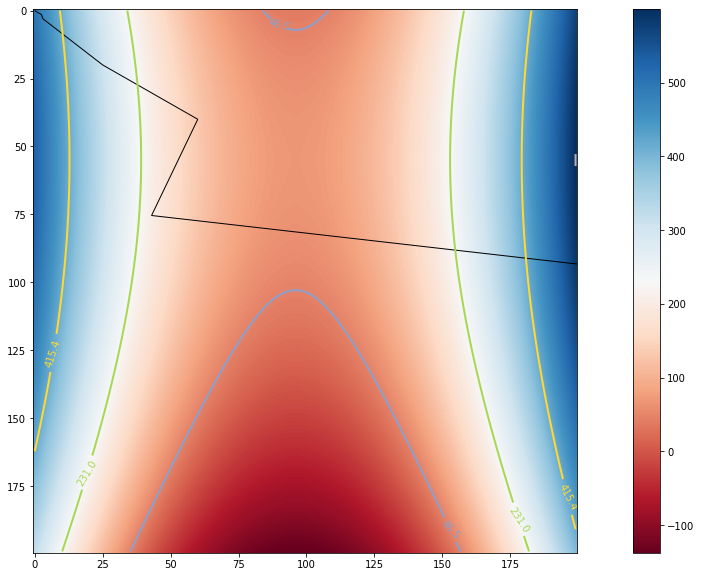

In [ ]:
def z_func(x1, x2):
  return 5 * x1**2 - x2**2 + 4 * x1 - 9 * x2 + 50

draw_func(z_func, (10, -10), (10, -10), 4, [
                                            (0.0, 0.0), 
                                            (2.5, 1.5), 
                                            (3.0, 3.0), 
                                            (25.0, 20.0), 
                                            (60.0, 40.0), 
                                            (43.0, 75.4),
                                            (250.0, 99.0)
                                          ])

Попробуем изменить границы x2.

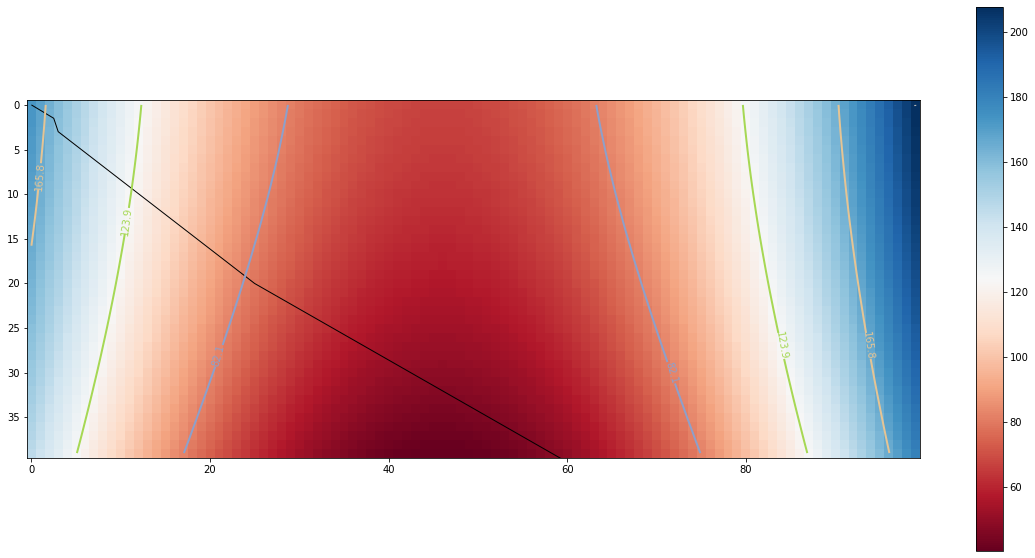

In [ ]:
draw_func(z_func, (5, -5), (1, -3), 4, [
                                            (0.0, 0.0), 
                                            (2.5, 1.5), 
                                            (3.0, 3.0), 
                                            (25.0, 20.0), 
                                            (60.0, 40.0), 
                                            (43.0, 75.4),
                                            (250.0, 99.0)
                                          ])

Таким образом, была разработана программа для отрисовки функции двух переменных и кривой задаваемой координатами от пользователя. Также реализована возможность выбирать количество линий уровня.

# Лабораторная работа №1

Цель работы - нахождение экстремума функции, применяя различные методы одномерной оптимизации: дихотомия-1, дихотомия-2, метод Фибоначчи и метод золотого сечения.

Проверять методы будем при помощи функции $$cosh$$

In [ ]:
def my_fun(x):
  return sym.cosh(x)

Реализуем метод дихотомия-1, который вычисляет две точки в окресностях середины заданного отрезка. Метод принимает функцию, нижнюю границу х, верхнюю границу х, эпсилон - точность поиска экстремума и дельта - значение сдвига границ для выбора новых точек.

In [ ]:
def dichotomy(func, a, b, epsilon, delta):
    # x - результат
    x = 0
    # количество итераций
    iter_count = 0

    # ищем точки разница между которыми будет меньше эпсилон
    while (b - a) > epsilon:
        # считаем итерации
        iter_count += 1

        # берём 2 возможных значения x
        lamda = (a + b - delta) / 2
        mu = (a + b + delta) / 2

        # если функция от лямбды меньше, то лямбда - новый х 
        # меняем правую границу
        if func(lamda) < func(mu):
            b = mu
            x = lamda
        # в другом случае мю - новый х
        # меняем левую границу
        else:
            a = lamda
            x = mu

    return x, iter_count

Реализуем метод дихотомия-2. Для него понадобится функция deriv, которая считает значение производной в точке. Находим производную функции при помощи sympy, превращаем её в лямбда функцию и считаем значение лямбды в заданной точке.

In [ ]:
def deriv(func, point):
    x = sym.Symbol('x')
    y = func(x)
    d = y.diff()
    f = sym.lambdify(x, d, 'numpy')
    return f(point)


def dichotomy2(func, a, b, epsilon):
    # считаем середину отрезка ab
    x = (a + b) / 2
    iter_count = 0
    
    # ищем результат пока производная в точке предпологаемого результата
    # не будет меньше чем эпсилон
    while (abs(deriv(func, x)) > epsilon):
        iter_count += 1
        # если проиводная меньше 0 - меняем границу слева 
        # и пересчитываем середину
        if deriv(func, x) < 0:
            a = x
            x = (a + b) / 2
        # иначе - меняем правую границу и пересчитываем середину
        else:
            b = x
            x = (a + b) / 2  
    
    return a, iter_count

Реализуем метод Фибоначчи. Упростим его работу заранее просчитав как можно больше значений чисел Фибоначчи.

In [ ]:
PHI = 1.6180339887499
REVERSED_PHI = 1/PHI
PSI = -0.61803398871499
REVERSE_SQUARE_ROOT_FIVE = 0.447213595499958

def fibonacci_number(n):
    return (PHI ** n - PSI ** n) * REVERSE_SQUARE_ROOT_FIVE

In [ ]:
fibonacci_numbers = [fibonacci_number(n) for n in range(1, 1000)]

Теперь создадим функцию для самого метода Фибоначчи, где эпсилон - точность, a,b - границы, func - функция для оптимизации.

In [ ]:
def fibonacci(func, a, b, epsilon):
    # x - результат
    x = 0
    # максимальное количество итераций
    n = 100
    iter_count = 0

    # пока разница не меньше эпсилон либо не дошли до последней итерации
    while (b - a) > epsilon or n != 1:
        iter_count += 1
        # считаем лямбду и мю, чтобы приблизится к результату
        lamda = a + (b - a) * (fibonacci_numbers[n - 2] / fibonacci_numbers[n])
        mu = a + (b - a) * (fibonacci_numbers[n - 1] / fibonacci_numbers[n])

        # если значение от лямбды меньше либо равно, то меняем 
        # правую границу на мю
        if func(lamda) <= func(mu):
            b = mu
            x = lamda
        # в другом случаем меняем левую границу на лямбду
        else:
            a = lamda
            x = mu

        n -= 1

    # если последняя итерация, то возвращаем среднее мю и лямбды
    if n == 1:
        return (mu + lamda) / 2, iter_count

    return x, iter_count

Осталось реализовать метод золотого сечения. Он также получает на вход функцию, границы и эпсилон.

In [ ]:
def golden_section(func, a, b, epsilon):
    # результат
    x = 0
    iter_count = 0

    # пока разница больше эпсилон
    while (b - a) > epsilon:
        iter_count += 1
        # считаем лямбда и мю (предпологаемые новые границы)
        lamda = b - (b - a) * REVERSED_PHI
        mu = a + (b - a) * REVERSED_PHI

        # если значение от лямбды меньше чем от мю, то меняем правую границу,
        # а лямбда станет новым результатом
        if func(lamda) <= func(mu):
            b = mu
            x = lamda
        # если значение от мю меньше чем от лямбды, то меняем левую границу,
        # а мю станет новым результатом
        else:
            a = lamda
            x = mu

    return x, iter_count

Зададим тестовые данные для методов оптимизации.

In [ ]:
epsilon = 0.00001
delta = epsilon / 1000
a = -5
b = 10

Глобальные минимум cosh находится в х=0. Проверим какие значения дадут реализованные методы.

In [ ]:
x_min_dichotomy1, cd1 = dichotomy(my_fun, a, b, epsilon, delta)
x_min_dichotomy2, cd2 = dichotomy2(my_fun, a, b, epsilon)
x_min_fibonacci, fc = fibonacci(my_fun, a, b, epsilon)
x_min_golden_section, gsc = golden_section(my_fun, a, b, epsilon)

print('Дихотомия-1:', x_min_dichotomy1)
print('Дихотомия-2:', x_min_dichotomy2)
print('Фибоначчи:', x_min_fibonacci)
print('Золотое сечение:', x_min_golden_section)

Дихотомия-1: 2.3808524560540545e-06
Дихотомия-2: -1.9073486328125e-05
Фибоначчи: -1.5359765386634893e-08
Золотое сечение: -1.026515521593711e-06


Отобразим на графике полученные результаты. Все полученные точки очень близки к 0, а значит оптимизация прошла успешно.

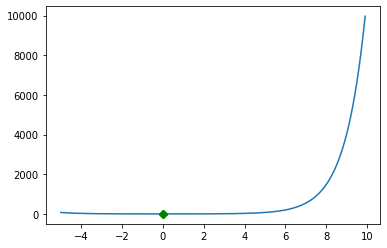

In [ ]:
x = np.arange(-5, 10, 0.1)
y = np.array([my_fun(i) for i in x])

markers_on = np.array([
              x_min_dichotomy1, 
              x_min_dichotomy2, 
              x_min_fibonacci, 
              x_min_golden_section
            ])
f_markers_on = [my_fun(i) for i in markers_on]

plt.plot(x, y)
plt.plot(markers_on, f_markers_on, '-gD')

show()

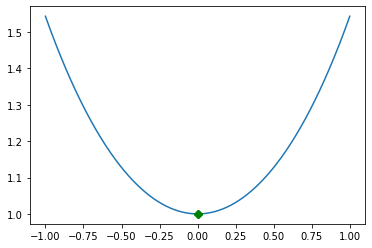

In [ ]:
x = np.arange(-1, 1, 0.00001)
y = np.array([my_fun(i) for i in x])

markers_on = np.array([
              x_min_dichotomy1, 
              x_min_dichotomy2, 
              x_min_fibonacci, 
              x_min_golden_section
            ])
f_markers_on = [my_fun(i) for i in markers_on]

plt.plot(x, y)
plt.plot(markers_on, f_markers_on, '-gD')

show()

Результаты всех функций приближены к 0, но ближе всего оказался метод Фибоначчи. Замерим время 

In [ ]:
fstart = time.time()
itsum = 0
for i in range(5000):
  x, cit = dichotomy(my_fun, a, b, epsilon, delta)
  itsum += cit
print(f'Дихотомия-1: {(time.time() - fstart) / 5000}с и {itsum / 5000} \
итераций на один запуск')


fstart = time.time()
itsum = 0
for i in range(5000):
  x, cit = dichotomy2(my_fun, a, b, epsilon)
  itsum += cit
print(f'Дихотомия-2: {(time.time() - fstart) / 5000}с и {itsum / 5000} \
итераций на один запуск')


fstart = time.time()
itsum = 0
for i in range(5000):
  x, cit = fibonacci(my_fun, a, b, epsilon)
  itsum += cit
print(f'Фибоначчи: {(time.time() - fstart) / 5000}с и {itsum / 5000} \
итераций на один запуск')


fstart = time.time()
itsum = 0
for i in range(5000):
  x, cit = golden_section(my_fun, a, b, epsilon)
  itsum += cit
print(f'Золотое сечение: {(time.time() - fstart) / 5000}с и {itsum / 5000} \
итераций на один запуск')

Дихотомия-1: 0.00046464462280273436с и 21.0 итераций на один запуск
Дихотомия-2: 0.03160071105957031с и 18.0 итераций на один запуск
Фибоначчи: 0.0021014086723327636с и 99.0 итераций на один запуск
Золотое сечение: 0.0006511706352233887с и 30.0 итераций на один запуск


Протестируем метод золотого сечения на ошибку округления. Проверим как будет меняться результат оптимизации в зависимости от количества знаков после запятой.

In [ ]:
best_res = None
best_phi = None

for i in range(11):
  REVERSED_PHI = 1 / round(PHI, i + 1)
  
  res = golden_section(my_fun, a, b, epsilon)
  if best_res is None:
    best_res = res
    best_phi = round(PHI, i + 1)
  elif abs(0 - res[0]) < abs(0 - best_res[0]):
    best_res = res
    best_phi = round(PHI, i + 1)
  
  print(f'{round(PHI, i + 1)} <---> {res[0]:.15f}')

print(f'Лучший результат: phi={best_phi}, результат={best_res[0]:.15f}')

1.6 <---> 0.000000296237285
1.62 <---> -0.000001865997876
1.618 <---> 0.000000585302314
1.618 <---> 0.000000585302314
1.61803 <---> -0.000001242554049
1.618034 <---> -0.000001048646810
1.618034 <---> -0.000001048646810
1.61803399 <---> -0.000001028974729
1.618033989 <---> -0.000001027007520
1.6180339887 <---> -0.000001026417358
1.61803398875 <---> -0.000001026515718
Лучший результат: phi=1.6, результат=0.000000296237285


Результат постоянно меняется в зависимости от количества цифр после запятой. Самый близкий к 0 результат вышел после округления до десятых. Можно сделать вывод, что метод уязвим к ошибке округления. 

Проверим также влияние ошибки округления на метод Фибоначчи.

In [ ]:
ORIGINAL_PHI = PHI

best_res = None
best_phi = None

for i in range(11):
  PHI = round(ORIGINAL_PHI, i + 1)
  fibonacci_numbers = [fibonacci_number(n) for n in range(1, 1000)]

  res = fibonacci(my_fun, a, b, epsilon)
  if best_res is None:
    best_res = res
    best_phi = round(PHI, i + 1)
  elif abs(0 - res[0]) < abs(0 - best_res[0]):
    best_res = res
    best_phi = round(PHI, i + 1)
  
  print(f'{PHI} <---> {res[0]:.15f}')

PHI = ORIGINAL_PHI

1.6 <---> -0.000000015359765
1.62 <---> -0.000000015359765
1.618 <---> -0.000000015359765
1.618 <---> -0.000000015359765
1.61803 <---> -0.000000015359765
1.618034 <---> -0.000000015359765
1.618034 <---> -0.000000015359765
1.61803399 <---> -0.000000015359765
1.618033989 <---> -0.000000015359765
1.6180339887 <---> -0.000000015359765
1.61803398875 <---> -0.000000015359765


Для метода Фибоначчи окргуление переменной PHI не повлияло на результат, что говорит о его независимости от округления. Ошибка округления не страшна для этого метода.

Проверим влияние изменений эпсилон на результат.

In [ ]:
for i in range(1, 6):
  epsilon = 1 / 10 ** i
  delta = epsilon / 1000

  x_min_dichotomy1, cd1 = dichotomy(my_fun, a, b, epsilon, delta)
  x_min_dichotomy2, cd2 = dichotomy2(my_fun, a, b, epsilon)
  x_min_fibonacci, fc = fibonacci(my_fun, a, b, epsilon)
  x_min_golden_section, gsc = golden_section(my_fun, a, b, epsilon)

  print(f'Эпсилон: {epsilon:.5f}')
  print(f'Дихотомия-1: {x_min_dichotomy1:.10f}; итерации {cd1}')
  print(f'Дихотомия-2: {x_min_dichotomy2:.10f}; итерации {cd2}')
  print(f'Фибоначчи: {x_min_fibonacci:.10f}; итерации {fc}')
  print(f'Золотое сечение: {x_min_golden_section:.10f}; итерации {gsc}')
  print('\n------------------------------------------\n')

Эпсилон: 0.10000
Дихотомия-1: -0.0194644531; итерации 8
Дихотомия-2: -0.3125000000; итерации 5
Фибоначчи: -0.0000000154; итерации 99
Золотое сечение: 0.0155281001; итерации 11

------------------------------------------

Эпсилон: 0.01000
Дихотомия-1: 0.0024380713; итерации 11
Дихотомия-2: -0.0195312500; итерации 8
Фибоначчи: -0.0000000154; итерации 99
Золотое сечение: 0.0003305348; итерации 16

------------------------------------------

Эпсилон: 0.00100
Дихотомия-1: -0.0003045091; итерации 14
Дихотомия-2: -0.0012207031; итерации 12
Фибоначчи: -0.0000000154; итерации 99
Золотое сечение: -0.0000482244; итерации 20

------------------------------------------

Эпсилон: 0.00010
Дихотомия-1: -0.0000190068; итерации 18
Дихотомия-2: -0.0003051758; итерации 15
Фибоначчи: -0.0000000154; итерации 99
Золотое сечение: 0.0000070358; итерации 25

------------------------------------------

Эпсилон: 0.00001
Дихотомия-1: 0.0000023809; итерации 21
Дихотомия-2: -0.0000190735; итерации 18
Фибоначчи: -0.0

Единственный метод, который не менял результат после изменения эпсилон, - метод Фибоначчи. Таким образом, можно сказать, что этот метод самый устойчивый к изменениям различных входных данных.

В ходе работы были изучены и реализованы методы одномерной оптимизации. Проверено влияние смены параметров и ошибки округления на их работу.

# Лабораторная работа №2

Цель лабораторной работы - изучить метод Ньютона и метод скорейшего спуска.

Реализуем тестовые функции из задания (функция Химельбау, функция Розенброка, квадратичная форма).

In [ ]:
def himmelbau(x, y):
  return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

In [ ]:
def rozenbrock(x, y):
  return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

In [ ]:
# матрица квадратичной формы
A = np.array(
    [
     [7, 0],
     [0, 7]
    ]
)
# вектор b
b = np.array([-4, -5])
# угол между основной осью эллипса и ох
RADS = np.pi / 3

def quadratic_form(x, y):
  # матрица поворота
  R = np.array(
        [
         [np.cos(RADS), -np.sin(RADS)],
         [np.sin(RADS), np.cos(RADS)]
        ]
      )
  # пересчитываем матрицу квадратичной формы
  A1 = np.dot(np.dot(R.transpose(), A), R)
  # возвращаем итоговое уравнение
  return A1[0][0] * x ** 2 + A1[0][1] * x * y + \
    A1[1][0] * y * x + A1[1][1] * y ** 2 + b[0] * x + b[1] * y

Сделаем функцию для подсчёта градиента функции двух переменных и гессиана для этой же функции.

In [ ]:
# ищем градиент, диференцируя по разным переменным
def get_gradient(func):
  x, y = sym.symbols('x y')
  z = func(x, y)
  diffs = z.diff(x), z.diff(y)
  return np.array([sym.lambdify((x, y), diffs[0], 'numpy'), \
    sym.lambdify((x, y), diffs[1], 'numpy')])

In [ ]:
# считаем значение градиента
def count_gradient(gradient, x, y):
  return np.array([gradient[0](x, y), gradient[1](x, y)])

In [ ]:
# ищем производные второго порядка
def get_hessian(func):
  x, y = sym.symbols('x y')
  z = func(x, y)
  diffs1 = z.diff(x), z.diff(y)
  diffs2 = diffs1[0].diff(x), diffs1[0].diff(y), \
    diffs1[1].diff(x), diffs1[1].diff(y)
  return np.array([[sym.lambdify((x, y), diffs2[0], 'numpy'), \
    sym.lambdify((x, y), diffs2[1], 'numpy')], \
    [sym.lambdify((x, y), diffs2[2], 'numpy'), \
    sym.lambdify((x, y), diffs2[3], 'numpy')]])

In [ ]:
# считаем матрицу Гессе
def count_hessian(hessian, x, y):
  return np.array([[hessian[0][0](x, y), hessian[0][1](x, y)], 
                   [hessian[1][0](x, y), hessian[1][1](x, y)]])

Реализуем метод Ньютона. Затем проверим его на реализованных функциях и визуализируем результаты. Метод принимает градиент функции, гессиан, координаты начала поиска, эпсилон и максимальное количество итераций.

In [ ]:
def newton(Grad, Hess, x,y, epsilon=0.000001, n = 200):
    # счетчик итераций
    i = 0
    # итерации
    iters = []
    # ошибка
    error = 10
    # результат
    X = np.array([x,y])
    
    # итерируем пока ошибка больше чем эпсилон или пока не достигли n
    while np.linalg.norm(error) > epsilon and i < n:
        i +=1
        # сохраняем итерацию
        iters.append([x, y])
        # печатаем нынешний результат
        print(X) 
        
        # временная переменная, хранящая предидущий результат
        X_prev = X
        # пересчитываем результат
        # отнимем от результата инвертированный гессиан умноженный на градиент
        X = X - np.linalg.inv(count_hessian(Hess, x, y)) \
        @ count_gradient(Grad, x, y)
        # пересчитываем ошибку
        error = X - X_prev
        # перезаписываем x, y
        x,y = X[0], X[1]
          
    return X, np.array(iters)

Проверим на реализованных функциях. Возьмём стартовую точку в 50, 25.

In [ ]:
start = [50.0, 25.0]

In [ ]:
root, iters = newton(
    get_gradient(rozenbrock),
    get_hessian(rozenbrock),
    start[0],
    start[1]
  )
print('Количество итераций: ', len(iters))

[50. 25.]
[  49.99990101 2499.99010103]
[ 1.00009605e+00 -2.39998069e+03]
[1.00009605 1.0001921 ]
[1.         0.99999999]
Количество итераций:  5


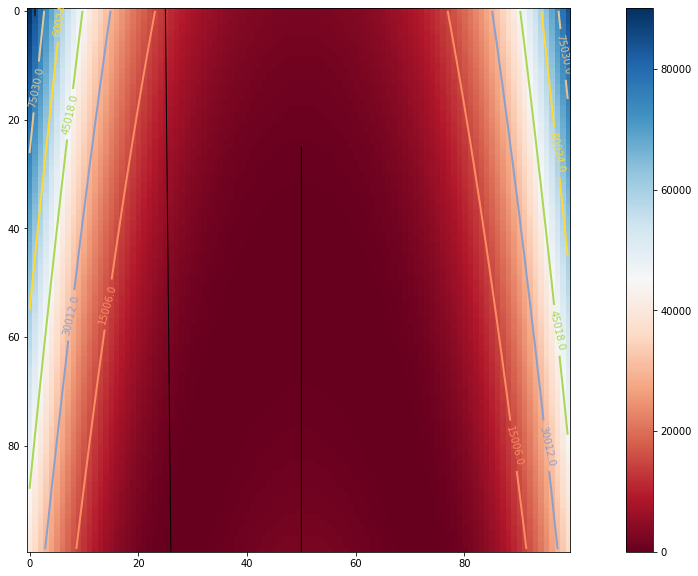

In [ ]:
draw_func(rozenbrock, (5, -5), (5, -5), 6, iters)

In [ ]:
root, iters = newton(
    get_gradient(himmelbau),
    get_hessian(himmelbau),
    start[0],
    start[1]
  )
print('Количество итераций: ', len(iters))

[50. 25.]
[33.31480113 16.29235857]
[22.21857075 10.50897471]
[14.86182719  6.68702806]
[10.01819687  4.19249896]
[6.87962936 2.61874366]
[4.91900481 1.73606087]
[3.78208732 1.53237209]
[3.17939413 2.02178601]
[3.01551527 1.99353297]
[3.00012241 1.99995938]
[3.00000001 2.        ]
Количество итераций:  12


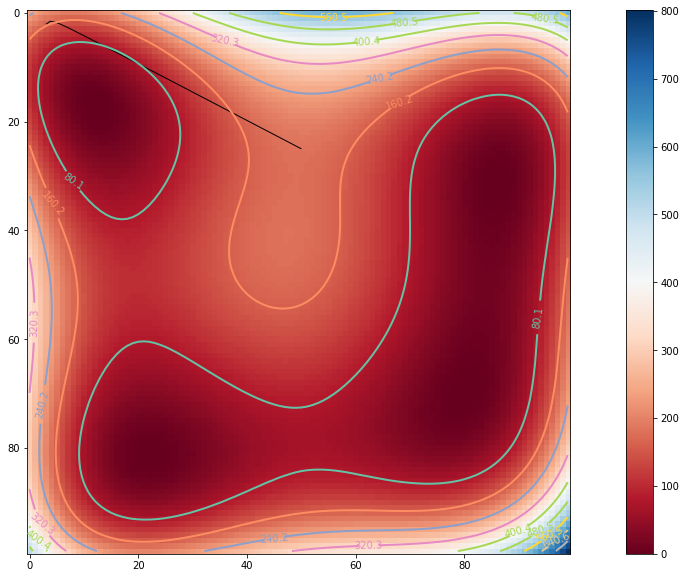

In [ ]:
draw_func(himmelbau, (5, -5), (5, -5), 10, iters)

In [ ]:
root, iters = newton(
    get_gradient(quadratic_form),
    get_hessian(quadratic_form),
    start[0],
    start[1]
  )
print('Количество итераций: ', len(iters))

[50. 25.]
[0.28571429 0.35714286]
Количество итераций:  2


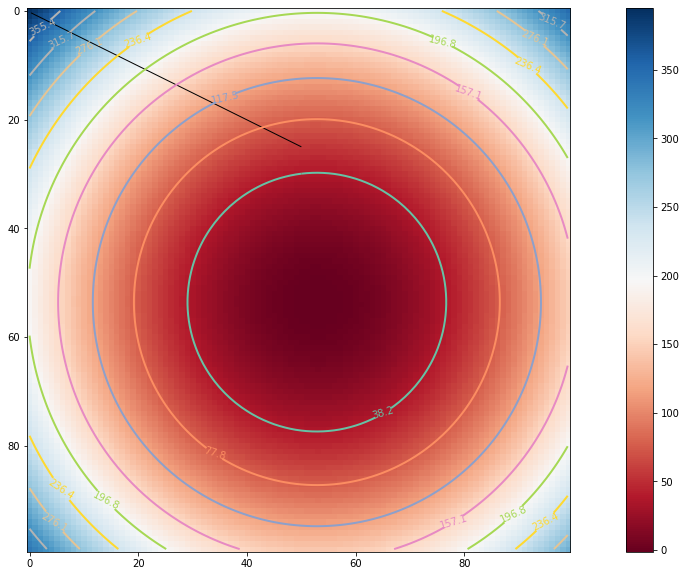

In [ ]:
draw_func(quadratic_form, (5, -5), (5, -5), 10, iters)

Все 3 результата либо равны предполагаемому экстремуму, либо очень близки к нему. Количество итераций очень невелико (от 2 до 12). Таким образом, метод Ньютона прекрасно показал себя при проверке заданными функциями.

Реализуем метод скорейшего спуска и так же его проверим. Он принимает градиент, старт, коефициент гамма, эпсилон и максимальное количество итераций.

In [ ]:
def msd(Grad, x, y, gamma=0.00125, epsilon=0.0001, n=10000, verbose=False):
    # счётчик итераций
    i = 0
    # история итераций
    iters = []
    # ошибка
    error = 10
    # результат
    X = np.array([x,y])
    
    # итерируем пока ошибка больше эпсилон либо i достигло n
    while np.linalg.norm(error) > epsilon and i < n:
        i += 1
        iters.append([x, y])
        
        if i % 10 == 0 and verbose:
          print(X)

        # сохраняем старое значение результата
        X_prev = X
        # пересчитываем результат
        # отнимаем от результата градиент умноженный на гамму
        X = X - gamma * count_gradient(Grad, x, y)
        # пересчитываем ошибку
        error = X - X_prev
        # пересчитываем x, y
        x, y = X[0], X[1]
          
    print(X)

    return X, np.array(iters)

In [ ]:
root, iters = msd(
    get_gradient(rozenbrock),
    start[0],
    start[1]
  )
print('Количество итераций:', len(iters))

[nan inf]
Количество итераций: 6


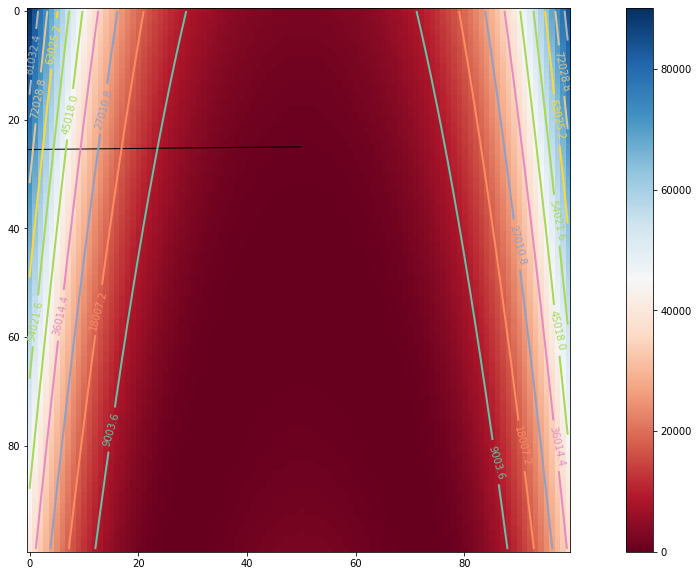

In [ ]:
draw_func(rozenbrock, (5, -5), (5, -5), 10, iters)

In [ ]:
root, iters = msd(
    get_gradient(himmelbau),
    start[0],
    start[1]
  )
print('Количество итераций:', len(iters))

[nan nan]
Количество итераций: 7


In [ ]:
iters[-1]

array([            inf, -9.8064743e+260])

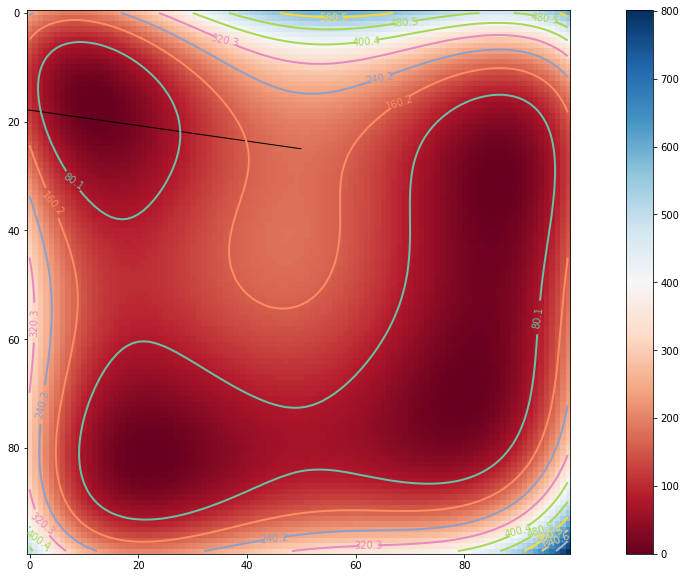

In [ ]:
draw_func(himmelbau, (5, -5), (5, -5), 10, iters[:-3])

In [ ]:
root, iters = msd(
    get_gradient(quadratic_form),
    start[0],
    start[1]
  )
print('Количество итераций:', len(iters))

[0.29065827 0.35959354]
Количество итераций: 522


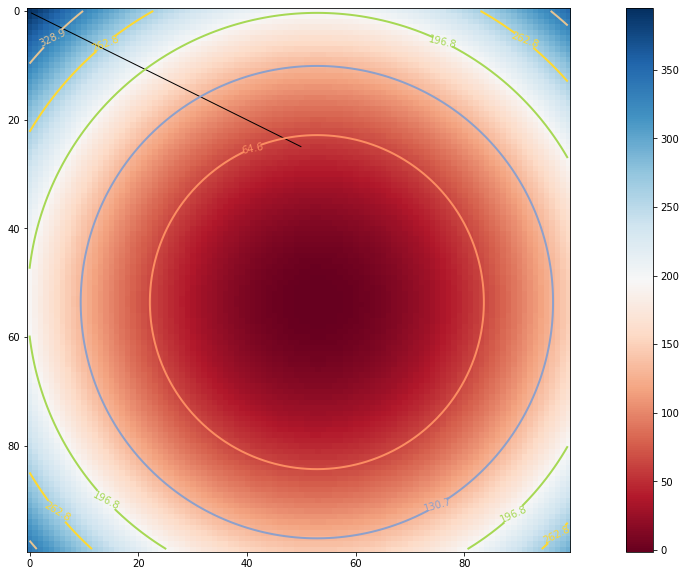

In [ ]:
draw_func(quadratic_form, (5, -5), (5, -5), 6, iters)

Метод скорейшего спуска добрался до экстремума только в квадратичной форме, но выполнил больше 1000 итераций. Попробуем изменить старт для оптимизации функций Розенброка и Химельбау.

In [ ]:
new_start = [10, 10]

In [ ]:
root, iters = msd(
    get_gradient(himmelbau),
    new_start[0],
    new_start[1]
  )
print('Количество итераций:', len(iters))

[2.99887322 2.00271134]
Количество итераций: 162


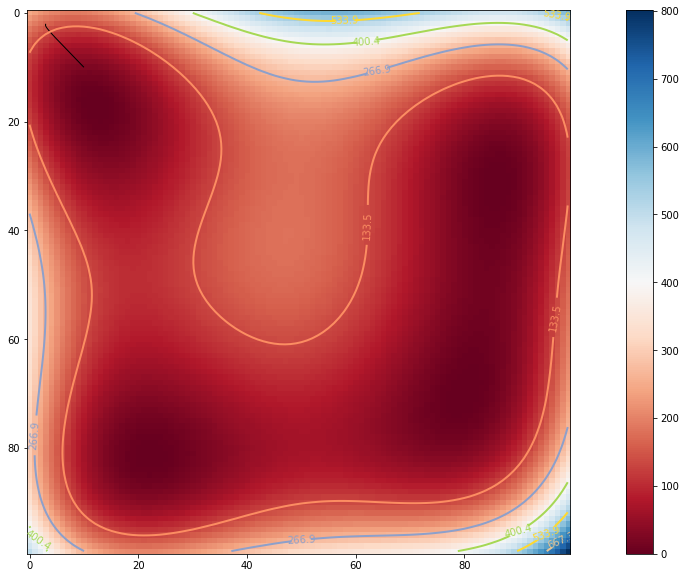

In [ ]:
draw_func(himmelbau, (5, -5), (5, -5), 6, iters)

In [ ]:
root, iters = msd(
    get_gradient(rozenbrock),
    new_start[0],
    new_start[1]
  )
print('Количество итераций:', len(iters))

[nan nan]
Количество итераций: 7


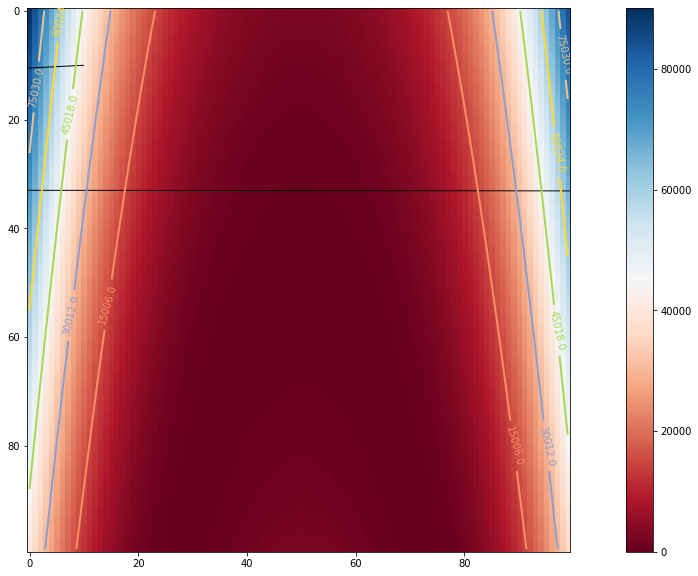

In [ ]:
draw_func(rozenbrock, (5, -5), (5, -5), 6, iters)

Для функции Химмельбау старт в точке (10, 10) дал хороший результат, но для Розенброка результат всё ещё не соответствует необходимому. Изменим старт ещё раз уже только для Розенброка.

In [ ]:
root, iters = msd(
    get_gradient(rozenbrock),
    0,
    10
  )
print('Количество итераций:', len(iters))

[1.09635311 1.20235402]
Количество итераций: 2729


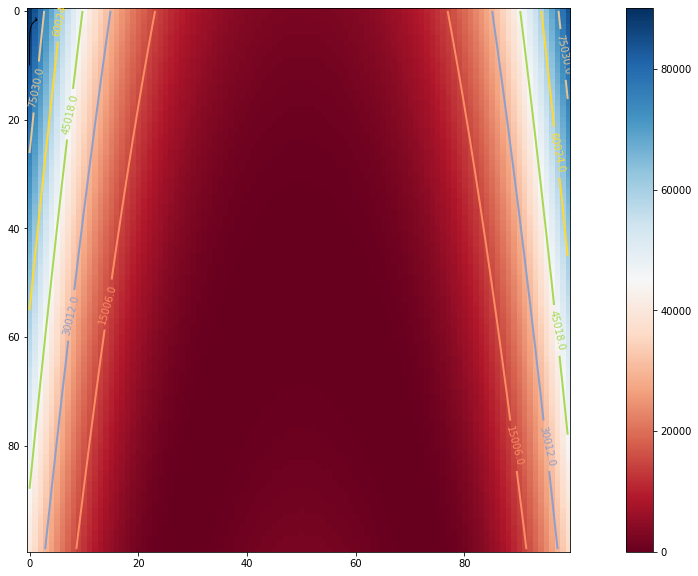

In [ ]:
draw_func(rozenbrock, (5, -5), (5, -5), 6, iters)

Старт в точке (0, 10) наконец-то дал результат близкий к (1, 1). Потребовалось более 2000 итераций, а результат не совсем точный. При этом старт должен производться довольно близко к экстремуму. Иначе оптимизация так и не даёт результата.

Теперь попробуем поворачивать квадратичную форму и отследить перемены в оптимизации. С начала проверим метод скорейшего спуска.

Угол: pi/4 * 1 (0.7853981633974483 радиан)
[0.10056636 0.1641397 ]
Количество итераций: 457


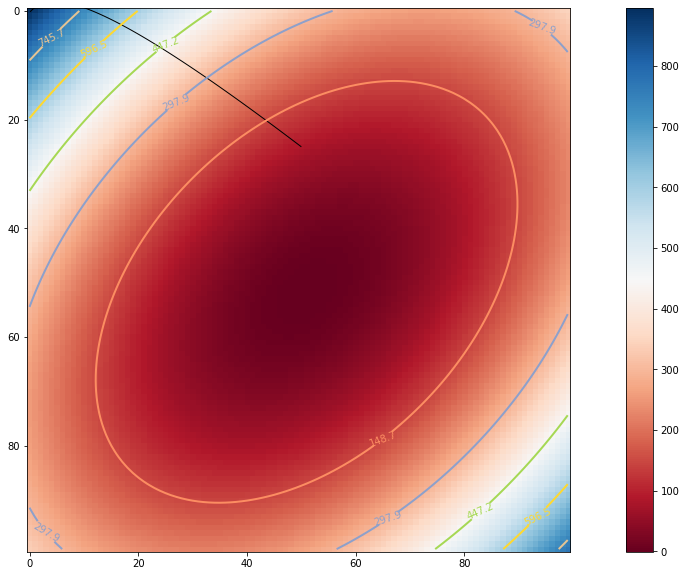

Угол: pi/4 * 2 (1.5707963267948966 радиан)
[0.11764711 0.36266349]
Количество итераций: 476


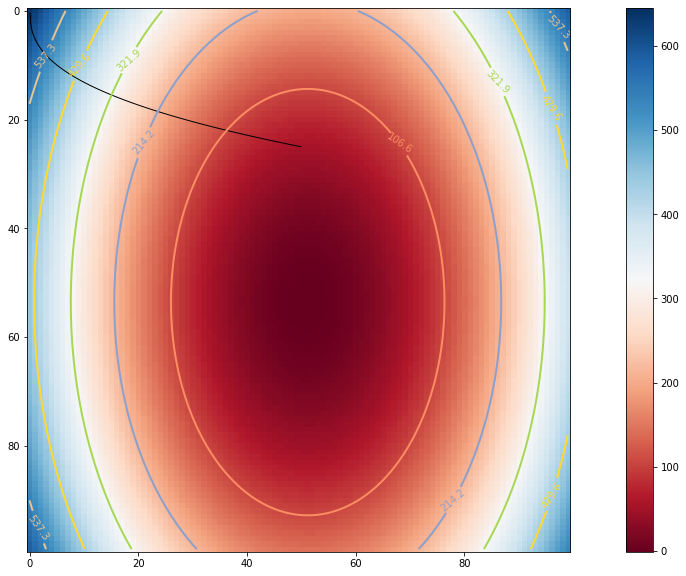

Угол: pi/4 * 3 (2.356194490192345 радиан)
[0.31069057 0.34010233]
Количество итераций: 518


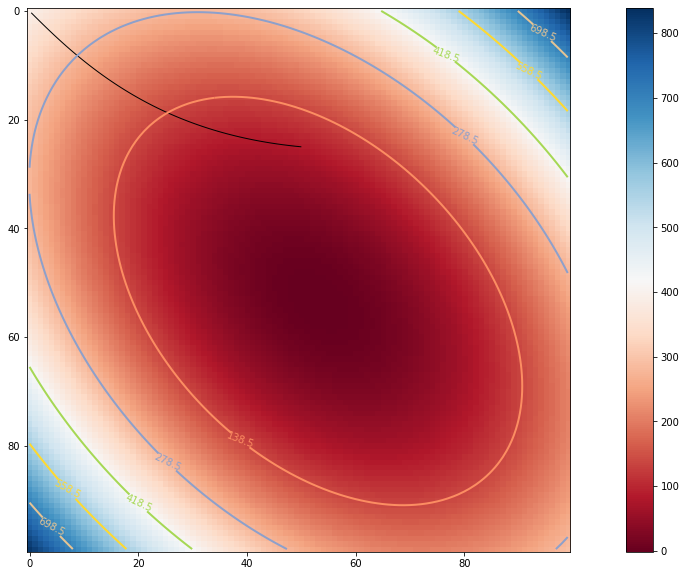

Угол: pi/4 * 4 (3.141592653589793 радиан)
[0.29130863 0.14705883]
Количество итераций: 515


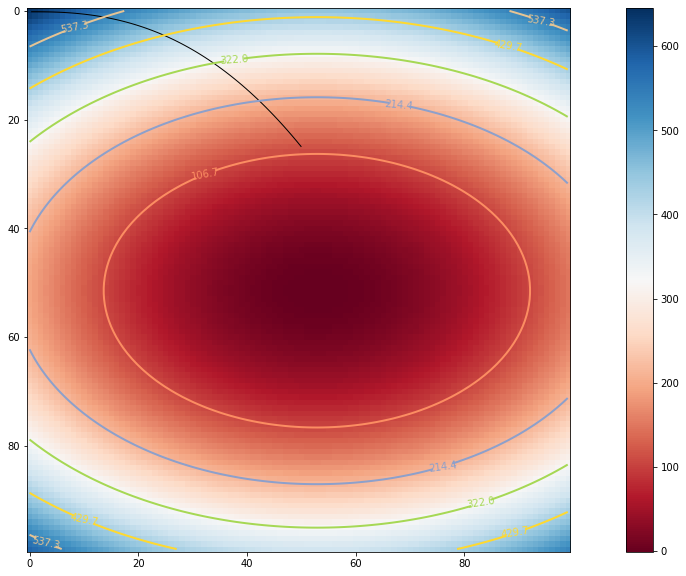

Угол: pi/4 * 5 (3.9269908169872414 радиан)
[0.10056636 0.1641397 ]
Количество итераций: 457


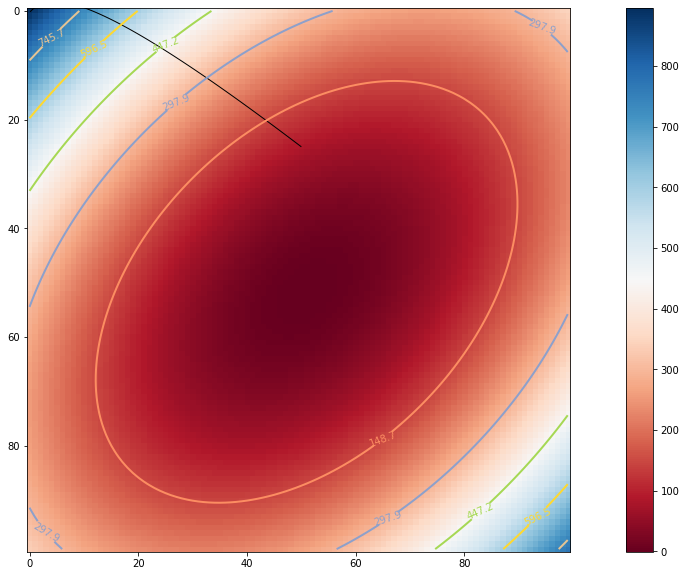

Угол: pi/4 * 6 (4.71238898038469 радиан)
[0.11764711 0.36266349]
Количество итераций: 476


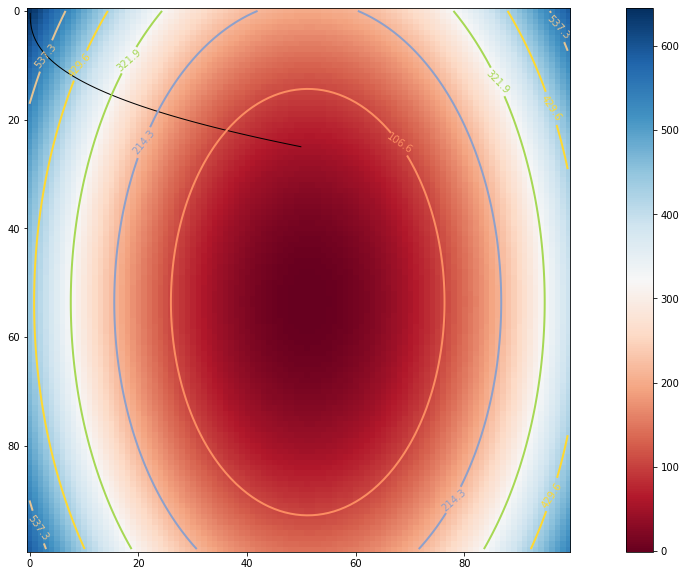

Угол: pi/4 * 7 (5.497787143782138 радиан)
[0.31069057 0.34010233]
Количество итераций: 518


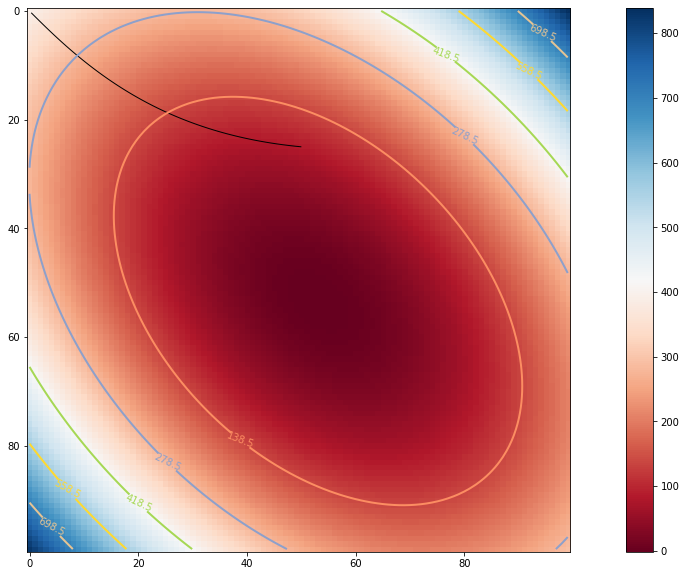

Угол: pi/4 * 8 (6.283185307179586 радиан)
[0.29130863 0.14705883]
Количество итераций: 515


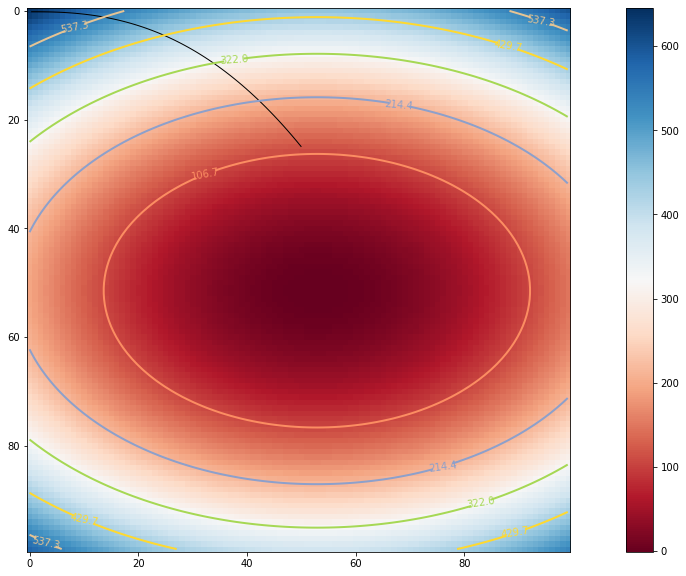

In [ ]:
A[1][1] = 17
angles = []
iter_nums = []

for i in range(1, 9):
  print(f'Угол: pi/4 * {i} ({(np.pi / 4) * i} радиан)')
  RADS = (np.pi / 4) * i
  root, iters = msd(
    get_gradient(quadratic_form),
    start[0],
    start[1]
  )
  print(f'Количество итераций: {len(iters)}')
  angles.append(RADS)
  iter_nums.append(len(iters))
  draw_func(quadratic_form, (5, -5), (5, -5), 6, iters)

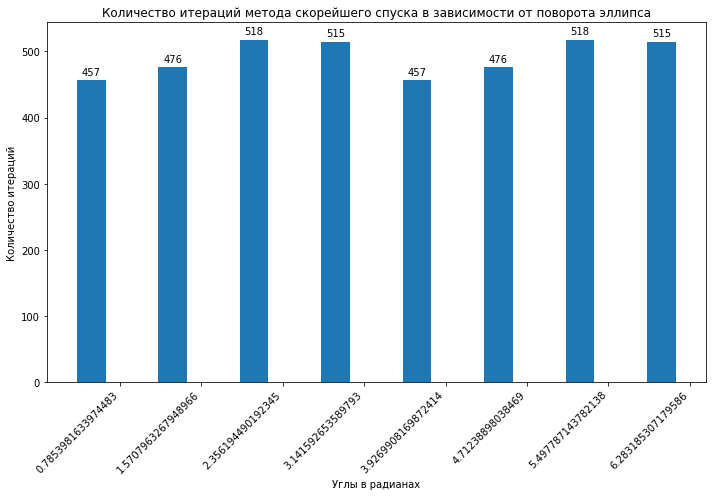

In [ ]:
x = np.arange(len(angles))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x - width, iter_nums, width)

ax.set_ylabel('Количество итераций')
ax.set_xlabel('Углы в радианах')
ax.set_title('Количество итераций метода скорейшего спуска в зависимости от\
 поворота эллипса')
ax.set_xticks(x)
ax.set_xticklabels(angles, rotation = 45, ha="right")

for rect in rects:
  height = rect.get_height()
  ax.annotate('{}'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
              xytext=(0, 3),  # 3 points vertical offset
              textcoords="offset points",
              ha='center', va='bottom')

fig.set_figheight(7)
fig.set_figwidth(10)
fig.tight_layout()

plt.show()

Для метода скорейшего спуска можно увидеть, что количество итераций менялось в предеделах 70. Для pi / 4 и pi / 2 количество итераций считай не поменялось. В целом метод скорейшего спуска не слишком замедлился из-за поворота квадратичной формы.

Проверим работу метода Ньютона.

Угол: pi/4 * 1 (0.7853981633974483 радиан)
[50. 25.]
[0.09663866 0.16806723]
Количество итераций:  2


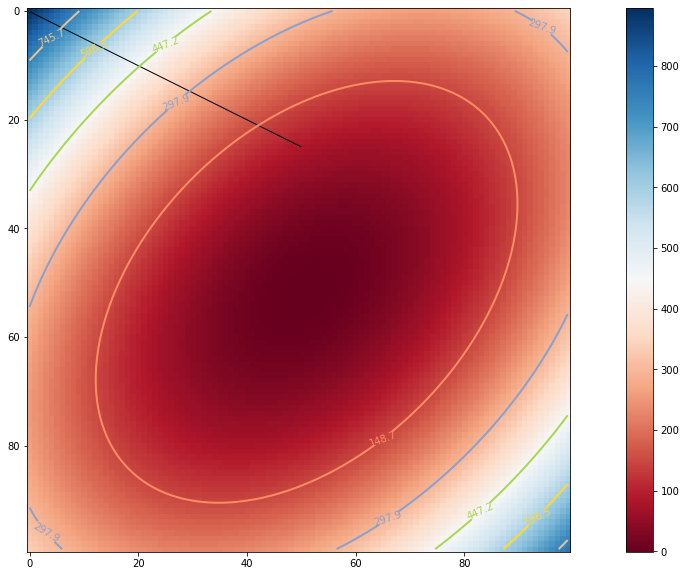

Угол: pi/4 * 2 (1.5707963267948966 радиан)
[50. 25.]
[0.11764706 0.35714286]
Количество итераций:  2


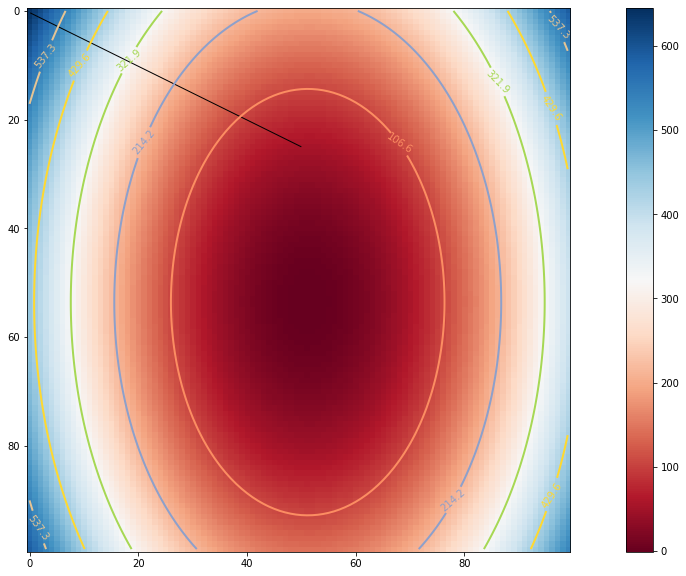

Угол: pi/4 * 3 (2.356194490192345 радиан)
[50. 25.]
[0.30672269 0.33613445]
Количество итераций:  2


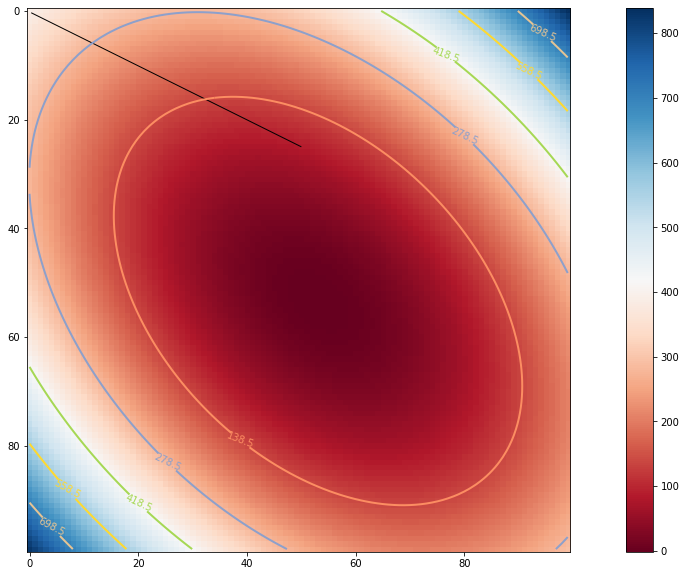

Угол: pi/4 * 4 (3.141592653589793 радиан)
[50. 25.]
[0.28571429 0.14705882]
Количество итераций:  2


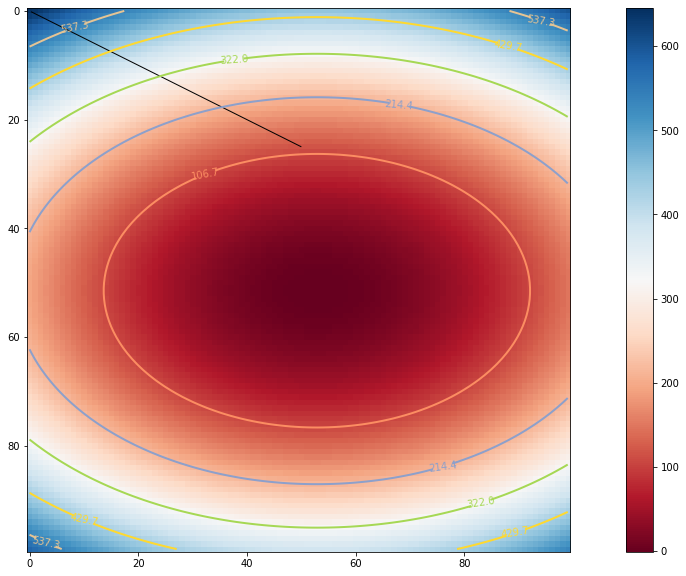

Угол: pi/4 * 5 (3.9269908169872414 радиан)
[50. 25.]
[0.09663866 0.16806723]
Количество итераций:  2


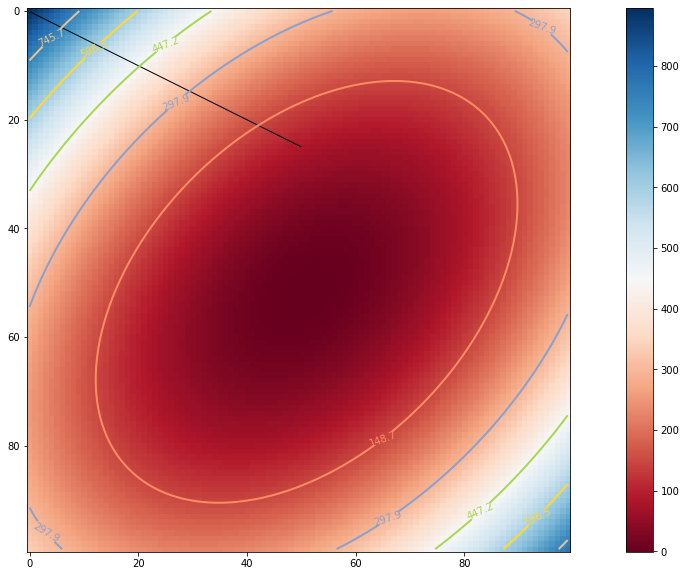

Угол: pi/4 * 6 (4.71238898038469 радиан)
[50. 25.]
[0.11764706 0.35714286]
Количество итераций:  2


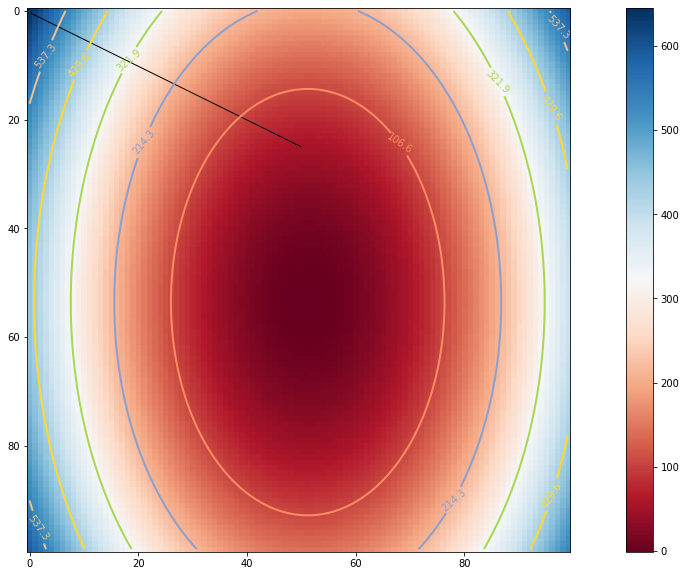

Угол: pi/4 * 7 (5.497787143782138 радиан)
[50. 25.]
[0.30672269 0.33613445]
Количество итераций:  2


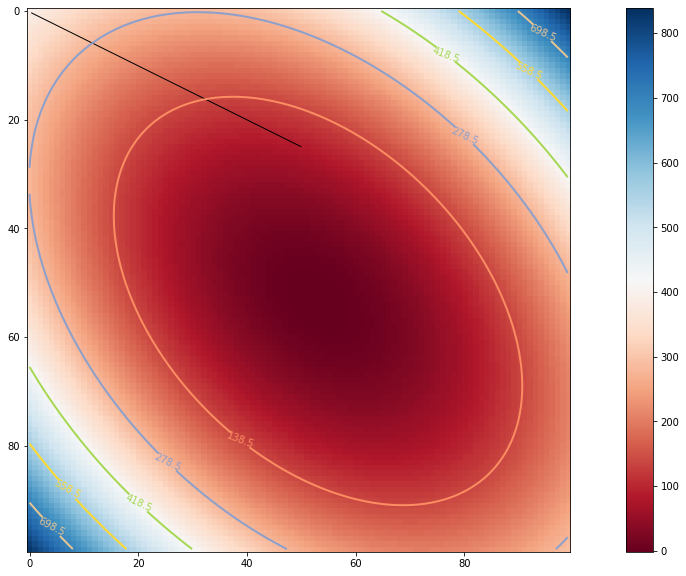

Угол: pi/4 * 8 (6.283185307179586 радиан)
[50. 25.]
[0.28571429 0.14705882]
Количество итераций:  2


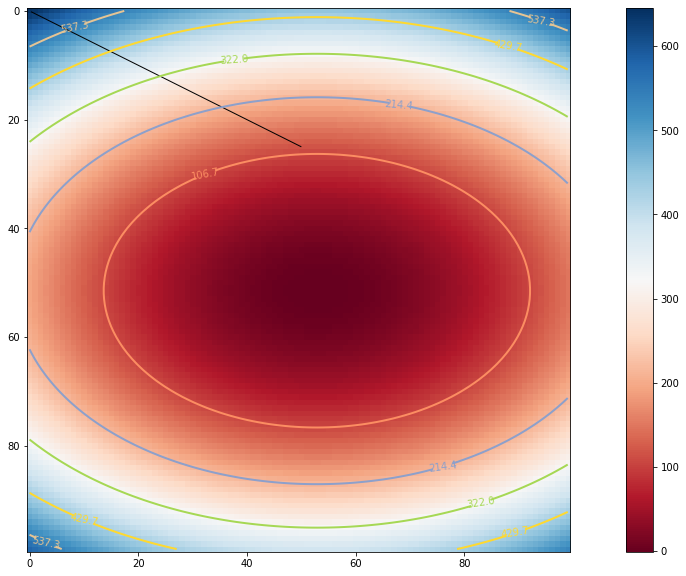

In [ ]:
A[1][1] = 17
angles = []
iter_nums = []

for i in range(1, 9):
  print(f'Угол: pi/4 * {i} ({(np.pi / 4) * i} радиан)')
  RADS = (np.pi / 4) * i
  root, iters = newton(
    get_gradient(quadratic_form),
    get_hessian(quadratic_form),
    start[0],
    start[1]
  )
  print('Количество итераций: ', len(iters))
  angles.append(RADS)
  iter_nums.append(len(iters))
  draw_func(quadratic_form, (5, -5), (5, -5), 6, iters)

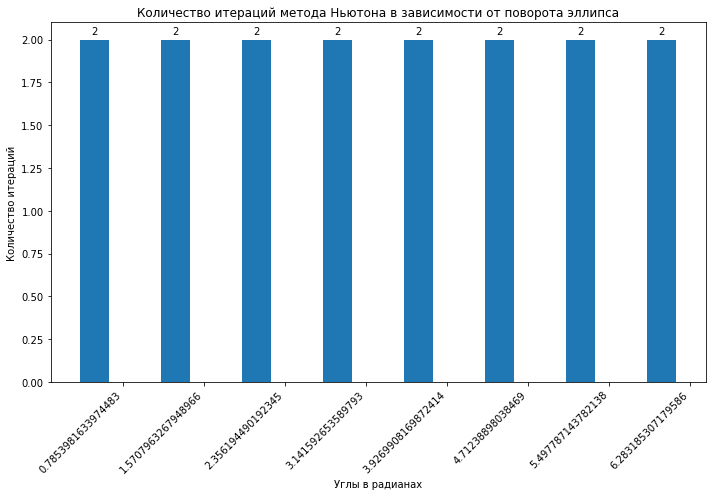

In [ ]:
x = np.arange(len(angles))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x - width, iter_nums, width)

ax.set_ylabel('Количество итераций')
ax.set_xlabel('Углы в радианах')
ax.set_title('Количество итераций метода Ньютона в зависимости от\
 поворота эллипса')
ax.set_xticks(x)
ax.set_xticklabels(angles, rotation = 45, ha="right")

for rect in rects:
  height = rect.get_height()
  ax.annotate('{}'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
              xytext=(0, 3),  # 3 points vertical offset
              textcoords="offset points",
              ha='center', va='bottom')

fig.set_figheight(7)
fig.set_figwidth(10)
fig.tight_layout()

plt.show()

Метод Ньютона работает одинаково быстро для всех углов между основной осью эллипса и осью ох.

Теперь проверим влияние эллиптичности на поиск экстремума.

Эллиптичность: 1
[0.29065827 0.35959354]
Количество итераций:  522


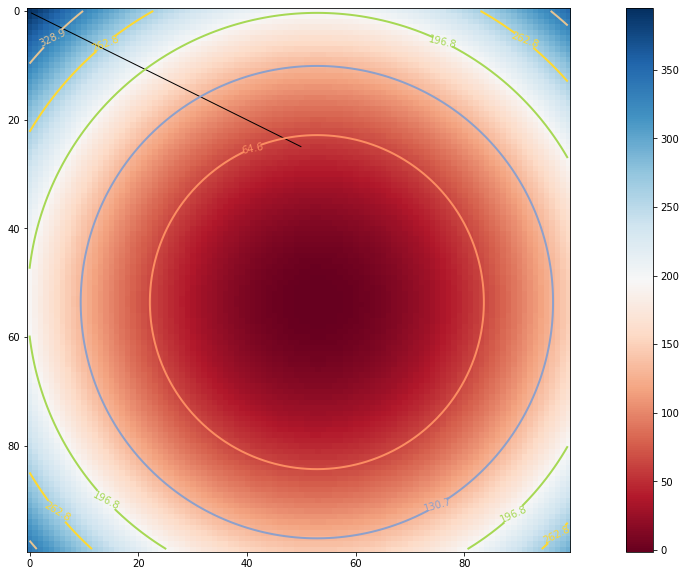

Эллиптичность: 10
[0.29130863 0.03571429]
Количество итераций:  515


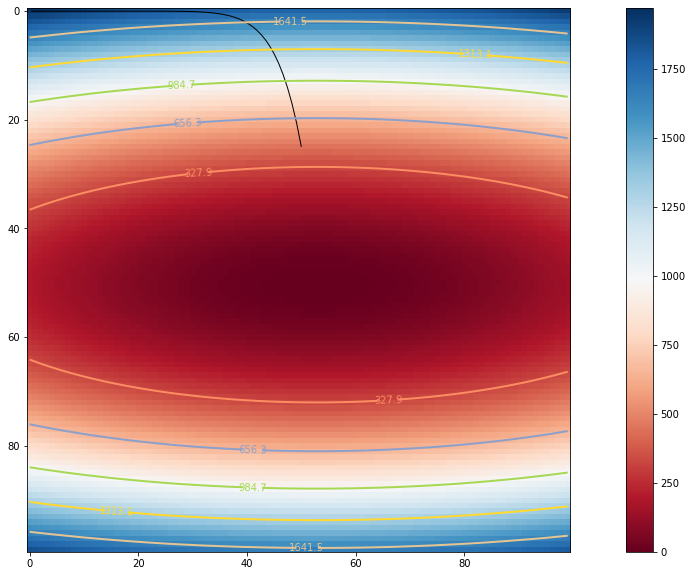

Эллиптичность: 100
[0.29130863 0.00357143]
Количество итераций:  515


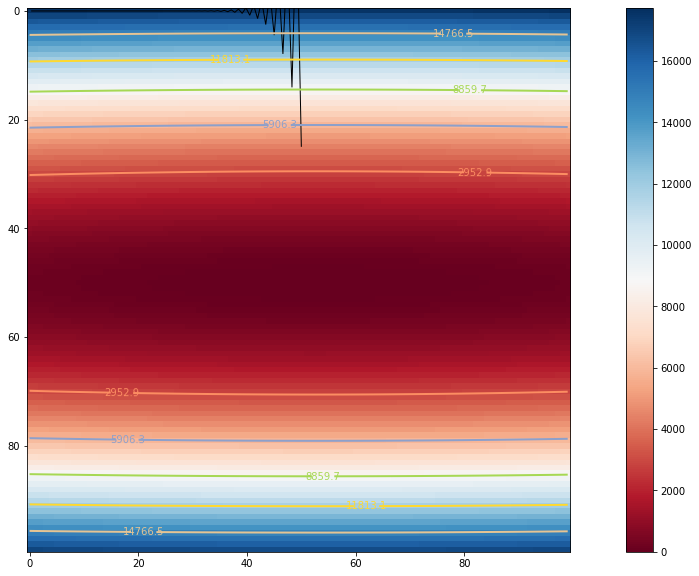

In [ ]:
RADS = 0

ellipsoid = []
iter_nums = []

for i in range(3):
  print(f'Эллиптичность: {10 ** i}')
  A[1][1] = A[0][0] * (10 ** i)
  root, iters = msd(
    get_gradient(quadratic_form),
    start[0],
    start[1]
  )
  print('Количество итераций: ', len(iters))
  ellipsoid.append(A[1][1] / A[0][0])
  iter_nums.append(len(iters))
  draw_func(quadratic_form, (5, -5), (5, -5), 6, iters)

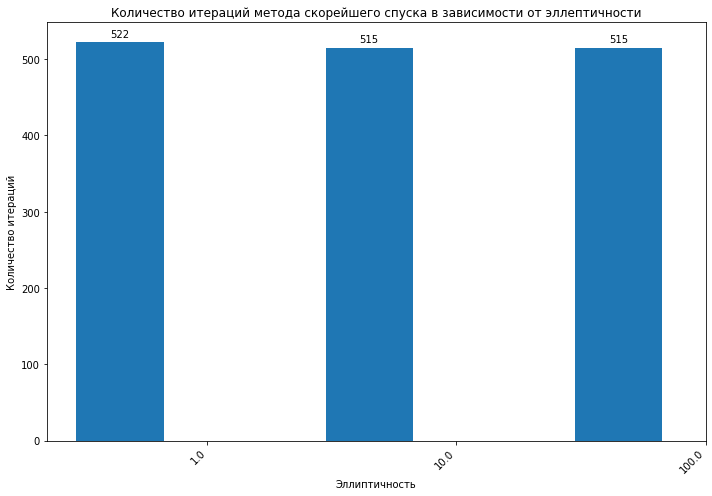

In [ ]:
x = np.arange(len(ellipsoid))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x - width, iter_nums, width)

ax.set_ylabel('Количество итераций')
ax.set_xlabel('Эллиптичность')
ax.set_title('Количество итераций метода скорейшего спуска в зависимости от\
 эллептичности')
ax.set_xticks(x)
ax.set_xticklabels(ellipsoid, rotation = 45, ha="right")

for rect in rects:
  height = rect.get_height()
  ax.annotate('{}'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
              xytext=(0, 3),  # 3 points vertical offset
              textcoords="offset points",
              ha='center', va='bottom')

fig.set_figheight(7)
fig.set_figwidth(10)
fig.tight_layout()

plt.show()

Эллиптичность не слишком повлияла на работу метода скорейшего спуска. Для большей эллиптичности количество итераций даже несколько уменьшилось.

Эллиптичность: 1
[50. 25.]
[0.28571429 0.35714286]
Количество итераций:  2


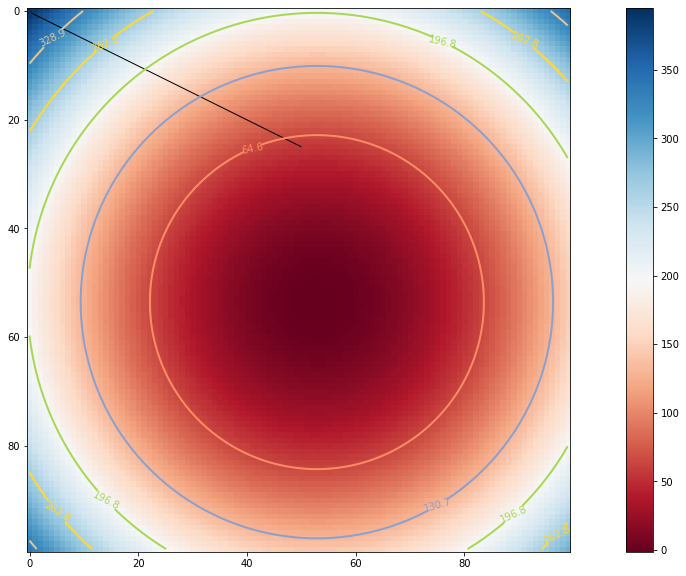

Эллиптичность: 10
[50. 25.]
[0.28571429 0.03571429]
Количество итераций:  2


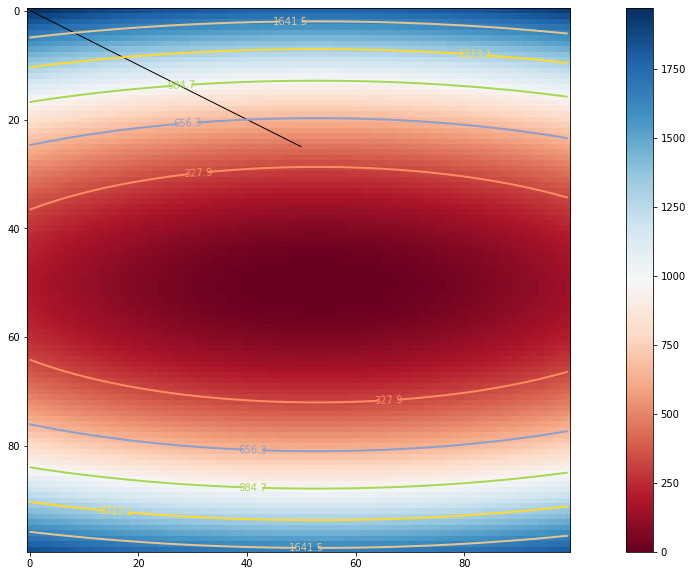

Эллиптичность: 100
[50. 25.]
[0.28571429 0.00357143]
Количество итераций:  2


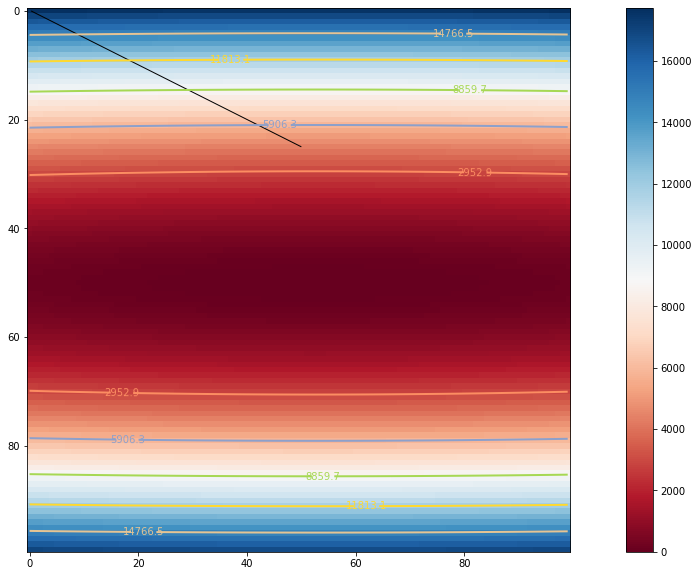

In [ ]:
RADS = 0

ellipsoid = []
iter_nums = []

for i in range(3):
  print(f'Эллиптичность: {10 ** i}')
  A[1][1] = A[0][0] * (10 ** i)
  root, iters = newton(
    get_gradient(quadratic_form),
    get_hessian(quadratic_form),
    start[0],
    start[1]
  )
  print('Количество итераций: ', len(iters))
  ellipsoid.append(A[1][1] / A[0][0])
  iter_nums.append(len(iters))
  draw_func(quadratic_form, (5, -5), (5, -5), 6, iters)

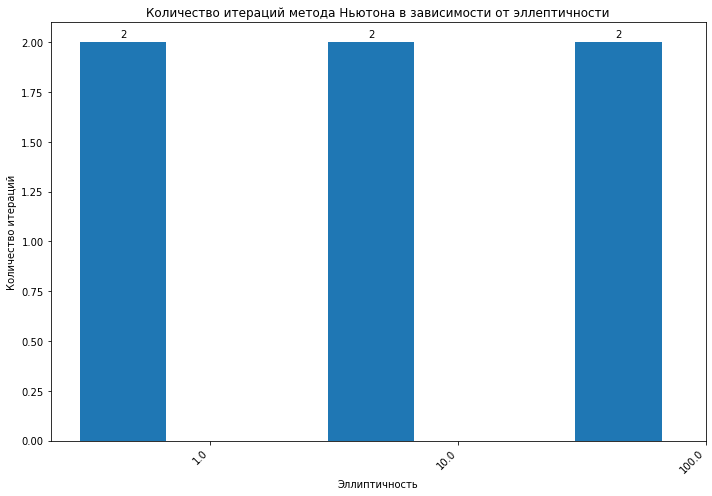

In [ ]:
x = np.arange(len(ellipsoid))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x - width, iter_nums, width)

ax.set_ylabel('Количество итераций')
ax.set_xlabel('Эллиптичность')
ax.set_title('Количество итераций метода Ньютона в зависимости от\
 эллептичности')
ax.set_xticks(x)
ax.set_xticklabels(ellipsoid, rotation = 45, ha="right")

for rect in rects:
  height = rect.get_height()
  ax.annotate('{}'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
              xytext=(0, 3),  # 3 points vertical offset
              textcoords="offset points",
              ha='center', va='bottom')

fig.set_figheight(7)
fig.set_figwidth(10)
fig.tight_layout()

plt.show()

Метод Ньютона работает одинаково быстро для любого из протестированных значений эллиптичности. Как и угол наклона, эллиптичность не влияет на скорость метода Ньютона.

Таким образом, были реализованы 2 метода многомерной оптимизации. Также они были протестированы на двумерных функциях. Тесты подтвердили, что метод Ньютона работает быстрее и стабильнее метода скорейшего спуска.

Также реализуем версии методов для оптимизации функций n-ой размерности. Это понадобится в последующих лабораторных работах.

In [ ]:
def newton_ndim(func, Grad, Hess, x, epsilon=0.000001, n=200):
    # счетчик итераций
    i = 0
    # итерации
    iters = []
    # ошибка
    error = 10
    # результат
    X = x
    
    # итерируем пока ошибка больше чем эпсилон или пока не достигли n
    while np.linalg.norm(error) > epsilon and i < n:
        i +=1
        # сохраняем итерацию
        iters.append(X)
        # печатаем нынешний результат
        #print(X) 
        
        # временная переменная, хранящая предидущий результат
        X_prev = X
        # пересчитываем результат
        # отнимем от результата инвертированный гессиан умноженный на градиент
        hs = count_hessian_vec(Hess, X)
        hs = np.linalg.pinv(hs)
        gd = count_gradient_vec(Grad, X)
        err = hs @ gd
        X = X - err
        
        # пересчитываем ошибку
        error = X - X_prev
          
    return X, np.array(iters)

In [ ]:
def msd_ndim(Grad, x, gamma=0.00125, epsilon=0.0001, n=10000, verbose=False):
    # счётчик итераций
    i = 0
    # история итераций
    iters = []
    # ошибка
    error = 10
    # результат
    X = x
    
    # итерируем пока ошибка больше эпсилон либо i достигло n
    while np.linalg.norm(error) > epsilon and i < n:
        i += 1
        iters.append(X)
        
        if i % 10 == 0 and verbose:
          print(X)

        # сохраняем старое значение результата
        X_prev = X
        # пересчитываем результат
        # отнимаем от результата градиент умноженный на гамму
        X = X - gamma * count_gradient_vec(Grad, X)
        # пересчитываем ошибку
        error = X - X_prev
     
    return X, np.array(iters)

# Лабораторная работа №3

Цель лабораторной работы №3 - изучить квази-ньютоновские методы.

Сначала сделаем версии функций для проверки, которые будут принимать векторы вместо x и y.

In [ ]:
def himmelbau_vec(x):
  return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

In [ ]:
def rozenbrock_vec(x):
  return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

In [ ]:
# матрица квадратичной формы
A = np.array(
    [
     [7, 0],
     [0, 7]
    ]
)
# вектор b
b = np.array([-4, -5])
# угол между основной осью эллипса и ох
RADS = np.pi / 3

def quadratic_form_vec(x):
  # матрица поворота
  R = np.array(
        [
         [np.cos(RADS), -np.sin(RADS)],
         [np.sin(RADS), np.cos(RADS)]
        ]
      )
  # пересчитываем матрицу квадратичной формы
  A1 = np.dot(np.dot(R.transpose(), A), R)
  # возвращаем итоговое уравнение
  return A1[0][0] * x[0] ** 2 + A1[0][1] * x[0] * x[1] + \
    A1[1][0] * x[1] * x[0] + A1[1][1] * x[1] ** 2 + b[0] * x[0] + b[1] * x[1]

Также сделеаем новые функции для подсчёта градиентов и гессианов вне зависимости от размерности функции. Воспользуемся всё тем же sympy.

In [ ]:
def get_gradient_vec(func, ndim):
  symbols = ''
  for i in range(ndim):
    symbols += f'x{i + 1} '

  x = np.asarray(sym.symbols(symbols))
  z = func(x)
  diffs = [z.diff(xi) for xi in x]
  return np.array([sym.lambdify(([x]), d, 'numpy') for d in diffs])

In [ ]:
def count_gradient_vec(grad, x):
  return np.array([g(x) for g in grad])

In [ ]:
def get_hessian_vec(func, ndim):
  symbols = ''
  for i in range(ndim):
    symbols += f'x{i + 1} '

  x = np.asarray(sym.symbols(symbols))
  z = func(x)
  diffs = [z.diff(xi) for xi in x]
  diffs2 = [[df.diff(xi) for xi in x] for df in diffs]
  diffs2 = [[sym.lambdify(([x]), d, 'numpy') for d in df] for df in diffs2]
  return np.array(diffs2)

In [ ]:
def count_hessian_vec(hessian, x):
  return np.array([[h(x) for h in _] for _ in hessian])

Реализуем метод Бройдена-Флетчера-Пауэлла. Сначала создадим некоторые вспомогательные функции.

In [ ]:
# проверяем подходит ли сдвиг
def check_move(f, g, xk, alpha, pk):
  c1 = 1e-4
  return f(xk + alpha * pk) <= f(xk) + c1 * alpha * np.dot(
      count_gradient_vec(g, xk), pk
    )


# проверяем была ли оптимизация достаточной
def check_optimized(f, g, xk, alpha, pk, c2):
  return wolfe(f, g, xk, alpha, pk) and abs(
      np.dot(count_gradient_vec(g, xk + alpha * pk), pk)) <= c2 * abs(np.dot(
          count_gradient_vec(g, xk), pk
        ))

In [ ]:
def optimize_len(f, g, f_alpha, g_alpha, alpha, c2, strong_wolfe_alpha, iters=20):
  l = 0.0
  h = 1.0
  for i in range(iters):
    # если уже оптимизировано
    if strong_wolfe_alpha(f, g, alpha, c2):
      return alpha

    # ищем оптимальную альфа
    middle = (l + h) / 2
    alpha = - (g_alpha(l) * h ** 2) / \
    (2 * (f_alpha(h) - f_alpha(l) - g_alpha(l) * h))
    
    # если альфа не вписывается в лимиты
    if alpha < l or alpha > h:
      alpha = middle
    
    # градиент с данным альфа больше 0
    if g_alpha(alpha) > 0:
      h = alpha
    # иначе
    else:
      l = alpha
  
  return alpha

In [ ]:
# ищем длину шага
def step_length(f, g, xk, alpha, pk, c2):
  # функция, градиент, функция от сдвинутого х
  # произведение градиента от сдвинутого х на 
  # - произведение H на изначальный градиент
  # альфа, параметр c2
  # проверка на оптимизированость
  return optimize_len(f, g,
                       lambda alpha: f(xk + alpha * pk),
                       lambda alpha: np.dot(
                           count_gradient_vec(g, xk + alpha * pk), pk
                          ),
                       alpha, c2,
                       lambda f, g, alpha, c2: check_optimized(
                           f, g, xk, alpha, pk, c2))

In [ ]:
def bfs(f, g, x0, n=1000, epsilon=1e-10, verbose=False):
  X = x0
  c2 = 0.9
  # зададим матрицу размерности вектора x0
  # с единицами по основной диагонали
  I = np.identity(X.size)
  # зададим матрицу H, которая будет менятся по ходу итерирования
  Hk = I
  iters = []

  for i in range(n):
    iters.append(X)
    # считаем градиент
    gk = count_gradient_vec(g, X)
    # умножим H на вектор градиента
    pk = -Hk.dot(gk)

    # ищем длину шага
    alpha = step_length(f, g, X, 1.0, pk, c2)

    # выбираем новый х и пересчитываем градиент
    xk1 = X + alpha * pk
    gk1 = count_gradient_vec(g, xk1)

    # посчитаем разницу между новым х и старым
    sk = xk1 - X
    yk = gk1 - gk

    # посчитаем соотношение 1 к разние градиентов умноженной на разницу x
    rho_k = float(1.0 / yk.dot(sk))

    # посчитаем новую версию H
    # отнимем от изначального H сдвиг умноженный на тензорное произведение 
    # разницы иксов и разницы градиентов и умножим результат на тоже самое 
    # + сдвиг умноженный на тензорное произведение разниц градиентов
    Hk1 = (I - rho_k * np.outer(sk, yk)).dot(Hk).dot(I - \
           rho_k * np.outer(yk, sk)) + rho_k * np.outer(sk, sk)

    if i % 10 == 0 and verbose:
      print ("  iter={}, x={}, f(x)={}".format(i, X, f(X)))

    # если разница меньше ошибки, то завершаем итерирование
    if np.linalg.norm(xk1 - X) < epsilon:
      X = xk1
      break

    # перезаписываем H и X
    Hk = Hk1
    X = xk1

  return X, np.asarray(iters)

Проверим метод БФШ на функциях из предидущей лабы.

[1. 1.]
Количество итераций: 267


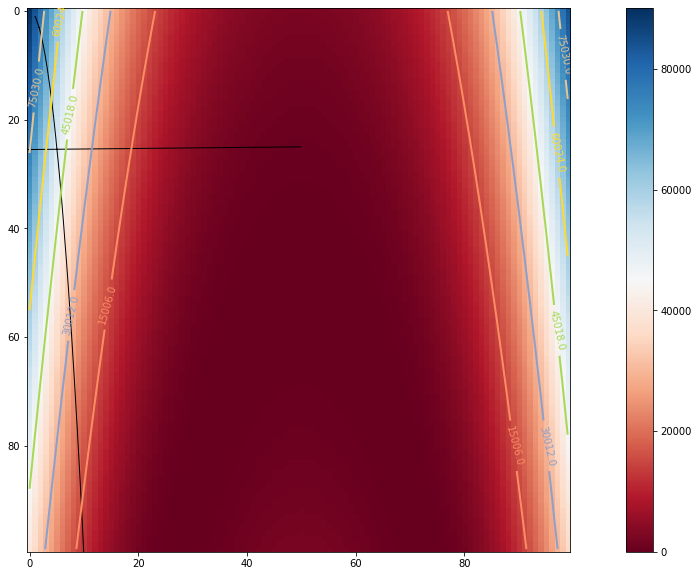

In [ ]:
x, iters = bfs(rozenbrock_vec, get_gradient_vec(rozenbrock_vec, 2), 
                np.array(start))
print(x)
print(f'Количество итераций: {len(iters)}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, iters)

[-2.80511809  3.13131252]
Количество итераций: 40


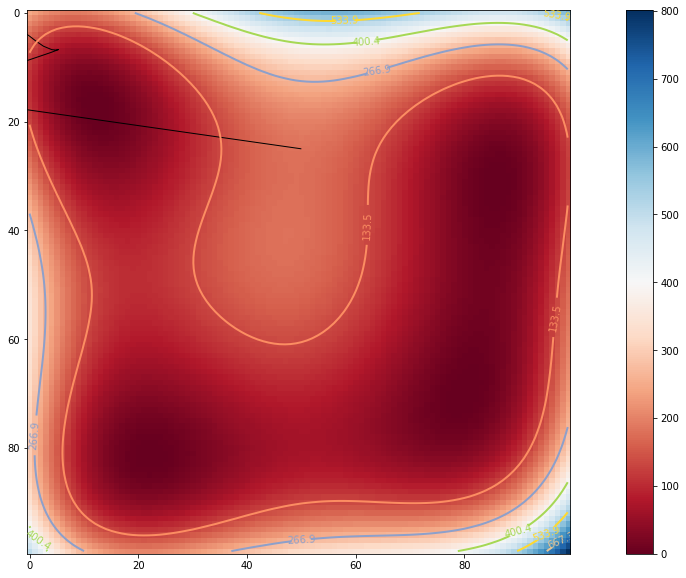

In [ ]:
x, iters = bfs(himmelbau_vec, get_gradient_vec(himmelbau_vec, 2), 
                np.array(start))
print(x)
print(f'Количество итераций: {len(iters)}')
draw_func(himmelbau, (5, -5), (5, -5), 6, iters)

[0.28571429 0.35714286]
Количество итераций: 2


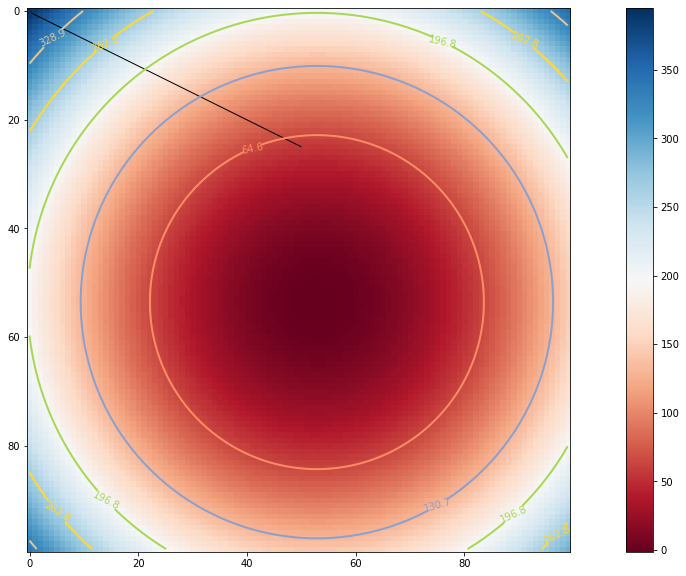

In [ ]:
x, iters = bfs(quadratic_form_vec, get_gradient_vec(quadratic_form_vec, 2), 
                np.array(start))
print(x)
print(f'Количество итераций: {len(iters)}')
draw_func(quadratic_form, (5, -5), (5, -5), 6, iters)

Метод работал довольно быстро и неплохо приблизился к задуманным экстремумам. Дальше реализуем остальные методы и сравним с ними полученные реузльтаты.

Реализуем метод Пауэлла. Для поиска длины шага воспользуемся золотым сечением, но модифицируем его, чтоб научить работать с n-мерными векторами.

In [ ]:
def golden_ratio(function, e, current, a, b, epsilon):
    c = (3 - np.sqrt(5)) / 2
    # подсчитываем x1, x2, на основе которых будем искать x
    x1 = a + (b - a) * c
    x2 = a + b - x1

    # подсчитываем для значения функций x1, x2
    fx1 = function(current + x1 * e)
    fx2 = function(current + x2 * e)

    # пока разница больше эпсилон
    while b - a > epsilon:
        # если результат для x1 меньше
        if fx1 <= fx2:
            b = x2
            x2 = x1
            fx2 = fx1
            x1 = a + c * (b - a)
            fx1 = function(current + x1 * e)
            # перезаписываем х под х1
            x = x1
        else:
            a = x1
            x1 = x2
            fx1 = fx2
            x2 = b - c * (b - a)
            fx2 = function(current + x2 * e)
            # перезаписываем х под х2
            x = x2

    return x

In [ ]:
def powell(function, helper_function, starting_position, 
           epsilon=1e-8, gda=-5, gdb=5):
    # размерность
    dimension = starting_position.size
    # генерируем матрицу с единицами по диагонали
    e = np.eye(dimension)
    # результат
    x = starting_position
    x1 = x + 1
    num_iterations = 0
    iters = []

    # проверяем было ли оптимизировано
    while np.max(np.abs(x - x1)) > epsilon:
        iters.append(x)
        num_iterations += 1
        current = x
        # проходим по всем измерениям и оптимизируем каждое по отдельности
        for i in range(dimension):
            theta = helper_function(
                function, e[:, i], current, gda, gdb, epsilon)
            # пересчитываем позицию
            current = current + theta * e[:, i]

        # снова обходим и сдвигаем матрицу на 1 вправо
        for i in range(dimension - 1):
            e[:, i] = e[:, i + 1]
        e[:, dimension - 1] = current - x

        x1 = x
        # пересчитываем x, посчитав длину шага
        theta = helper_function(function, e[:, dimension - 1], current, gda, gdb, epsilon)
        x = current + theta * e[:, dimension - 1]

    return x, np.array(iters)

Проверим реализацию метода Пауэлла.

[-9.19154086 84.38208491]
Количество итераций: 1137


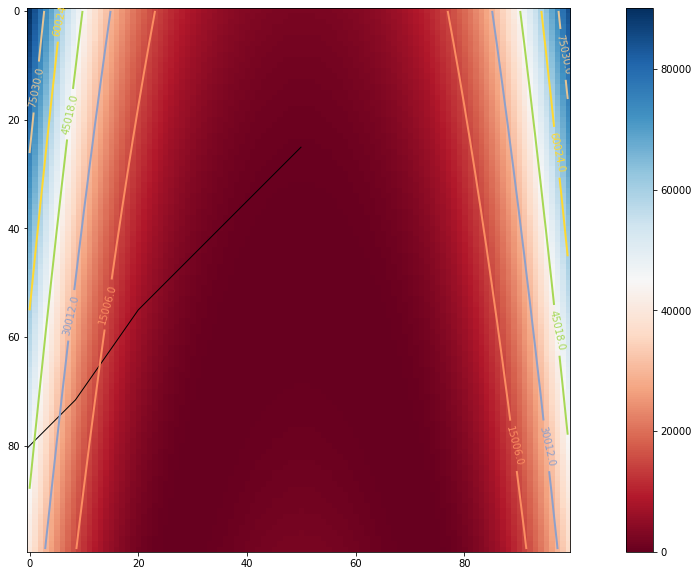

In [ ]:
x, its = powell(rozenbrock_vec, golden_ratio, np.array(start))
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, its)

Метод так и не пришёл в точку (1, 1), попробуем выбрать точку ближе к экстремуму.

[1.00000237 1.0000048 ]
Количество итераций: 14


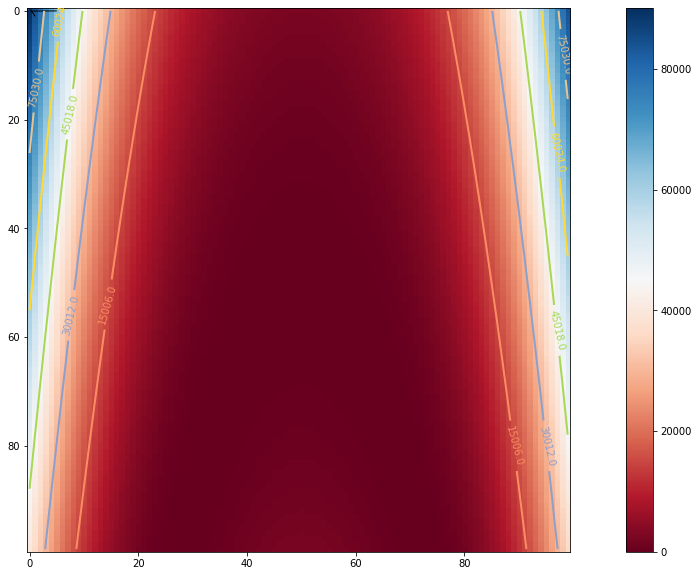

In [ ]:
x, its = powell(rozenbrock_vec, golden_ratio, np.array([5, 0]))
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, its)

Метод пришёл к минимуму за малое количество шагов, но потребовалось стартовать максимально близко к экстремуму.

Для функции Химмельблау метод сработал довольно неплохо и быстро приблизился к минимуму.

[-2.61108329  3.26142991]
Количество итераций: 18


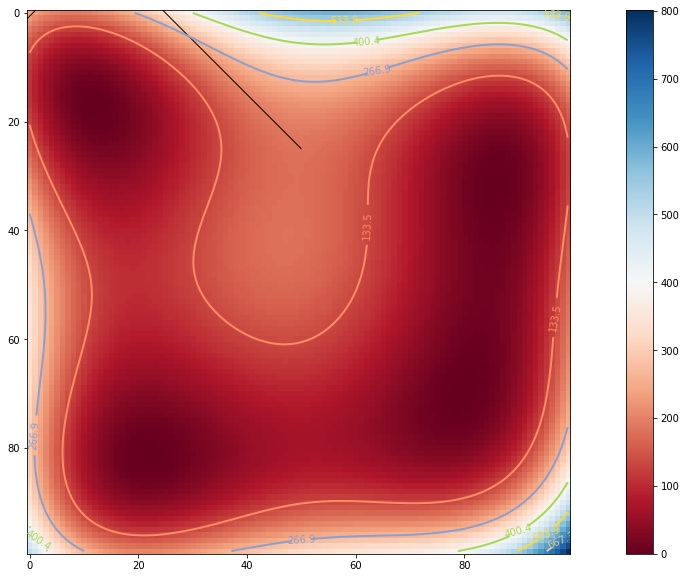

In [ ]:
x, its = powell(himmelbau_vec, golden_ratio, np.array(start))
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(himmelbau, (5, -5), (5, -5), 6, its)

Для квадратичной формы метод также хорошо сработал, но потребовал больше итераций чем тот же метод Ньютона.

[0.28571382 0.35714263]
Количество итераций: 5


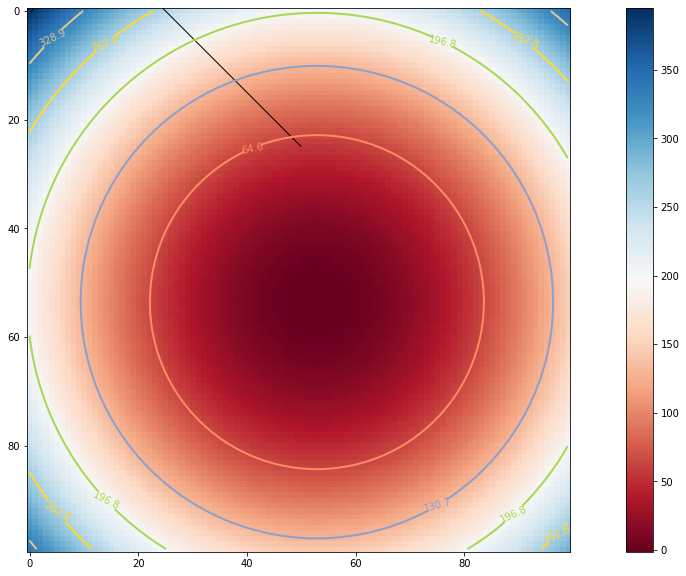

In [ ]:
x, its = powell(quadratic_form_vec, golden_ratio, np.array(start))
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(quadratic_form, (5, -5), (5, -5), 6, its)

В целом метод Пауэлла показал себя хорошо для Химмельблау и квадратичной формы. Для функции Розенброка данный метод подошёл довольно плохо.

Теперь реализуем метод Дэвидона-Флетчера-Пауэлла.

In [ ]:
# поиск длины шага
def linesearch(x, d, g, f_val, n, fct, grad):
    sigma = 0.1
    rho = 0.01
    tau1  = 9.0
    tau2  = 0.1
    tau3  = 0.5
    f_lower_bound = -1.0e20

    alpha = optimize(
        x, d, g, f_val, n, sigma, rho, 
        tau1, tau2, tau3, f_lower_bound, fct, grad
    )

    return alpha


# подбор альфа
def optimize(x, d, g, f_val, n, sigma, rho, tau1, tau2, 
                 tau3, f_lower_bound, fct, grad):
    max_iter = 20
    alpha_prev = 0.0
    f_zero = f_val
    df_zero = np.inner(d,g)
    f_a_prev = f_zero
    df_a_prev = df_zero
    mu = (f_lower_bound - f_zero) / (rho * df_zero)

    alpha = 1.0

    k=0
    while(k < max_iter):
        # пересчитываем х
        x_alpha = x + alpha * d
        f_a = fct(x_alpha)

        # если новое значение функции больше предидущего
        if(f_a > (f_zero + alpha * rho * df_zero) or f_a >= f_a_prev):
            alpha = sectioning(x, d, rho, tau2, 
                               tau3, sigma, alpha_prev, alpha, f_zero, 
                               df_zero, f_a_prev, f_a, df_a_prev, alpha, 
                               fct, grad)
            return alpha

        # пересчитываем градиент
        g_alpha = count_gradient_vec(grad, x_alpha)
        df_a = np.inner(g_alpha, d)
        
        # если значение градиента подходит под критерий сигма - возвращаем
        if math.fabs(df_a) <= ((-sigma)*df_zero):
            return alpha
        
        # если градиент на d больше 0
        if df_a >= 0.0:
            return sectioning(x, d, rho, tau2, tau3, sigma, 
                              alpha, alpha_prev, f_zero, df_zero, f_a,
                              f_a_prev, df_a, alpha, fct, grad)

        # если мю меньше разницы альф
        if mu < 2 * alpha - alpha_prev:
            # перезаписываем альфа
            alpha_prev = alpha
            f_a_prev = f_a
            df_a_prev = df_a
            alpha = mu
        else:
            # считаем новую альфа при помощи интерполяции
            a1 = 2 * alpha - alpha_prev
            b1 = min(mu, alpha+tau1*(alpha-alpha_prev))
            tmp = alpha
            alpha =  interpolate(
                f_a_prev, df_a_prev, f_a, alpha_prev, alpha, a1, b1
            )
            alpha_prev = tmp
            f_a_prev = f_a
            df_a_prev = df_a

        k = k+1

# подбираем альфа в пределах a, b
def sectioning(x, d, rho, tau2, tau3, sigma, a, b, 
               f_zero, df_zero, f_a, f_b, df_a, alpha, fct, grad):

    k=0
    max_iter = 20
    
    while(k < max_iter):
        a1 = a + tau2 * (b - a)
        b1 = b - tau3 * (b - a)

        # пересчитываем альфа при помощи интерполяции
        alpha = interpolate(f_a, df_a, f_b, a, b, a1, b1)

        # пересчитываем
        f_a_prev = f_a
        x_alpha = x + alpha * d
        f_a = fct(x_alpha)
        
        # если новое значение функции больше, то меняем правый лимит
        if(f_a > (f_zero + rho * alpha * df_zero) or f_a >= f_a_prev):
            b = alpha
            f_b = f_a
        else:
            # иначе пересчитываем градиент
            g_alpha = count_gradient_vec(grad, x_alpha)
            df_a = np.inner(g_alpha, d)
            
            # если новый градиент меньше сигмы - возвращаем
            if math.fabs(df_a) <= ((-sigma) * df_zero):
                return alpha

            # пересчитываем левый лимит
            a_prev = a
            a = alpha
            if (b-a_prev)*df_a >= 0.0:
                b = a_prev

        k = k+1

    return alpha


# интерполяция
def interpolate(f_a, df_a, f_b, a, b, a1, b1):
    alpha = 0.0
    # подсчитываем новые а,b
    za1 = f_a + df_a * (a1 - a) + \
    (f_b - f_a - (b-a) * df_a) * (a1 - a) * (a1 - a) / ((b - a) * (b - a))
    zb1 = f_a + df_a * (b1 - a) + \
    (f_b - f_a - (b-a) * df_a) * (b1 - a) * (b1 - a)/((b - a) * (b - a))
    
    # выбираем минимум
    if za1 < zb1:
        endptmin = a1
    else:
        endptmin = b1

    # выбираем экстремум
    root = a - (b - a) * (b - a) * \
    df_a / (2 * (f_b - f_a - (b - a) * df_a))

    # выбираем новое альфа
    if f_b - f_a - (b - a) * df_a < 0:
        if a1 < b1:
            if a1 <= root and root <= b1:
                alpha = endptmin
            if root < a1:
                alpha = b1
            if root > b1:
                alpha = a1
        else:
            if b1 <= root and root <= a1:
                alpha = endptmin
            if root < b1:
                alpha = a1
            if root > a1:
                alpha = b1
    else:
        if a1 < b1:
            if a1 <= root and root <= b1:
                alpha = root
            if root < a1:
                alpha = a1
            if root > b1:
                alpha = b1
        else:
            if b1 <= root and root <= a1:
                alpha = root
            if root < b1:
                alpha = b1
            if root > a1:
                alpha = a1

    return alpha

In [ ]:
# разница значений
def compute_distance(cur_val, opt_val, init_val):
  return (cur_val - opt_val) / float(init_val - opt_val)


# считаем разницу градиенто
def compute_distance2(grad, orig_grad):
  return np.linalg.norm(grad) / (1 + np.linalg.norm(orig_grad))


# инициализируем гессиан
def init_hessian(hessian, x):
  H_inv = count_hessian_vec(hessian, x)
  H = np.linalg.pinv(H_inv)
  return H


# обновляем гессиан
def update_hessian(H, x_old, x_new, grad_old, grad_new):
  q = grad_new - grad_old
  p = x_new - x_old
  r1 = p.dot(q)
  y = H.dot(q)
  r2 = q.dot(y)

  p = p[np.newaxis].T
  H = H - np.outer(y, y)/(r2 + 1E-16) + np.outer(p, p)/(r1 + 1E-16)

  return H


# метод ДФП
def dfp(func, grad, hessian, start, epsilon=0.00001, dims=2, n=1000):
  f_init_val = func(start)
  f_val = f_init_val
  H = init_hessian(hessian, start)
  grad_new = count_gradient_vec(grad, start)

  iter = 0
  dist = 1.0
  hist = []

  # пока дистанция больше эпсилона
  while iter < n and dist > epsilon:
      hist.append(start.copy())
      d = -np.dot(H, grad_new)
      # подбираем альфа
      alpha = linesearch(start, d, grad_new, f_val, dims, func, grad)

      # пересчитываем значения
      x_old = start
      start = x_old + alpha * d
      grad_old = grad_new
      grad_new = count_gradient_vec(grad, start)
      f_val = func(start)

      # обновляем гессиан
      H = update_hessian(H, x_old, start, grad_old, grad_new)

      # считаем дистанцию
      dist = compute_distance(f_val, 0.0, f_init_val)
      iter += 1

  hist.append(start.copy())
  return start, iter, np.array(hist)

Протестируем метод на стандартных функциях.

[  49.99990101 2499.99010103]
Количество итераций: 1


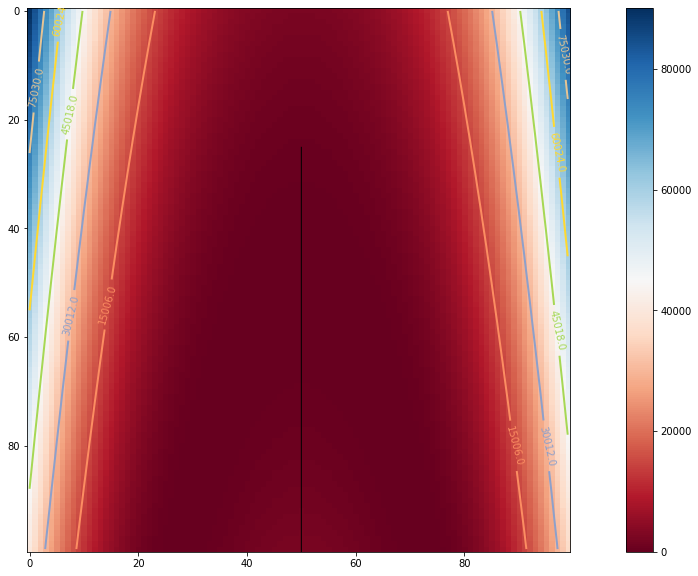

In [ ]:
x, n, its = dfp(rozenbrock_vec, 
    get_gradient_vec(rozenbrock_vec, 2), 
    get_hessian_vec(rozenbrock_vec, 2),
    np.array(start))
print(x)
print(f'Количество итераций: {n}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, its)

Из точки (50, 25) метод так и не пришёл к экстремуму. Попробуем выбрать другой старт (точка (3, 50)).

[3.00024393 9.00146359]
Количество итераций: 1000


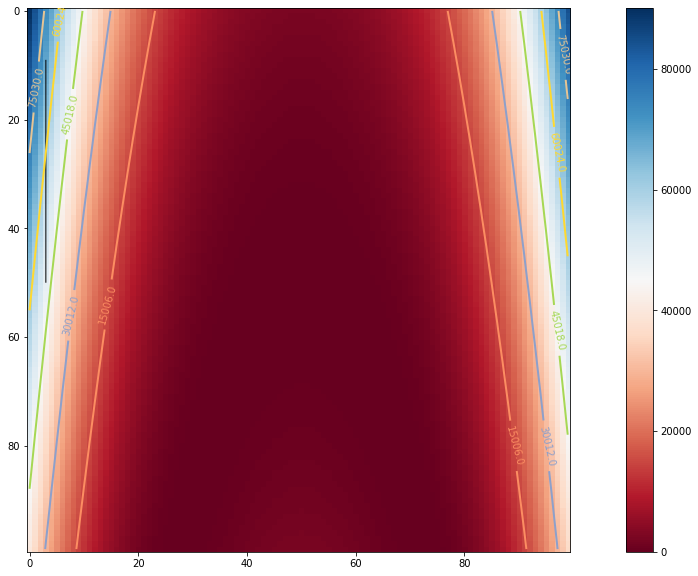

In [ ]:
x, n, its = dfp(rozenbrock_vec, 
    get_gradient_vec(rozenbrock_vec, 2), 
    get_hessian_vec(rozenbrock_vec, 2),
    np.array([3, 50]))
print(x)
print(f'Количество итераций: {n}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, its)

Метод начал двигаться к экстремуму, но так и не дошёл до него. Поменяем старт ещё раз (старт в (1, 50)).

[1. 1.]
Количество итераций: 1


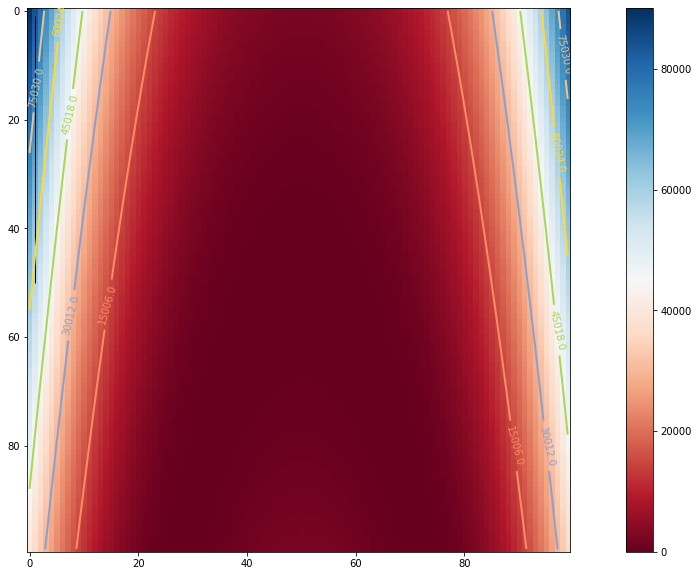

In [ ]:
x, n, its = dfp(rozenbrock_vec, 
    get_gradient_vec(rozenbrock_vec, 2), 
    get_hessian_vec(rozenbrock_vec, 2),
    np.array([1, 50]))
print(x)
print(f'Количество итераций: {n}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, its)

Теперь метод дошёл до необходимой точки. Проверим на других функциях.

[3.21546179 0.62953152]
Количество итераций: 3


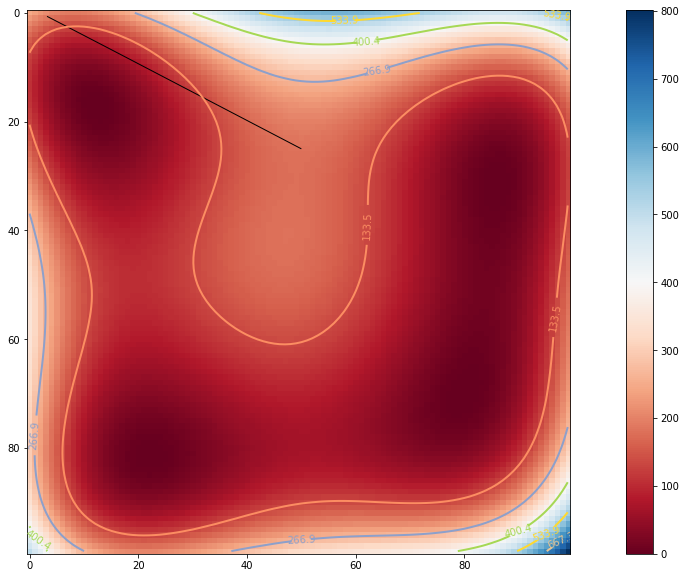

In [ ]:
x, n, its = dfp(himmelbau_vec, 
    get_gradient_vec(himmelbau_vec, 2), 
    get_hessian_vec(himmelbau_vec, 2),
    np.array([50, 25]))
print(x)
print(f'Количество итераций: {n}')
draw_func(himmelbau, (5, -5), (5, -5), 6, its)

На функции Химмельблау метод приблизился к экстремуму по x1, но по x2 промахнулся на 1.4. В целом метод сработал довольно быстро.

[0.28571429 0.35714286]
Количество итераций: 1


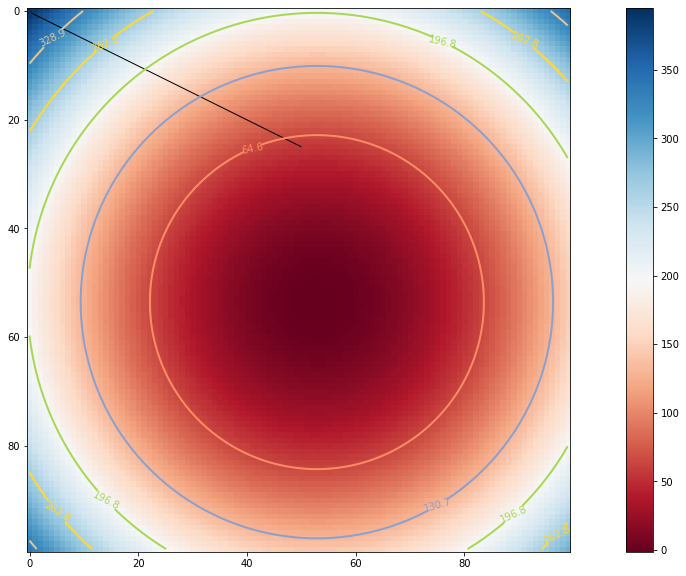

In [ ]:
x, n, its = dfp(quadratic_form_vec, 
    get_gradient_vec(quadratic_form_vec, 2), 
    get_hessian_vec(quadratic_form_vec, 2),
    np.array([50, 25]))
print(x)
print(f'Количество итераций: {n}')
draw_func(quadratic_form, (5, -5), (5, -5), 6, its)

Для квадратичной формы данный метод показал лучший результат серди всех реализованных на данный момент. Сравним методы по количеству итераций:

*   Метод Бройдена-Флетчера-Пауэлла

1.   Розенброк: **267** итераций
2.   Химмельблау: **40** итераций
3.   Квадратичная форма: **2** итерации


*   Метод Пауэлла

1.   Розенброк: **14** итераций
2.   Химмельблау: **18** итераций
3.   Квадратичная форма: **5** итераций


*    Метод Дэвидона-Флетчера-Пауэлла

1.   Розенброк: **1** итерация
2.   Химмельблау: **3** итерации
3.   Квадратичная форма: **1** итерация

Самым быстрым получается метод Дэвидона-Флетчера-Пауэлла, но для функции Розенброка ему нужно стартовать довольно близко, чтобы сойтись в экстремуме (1, 1). Но для других функций метод сработал быстрее любого другого. Метод Пауэлла сработал также неплохо, но для функции Розенброка не подошёл. Проверим как метод БФШ сработает, начав из той же точки, что и метод ДФП.

[1.28256764 1.64498964]
Количество итераций: 5


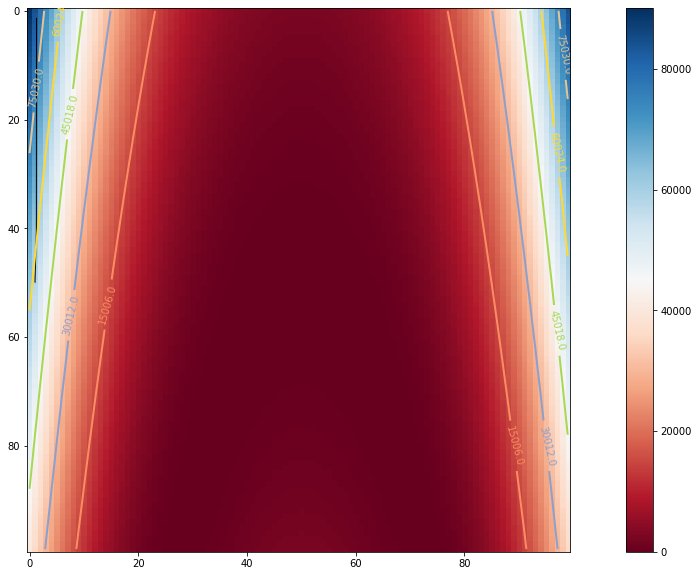

In [ ]:
x, iters = bfs(rozenbrock_vec, get_gradient_vec(rozenbrock_vec, 2), 
                np.array([1, 50]))
print(x)
print(f'Количество итераций: {len(iters)}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, iters)

Результат оказался не так точен как у ДФП и затребовал 3 итерации вместо одной. Отобразим количества итераций на графике.

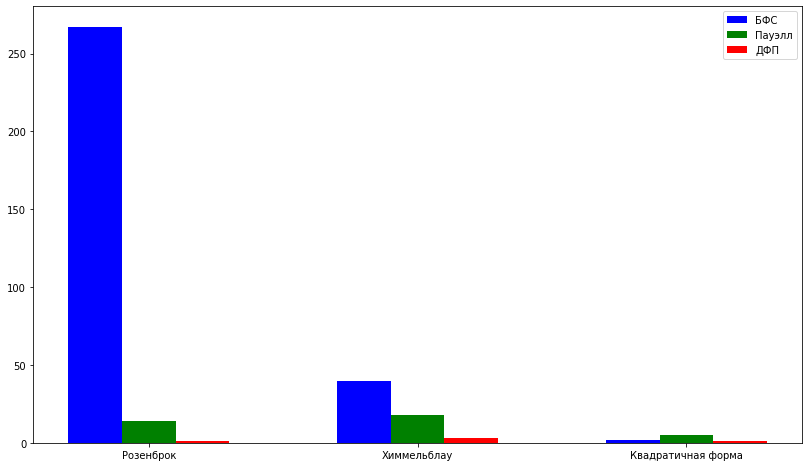

In [ ]:
labels = ['Розенброк', 'Химмельблау', 'Квадратичная форма']
bfs_iters = [267, 40, 2]
powell_iters = [14, 18, 5]
dfp_iters = [1, 3, 1]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

ax.bar(x-0.2, bfs_iters, width=0.2, color='b', align='center', label='БФС')
ax.bar(x, powell_iters, width=0.2, color='g', align='center', label='Пауэлл')
ax.bar(x+0.2, dfp_iters, width=0.2, color='r', align='center', label='ДФП')

fig.tight_layout()

fig.set_figheight(7)
fig.set_figwidth(12)

plt.xticks(np.arange(3), labels)

plt.legend()

plt.show()

На графике также видно, что ДФП оказался наиболее оптимальным. Теперь сравним его с методами Ньютона и скорейшего спуска.

In [ ]:
x, n1, its1 = dfp(rozenbrock_vec, 
    get_gradient_vec(rozenbrock_vec, 2), 
    get_hessian_vec(rozenbrock_vec, 2),
    np.array([1, 50]))
x, nits1 = newton_ndim(
    rozenbrock_vec, 
    get_gradient_vec(rozenbrock_vec, 2), 
    get_hessian_vec(rozenbrock_vec, 2), 
    np.array([1, 50]))
x, sits1 = msd_ndim(
    get_gradient_vec(rozenbrock_vec, 2), 
    np.array([1, 50]))

print(f'ДФП: {n1}\nНьютон: {len(nits1)}\nСкорейший спуск: {len(sits1)}')

ДФП: 1
Ньютон: 2
Скорейший спуск: 8


In [ ]:
x, n2, its2 = dfp(himmelbau_vec, 
    get_gradient_vec(himmelbau_vec, 2), 
    get_hessian_vec(himmelbau_vec, 2),
    np.array(start))
x, nits2 = newton_ndim(
    himmelbau_vec, 
    get_gradient_vec(himmelbau_vec, 2), 
    get_hessian_vec(himmelbau_vec, 2), 
    np.array(start))
x, sits2 = msd_ndim(
    get_gradient_vec(himmelbau_vec, 2), 
    np.array([1, 50]))

print(f'ДФП: {n2}\nНьютон: {len(nits2)}\nСкорейший спуск: {len(sits2)}')

ДФП: 3
Ньютон: 12
Скорейший спуск: 7


In [ ]:
x, n3, its3 = dfp(quadratic_form_vec, 
    get_gradient_vec(quadratic_form_vec, 2), 
    get_hessian_vec(quadratic_form_vec, 2),
    np.array(start))
x, nits3 = newton_ndim(
    quadratic_form_vec, 
    get_gradient_vec(quadratic_form_vec, 2), 
    get_hessian_vec(quadratic_form_vec, 2), 
    start)
x, sits3 = msd_ndim(
    get_gradient_vec(quadratic_form_vec, 2), 
    start)

print(f'ДФП: {n3}\nНьютон: {len(nits3)}\nСкорейший спуск: {len(sits3)}')

ДФП: 1
Ньютон: 2
Скорейший спуск: 522


Даже сейчас явно видно, что ДФП сработал лучше, чем Ньтоновский метод и скорейший спуск. Отобразим это на графике.

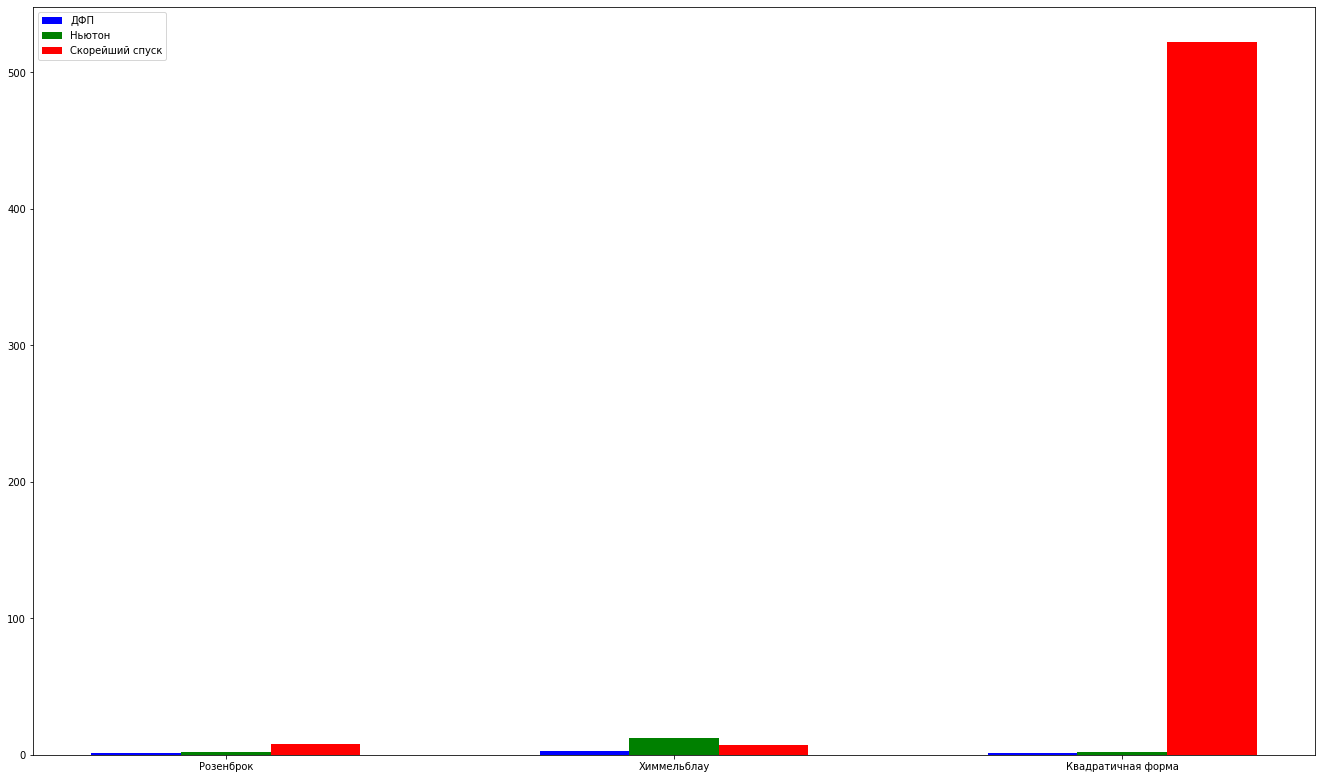

In [ ]:
labels = ['Розенброк', 'Химмельблау', 'Квадратичная форма']
dfp_iters = [n1, n2, n3]
msd_iters = [len(sits1), len(sits2), len(sits3)]
newton_iters = [len(nits1), len(nits2), len(nits3)]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

ax.bar(x-0.2, dfp_iters, width=0.2, color='b', align='center', label='ДФП')
ax.bar(x, newton_iters, width=0.2, color='g', align='center', label='Ньютон')
ax.bar(x+0.2, msd_iters, width=0.2, color='r', align='center', 
       label='Скорейший спуск')

fig.tight_layout()

fig.set_figheight(12)
fig.set_figwidth(20)

plt.xticks(np.arange(3), labels)

plt.legend()

plt.show()

Сравним скорость сходимости квази-Ньютоновских методов и методов Ньютона и скорейшего спуска для разных размерностей квадратичной формы (10, 50, 100).

Для этого создадим функцию, которая будет считать квадратичную форму n-ой размерности.

In [ ]:
An = None
bn = None

In [ ]:
def quadratic_form_ndim(x):
  global An
  global bn

  if An is None or An.shape[0] != x.shape[0]:
    An = make_spd_matrix(x.shape[0])
  if bn is None or bn.shape[0] != x.shape[0]:
    bn = np.random.rand(x.shape[0])
  
  symbols = ''
  for i in range(x.shape[0]):
    symbols += f'x{i + 1} '
  arr = np.asarray(sym.symbols(symbols))
  f =  sym.lambdify(([arr]), 
                    np.dot(arr.transpose(), np.dot(An, arr)) + np.dot(bn, x), 
                    'numpy'
                  )
  return f(x)

Метод Ньютона работал одинаково быстро для всех выбраных размерностей. Количество итераций не росло, но значительно увеличивалось время выполнения.

In [ ]:
dims = [10, 50, 100]
iter_nw = []

for i in range(3):
  dim = dims[i]
  print(f'Размерность: {dim}')
  root, iters = newton_ndim(
    quadratic_form_ndim, 
    get_gradient_vec(quadratic_form_ndim, dim), 
    get_hessian_vec(quadratic_form_ndim, dim), 
    np.array([0] * dim))
  print('Количество итераций: ', len(iters))
  iter_nw.append(len(iters))
  print('\n----------------------------------\n')

Размерность: 10
Количество итераций:  2

----------------------------------

Размерность: 50
Количество итераций:  2

----------------------------------

Размерность: 100
Количество итераций:  2

----------------------------------



Метод скорейшего спуска работал медленней с ростом размерности и достиг лимита итераций. Время также значительно возрастало.

In [ ]:
iter_sd = []

for i in range(3):
  dim = dims[i]
  print(f'Размерность: {dim}')
  root, iters = msd_ndim(
      get_gradient_vec(quadratic_form_ndim, dim),
      np.array([0] * dim)
  )
  print('Количество итераций: ', len(iters))
  iter_sd.append(len(iters))
  print('\n----------------------------------\n')

Размерность: 10
Количество итераций:  6968

----------------------------------

Размерность: 50
Количество итераций:  10000

----------------------------------

Размерность: 100
Количество итераций:  10000

----------------------------------



ДФП показал себя хорошо с точки зрения количества итераций, но время также значительно возрастало.

In [ ]:
iter_dfp = []

for i in range(3):
  dim = dims[i]
  print(f'Размерность: {dim}')
  res = dfp(quadratic_form_ndim, 
    get_gradient_vec(quadratic_form_ndim, dim), 
    get_hessian_vec(quadratic_form_ndim, dim),
    np.array([0] * dim))
  print('Количество итераций: ', res[1])
  iter_dfp.append(res[1])
  print('\n----------------------------------\n')

Размерность: 10
Количество итераций:  1

----------------------------------

Размерность: 50
Количество итераций:  1

----------------------------------

Размерность: 100
Количество итераций:  1

----------------------------------



БФС потребовал слишком много времени на работу при размерности в 50, потому был остановлен. Число итераций было больше, чем у конкурентов даже для 10 измерений.

In [ ]:
iter_bfs = []

for i in range(3):
  dim = dims[i]
  print(f'Размерность: {dim}')
  res = bfs(
      quadratic_form_ndim,
      get_gradient_vec(quadratic_form_ndim, dim),
      np.array([0] * dim)
  )
  print('Количество итераций: ', len(res[1]))
  iter_bfs.append(len(res[1]))
  print('\n----------------------------------\n')

Размерность: 10
Количество итераций:  16

----------------------------------

Размерность: 50


KeyboardInterrupt: ignored

Метод Пауэлла работал очень долго даже при 10 измерениях. Было решено взять размерность 5 и проверить на ней. Уже здесь метод начал доганять по количеству итераций и времени метод БФС на 10-й размерности.

In [ ]:
iter_pw = []

dim = 5
print(f'Размерность: {dim}')
res = powell(
    quadratic_form_ndim,
    golden_ratio,
    np.array([0] * dim)
)
print('Количество итераций: ', len(res[1]))
iter_pw.append(len(res[1]))

Размерность: 5
Количество итераций:  13


Отобразим результаты на графиках. Таким образом метод ДФП показал себя наиболее эффективным для квадратичной формы среди представленных.

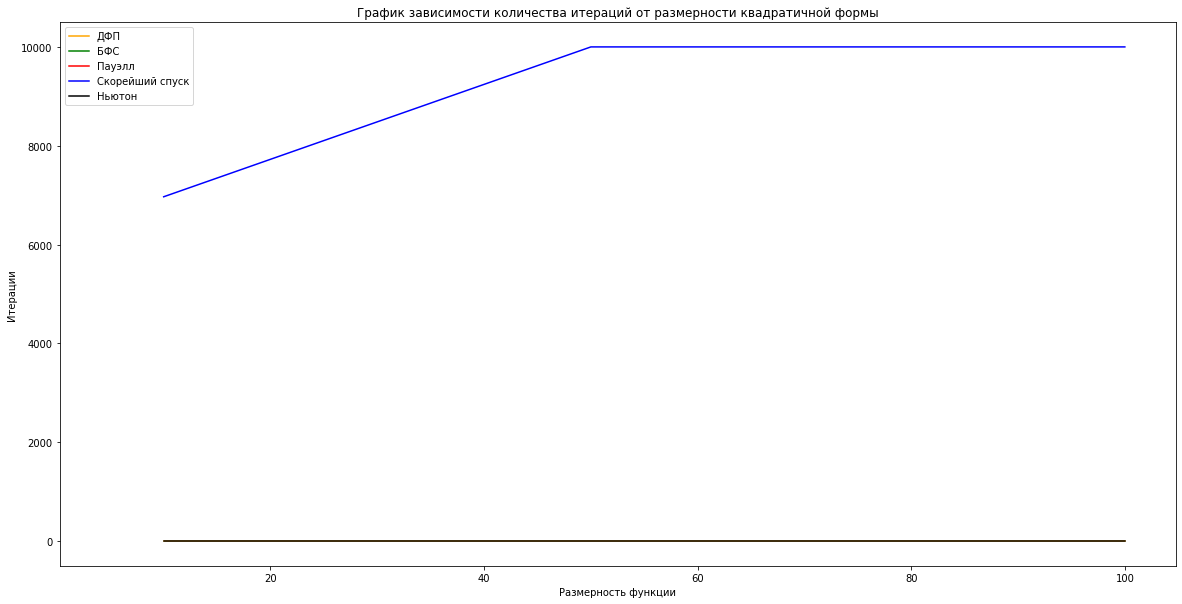

In [ ]:
plt.figure(figsize=(20,10))
plt.title("График зависимости количества итераций\
 от размерности квадратичной формы")
plt.plot(dims, iter_dfp, color="orange", label="ДФП")
plt.plot([dims[0]], iter_bfs, "-g", label="БФС")
plt.plot([5], iter_pw, "-r", label="Пауэлл")
plt.plot(dims, iter_sd, color="blue", label="Скорейший спуск")
plt.plot(dims, iter_nw, color="black", label="Ньютон")
plt.ylabel('Итерации')
plt.xlabel('Размерность функции')
plt.legend()
plt.show()

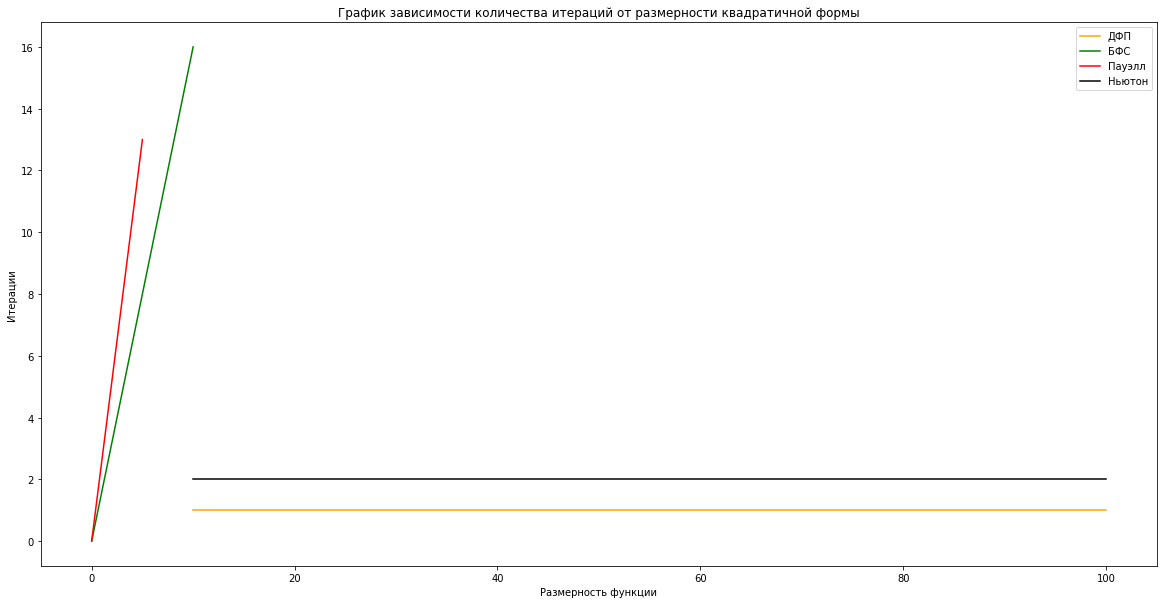

In [ ]:
plt.figure(figsize=(20,10))
plt.title("График зависимости количества итераций\
 от размерности квадратичной формы")
plt.plot(dims, iter_dfp, color="orange", label="ДФП")
plt.plot([0] + [dims[0]], [0] + iter_bfs, "-g", label="БФС")
plt.plot([0, 5], [0] + iter_pw, "-r", label="Пауэлл")
plt.plot(dims, iter_nw, color="black", label="Ньютон")
plt.ylabel('Итерации')
plt.xlabel('Размерность функции')
plt.legend()
plt.show()

Таким образом, были изучены квази-Ньютоновские методы, реализованы и сравнены с методами из предидущей лабораторной. Самым эффективным из реализованных оказался метод ДФП.

# Лабораторная работа №4

Цель лабораторной работы №4 - реализовать метод сопряженных градиентов.

Создадим функцию для данного метода, воспользовавшись некоторыми наработками из предидущей лабораторной.

In [ ]:
def conjugate_gradient(f, g, x0, n=1000, epsilon=1e-8, verbose=False):
  X = x0
  c2 = 0.1

  # подсчитываем начальные значения градиента и функции
  fk = f(X)
  gk = count_gradient_vec(g, X)
  pk = -gk
  hist =  []

  for i in range(n):
    # сохраняем позицию
    hist.append(X)

    # подсчитываем длину шага, чтоб подобрать сдвиг
    alpha = step_length(f, g, X, 1.0, pk, c2)
    # считаем новую позицию
    X1 = X + alpha * pk
    # пересчитываем градиент
    gk1 = count_gradient_vec(g, X1)
    # считаем соотношение нового градиента к старому значению
    beta_k1 = np.dot(gk1, gk1) / np.dot(gk, gk)
    # пересчитываем p
    pk1 = -gk1 + beta_k1 * pk

    if i % 10 == 0 and verbose:
      print("  iter={}, x={}, f(x)={}".format(i, X, f(X)))

    # если новая позиция подходит под допустимое значение ошибки
    if np.linalg.norm(X1 - X) < epsilon:
      # завершаем итерирование
      X = X1
      break

    # иначе перезаписываем переменные и продолжаем итерирование
    X = X1
    gk = gk1
    pk = pk1

  return X, np.asarray(hist)

Протестируем данную реализацию на уже привычных функциях из стартовой позиции в (50, 25). Начнём с функции Розенброка.

[nan nan]
Количество итераций: 1000


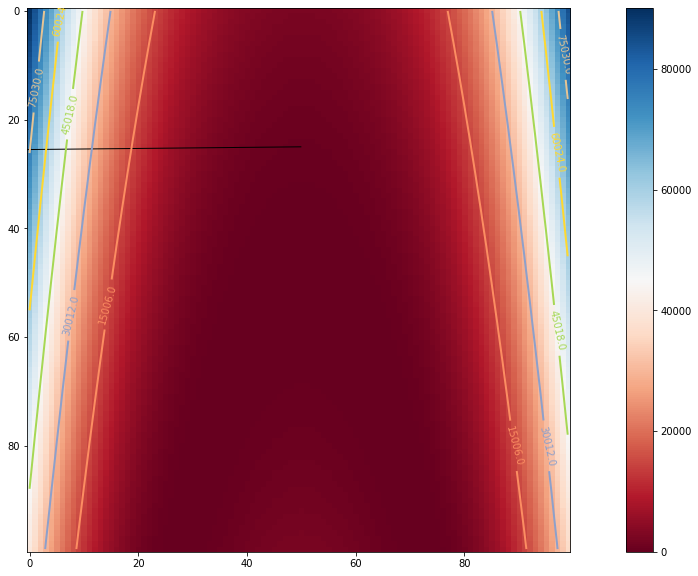

In [ ]:
x, its = conjugate_gradient(
    rozenbrock_vec, 
    get_gradient_vec(rozenbrock_vec, 2), 
    np.asarray(start)
  )
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, its)

Метод так и не пришёл к точке (1, 1), а потому попробуем протестировать с другой стартовой позицией (0, 50).

[0.99999965 0.99999931]
Количество итераций: 237


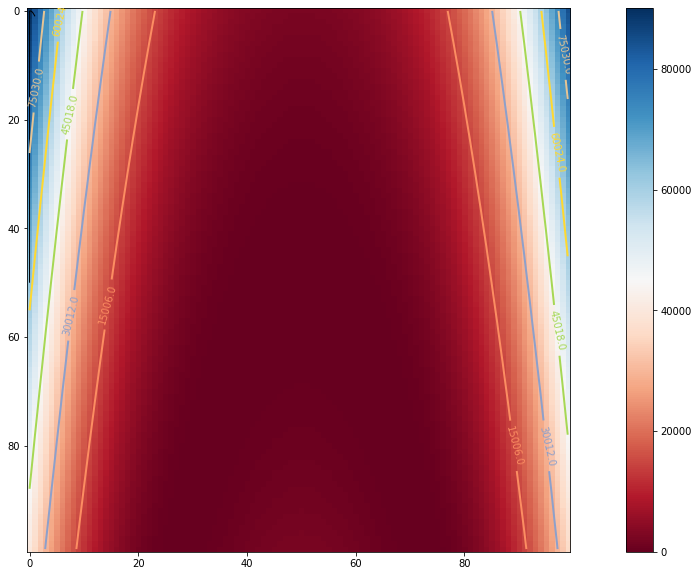

In [ ]:
x, its = conjugate_gradient(
    rozenbrock_vec, 
    get_gradient_vec(rozenbrock_vec, 2), 
    np.asarray([0, 50])
  )
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, its)

В этом случае метод нашёл экстремум, но потребовалось более 200 итераций. Перейдём к функции Химмельблау и квадратичной форме.

[nan nan]
Количество итераций: 1000


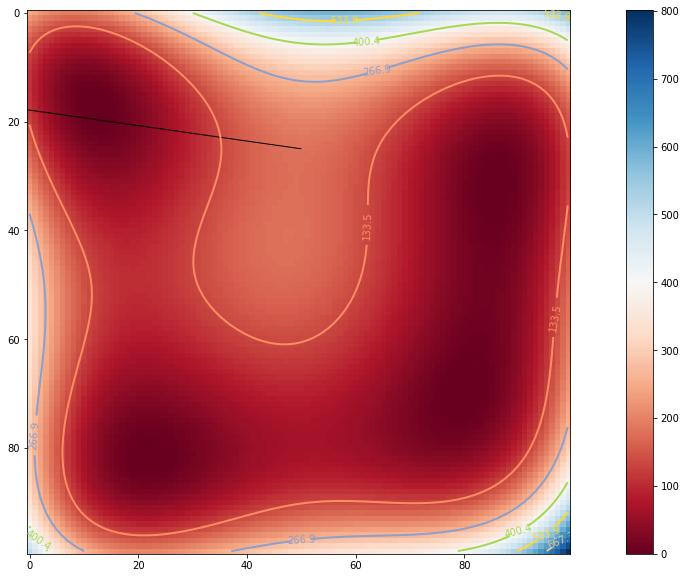

In [ ]:
x, its = conjugate_gradient(
    himmelbau_vec, 
    get_gradient_vec(himmelbau_vec, 2), 
    np.asarray(start)
  )
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(himmelbau, (5, -5), (5, -5), 6, its)

Для функции Химмельблау данна стартовая позиция снова не дала правильный результат. Сменим старт.

[nan nan]
Количество итераций: 1000


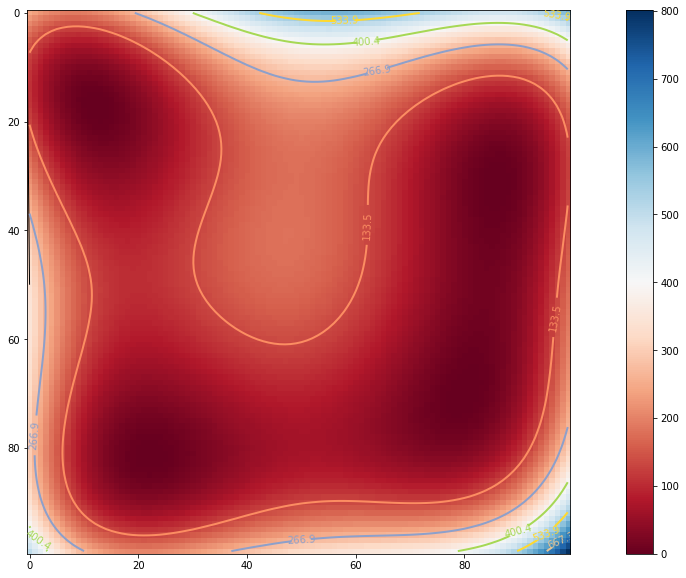

In [ ]:
x, its = conjugate_gradient(
    himmelbau_vec, 
    get_gradient_vec(himmelbau_vec, 2), 
    np.asarray([0, 50])
  )
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(himmelbau, (5, -5), (5, -5), 6, its)

Старт из (0, 50) снова не дал удовлетворительный результат. Возьмём точку вблизи одного из экстремума.

[3. 2.]
Количество итераций: 12


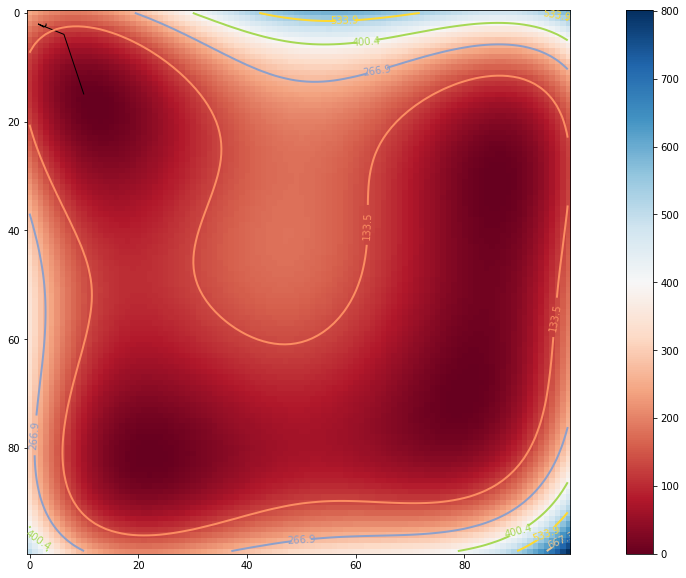

In [ ]:
x, its = conjugate_gradient(
    himmelbau_vec, 
    get_gradient_vec(himmelbau_vec, 2), 
    np.asarray([10, 15])
  )
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(himmelbau, (5, -5), (5, -5), 6, its)

Стартовав из точки (10, 15) метод наконец-то пришел к экстремуму в точке (3, 2). При этом потребовалось довольно мало итераций (всего 12).

Проверим метод на квадратичной форме.

[0.28571429 0.35714286]
Количество итераций: 2


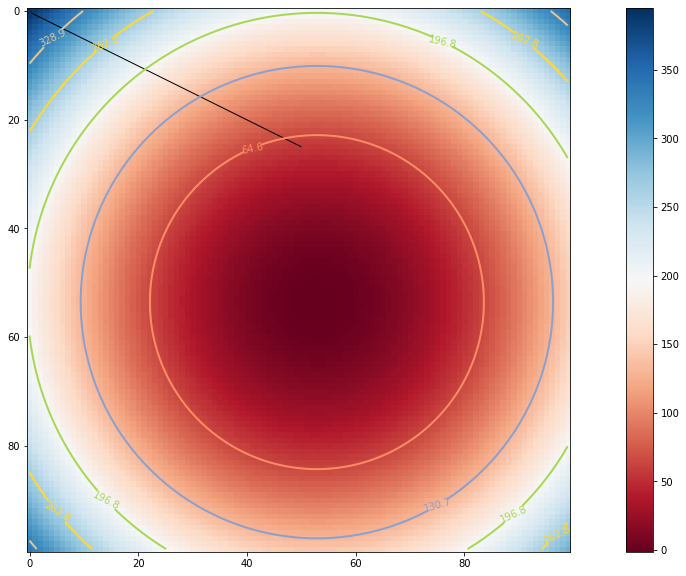

In [ ]:
x, its = conjugate_gradient(
    quadratic_form_vec, 
    get_gradient_vec(quadratic_form_vec, 2), 
    np.asarray(start)
  )
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(quadratic_form, (5, -5), (5, -5), 6, its)

Метод сработал очень быстро и при этом дал результат довольно близкий к (0, 0).

Проверим как этот метод будет себя вести при смене угла между основной осью эллипса и осью ох.

Угол: pi/4 * 0 (0.0 радиан)
[0.28571429 0.14705882]
Количество итераций: 3


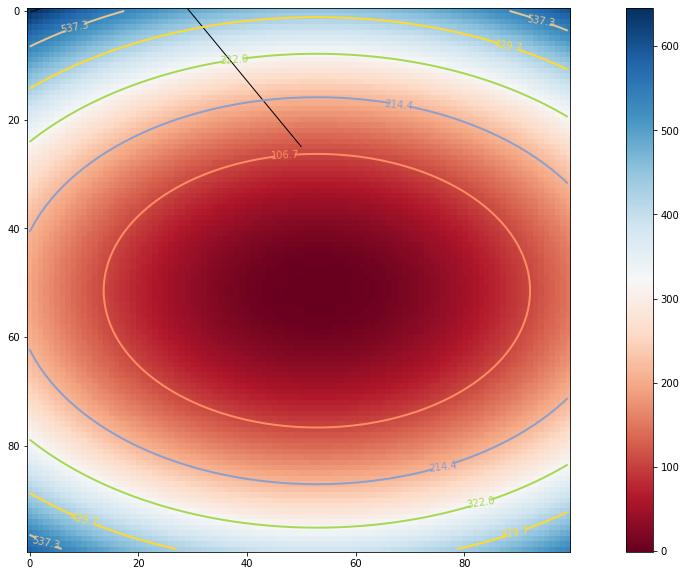

Угол: pi/4 * 1 (0.7853981633974483 радиан)
[0.09663866 0.16806723]
Количество итераций: 3


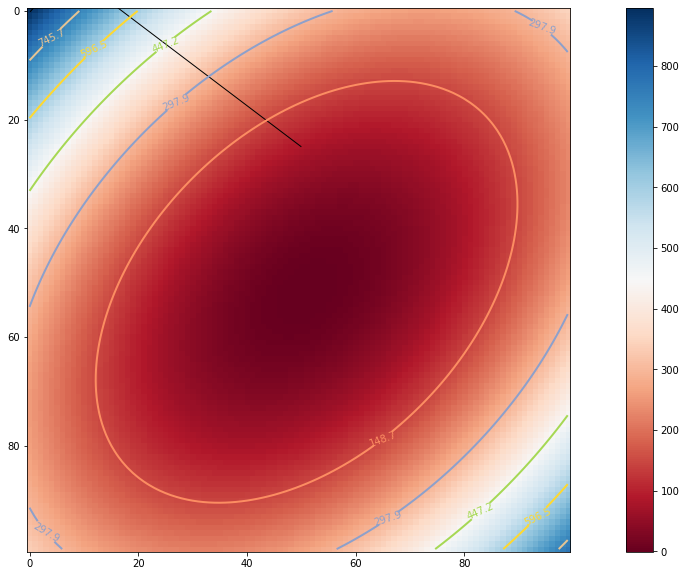

Угол: pi/4 * 2 (1.5707963267948966 радиан)
[0.11764706 0.35714286]
Количество итераций: 3


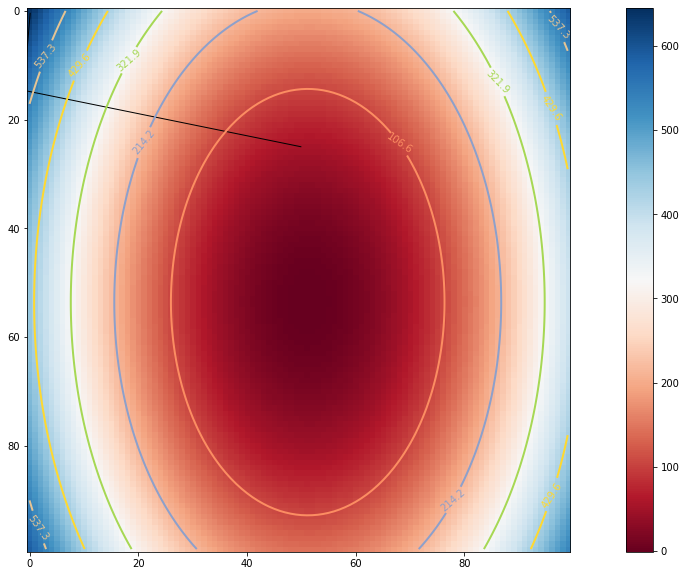

Угол: pi/4 * 3 (2.356194490192345 радиан)
[0.30672269 0.33613445]
Количество итераций: 3


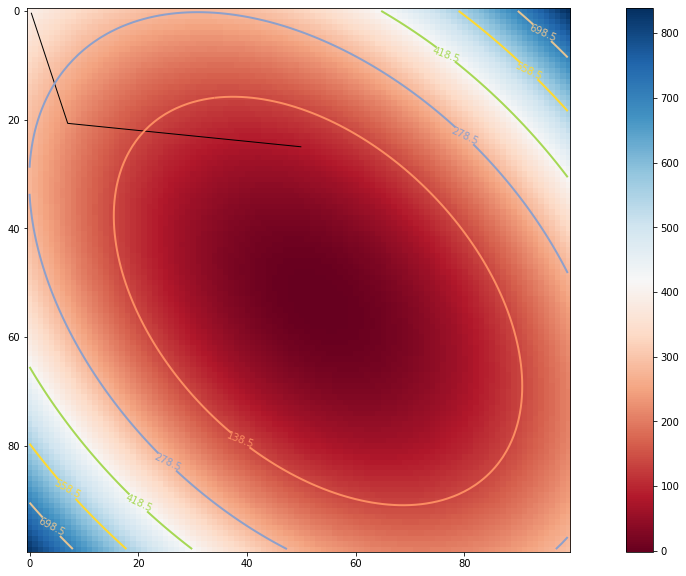

Угол: pi/4 * 4 (3.141592653589793 радиан)
[0.28571429 0.14705882]
Количество итераций: 3


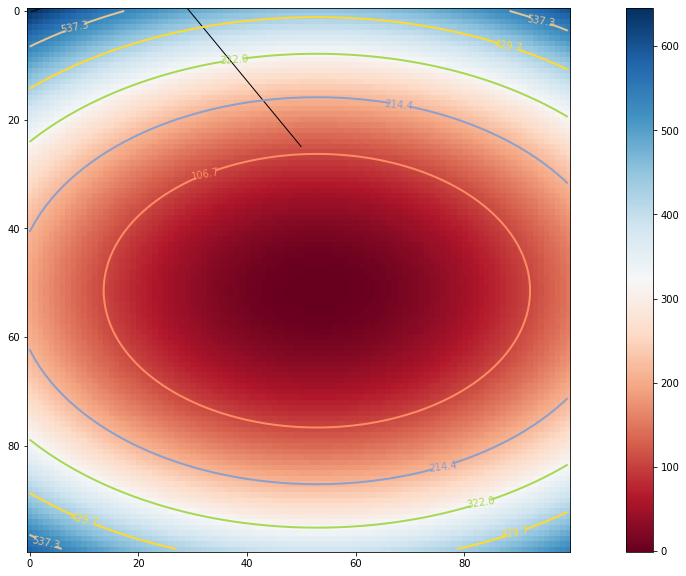

Угол: pi/4 * 5 (3.9269908169872414 радиан)
[0.09663866 0.16806723]
Количество итераций: 3


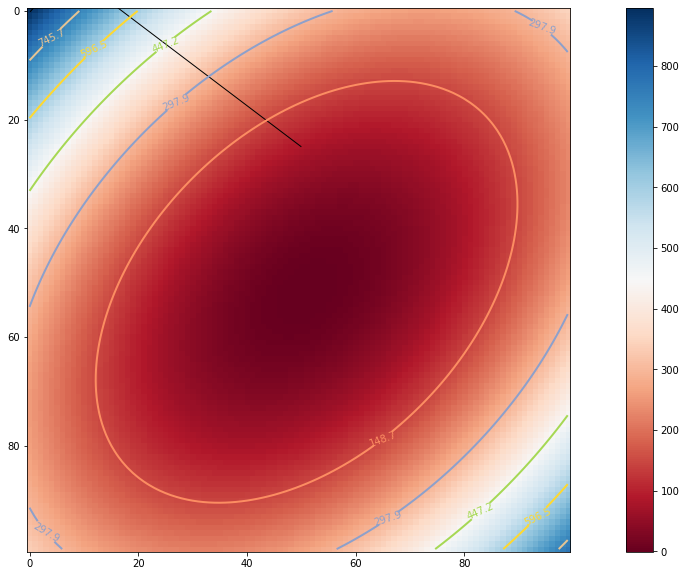

Угол: pi/4 * 6 (4.71238898038469 радиан)
[0.11764706 0.35714286]
Количество итераций: 3


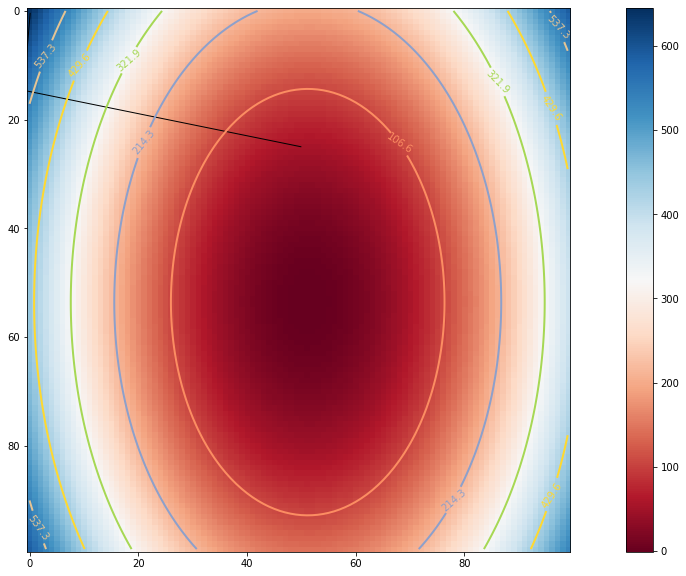

Угол: pi/4 * 7 (5.497787143782138 радиан)
[0.30672269 0.33613445]
Количество итераций: 3


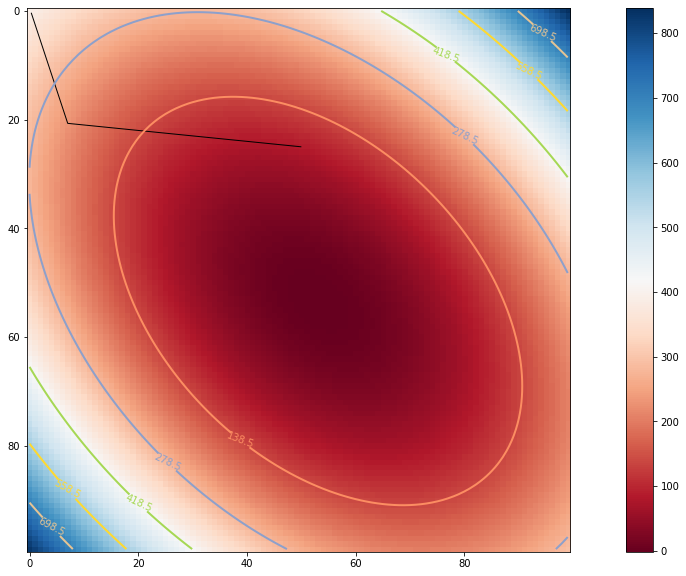

Угол: pi/4 * 8 (6.283185307179586 радиан)
[0.28571429 0.14705882]
Количество итераций: 3


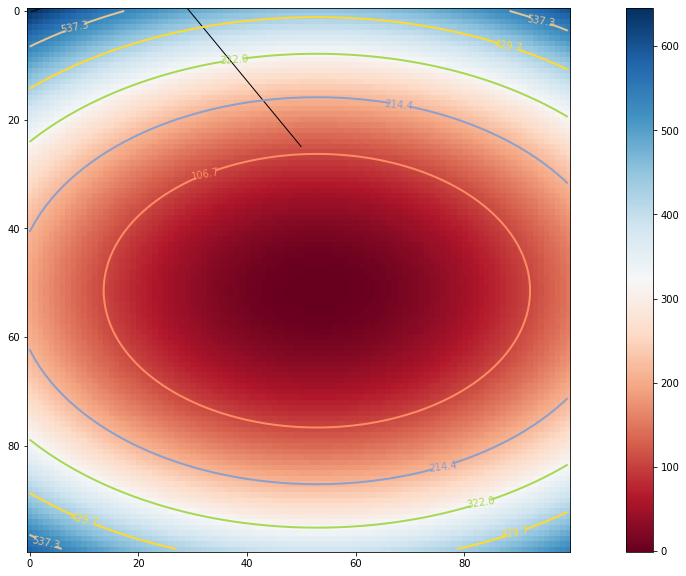

In [ ]:
A[1][1] = 17
angles = []
iter_nums = []

for i in range(0, 9):
  print(f'Угол: pi/4 * {i} ({(np.pi / 4) * i} радиан)')
  RADS = (np.pi / 4) * i
  root, iters = conjugate_gradient(
    quadratic_form_vec, 
    get_gradient_vec(quadratic_form_vec, 2), 
    np.asarray(start)
  )
  print(root)
  print(f'Количество итераций: {len(iters)}')
  angles.append(RADS)
  iter_nums.append(len(iters))
  draw_func(quadratic_form, (5, -5), (5, -5), 6, iters)

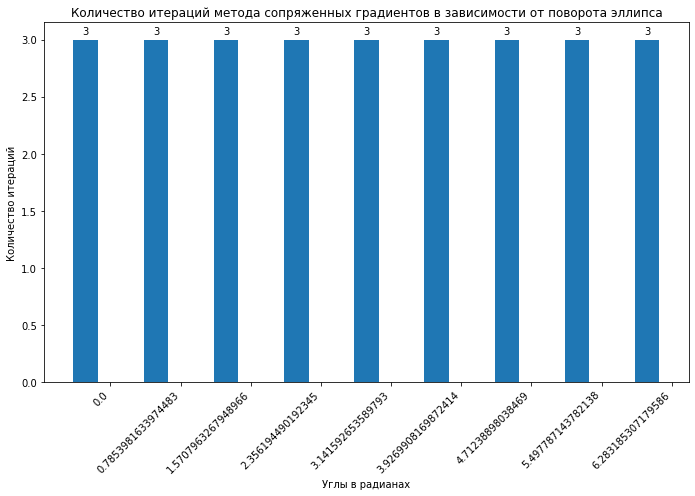

In [ ]:
x = np.arange(len(angles))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x - width, iter_nums, width)

ax.set_ylabel('Количество итераций')
ax.set_xlabel('Углы в радианах')
ax.set_title('Количество итераций метода сопряженных градиентов\
 в зависимости от поворота эллипса')
ax.set_xticks(x)
ax.set_xticklabels(angles, rotation = 45, ha="right")

for rect in rects:
  height = rect.get_height()
  ax.annotate('{}'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
              xytext=(0, 3),  # 3 points vertical offset
              textcoords="offset points",
              ha='center', va='bottom')

fig.set_figheight(7)
fig.set_figwidth(10)
fig.tight_layout()

plt.show()

Смена угла между ox и главной осью эллипса не влияет на результаты работы метода. Количество итераций не менялось и всегда равнялось 3.

Теперь проверим влияние эллиптичности.

Эллиптичность: 1
[0.28571429 0.35714286]
Количество итераций:  2


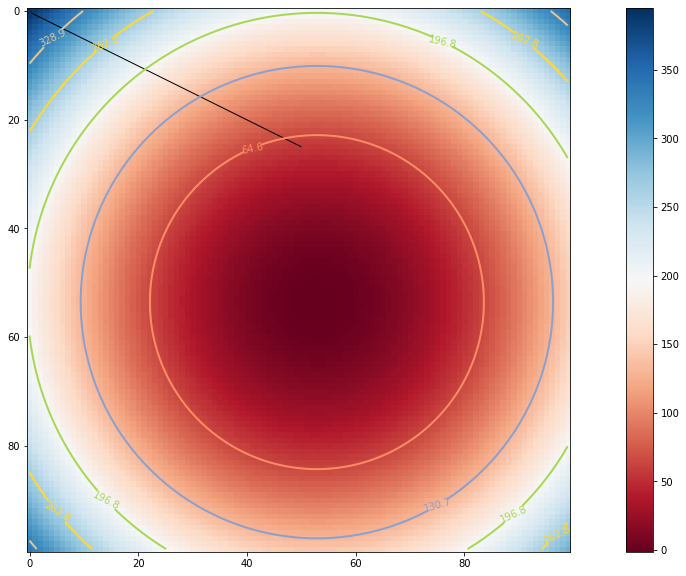

Эллиптичность: 10
[0.28571429 0.03571429]
Количество итераций:  3


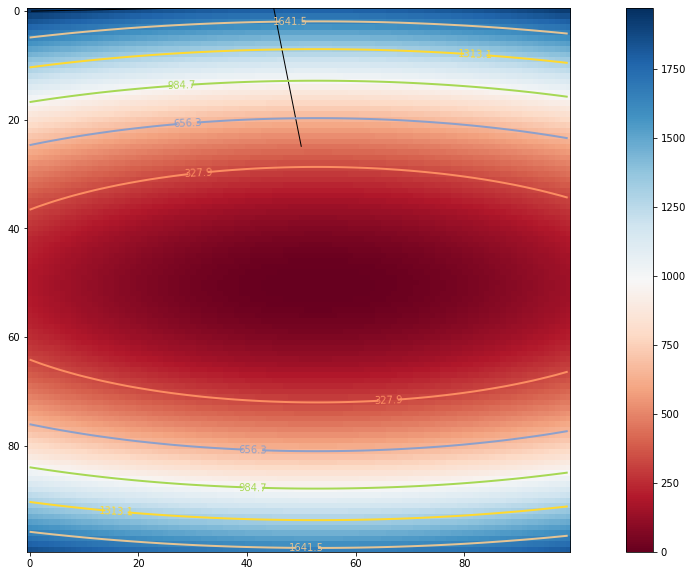

Эллиптичность: 100
[0.28571429 0.00357143]
Количество итераций:  3


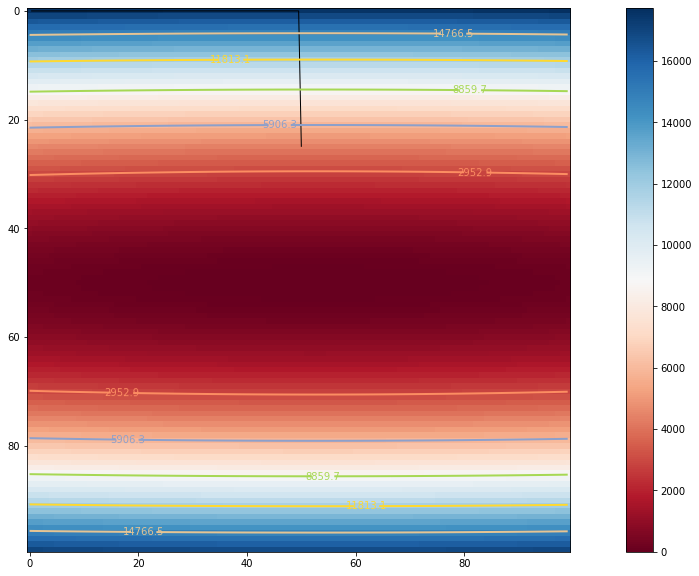

In [ ]:
RADS = 0

ellipsoid = []
iter_nums = []

for i in range(3):
  print(f'Эллиптичность: {10 ** i}')
  A[1][1] = A[0][0] * (10 ** i)
  root, iters = conjugate_gradient(
    quadratic_form_vec, 
    get_gradient_vec(quadratic_form_vec, 2), 
    np.asarray(start)
  )
  print(root)
  print('Количество итераций: ', len(iters))
  ellipsoid.append(A[1][1] / A[0][0])
  iter_nums.append(len(iters))
  draw_func(quadratic_form, (5, -5), (5, -5), 6, iters)

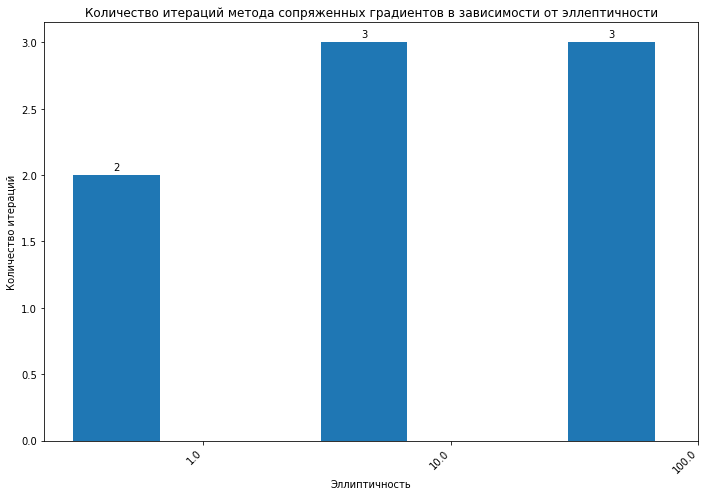

In [ ]:
x = np.arange(len(ellipsoid))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x - width, iter_nums, width)

ax.set_ylabel('Количество итераций')
ax.set_xlabel('Эллиптичность')
ax.set_title('Количество итераций метода сопряженных градиентов\
 в зависимости от эллептичности')
ax.set_xticks(x)
ax.set_xticklabels(ellipsoid, rotation = 45, ha="right")

for rect in rects:
  height = rect.get_height()
  ax.annotate('{}'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
              xytext=(0, 3),  # 3 points vertical offset
              textcoords="offset points",
              ha='center', va='bottom')

fig.set_figheight(7)
fig.set_figwidth(10)
fig.tight_layout()

plt.show()

Повышение эллиптичности не слишком сказалось на количестве итераций. Повышение всего на 1 итерацию не является существенным ухудшением, а потому можно считать, что данный метод является вполне оптимальным для двумерной квадратичной формы.

Теперь проверим влияние повышения размерности квадратичной формы на работу метода.

In [ ]:
dims = [2, 5, 10]
iter_nums = []
time_cg = []

for i in range(3):
  dim = dims[i]
  print(f'Размерность: {dim}')
  start_time = time.time()
  root, iters = conjugate_gradient(
    quadratic_form_vec, 
    get_gradient_vec(quadratic_form_ndim, dim), 
    np.asarray([3] * dim)
  )
  time_cg.append(time.time() - start_time)
  print('Количество итераций: ', len(iters))
  iter_nums.append(len(iters))
  print('\n----------------------------------\n')

Размерность: 2
Количество итераций:  15

----------------------------------

Размерность: 5
Количество итераций:  34

----------------------------------

Размерность: 10
Количество итераций:  73

----------------------------------



In [ ]:
time_cg

[0.05292987823486328, 0.2767608165740967, 1.3923513889312744]

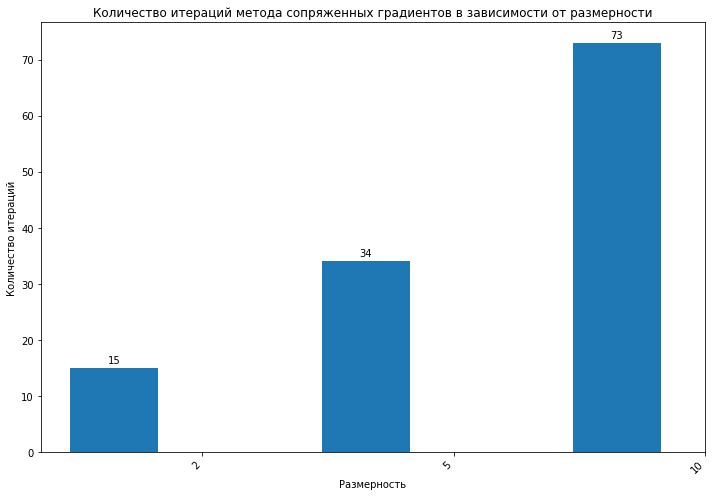

In [ ]:
x = np.arange(len(dims))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x - width, iter_nums, width)

ax.set_ylabel('Количество итераций')
ax.set_xlabel('Размерность')
ax.set_title('Количество итераций метода сопряженных градиентов\
 в зависимости от размерности')
ax.set_xticks(x)
ax.set_xticklabels(dims, rotation = 45, ha="right")

for rect in rects:
  height = rect.get_height()
  ax.annotate('{}'.format(height),
              xy=(rect.get_x() + rect.get_width() / 2, height),
              xytext=(0, 3),  # 3 points vertical offset
              textcoords="offset points",
              ha='center', va='bottom')

fig.set_figheight(7)
fig.set_figwidth(10)
fig.tight_layout()

plt.show()

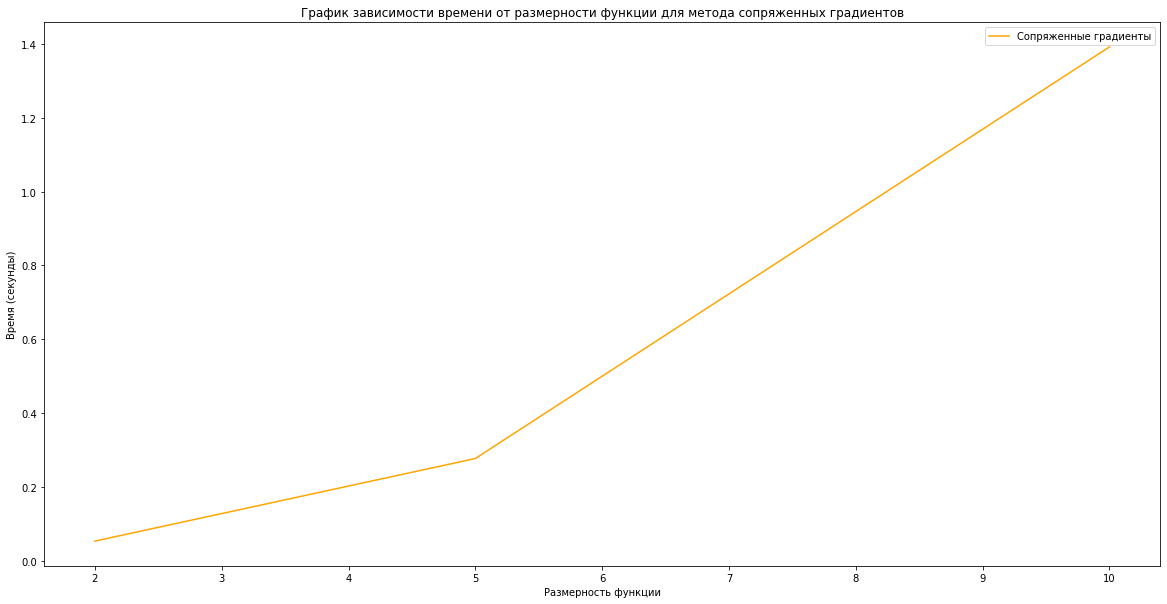

In [ ]:
plt.figure(figsize=(20,10))
plt.title("График зависимости времени от размерности функции для метода \
сопряженных градиентов")
plt.plot(dims, time_cg, color="orange", label="Сопряженные градиенты")
plt.ylabel('Время (секунды)')
plt.xlabel('Размерность функции')
plt.legend()
plt.show()

Рост размерности значительно влияет на время работы и количество итераций. Метод сопряженных градиентов очень сильно замедляется. Уже на 10 требуется около 6 минут на выполнение, а потому можно предположить, что метод плохо приспособлен к высоким размерностям.

Сравним с другими методами (Ньютон, скорейший спуск, ДФП). Все эти методы, как и метод сопряженных градиентов зависят от подсчёта градиента или даже гессиана. Python позволяет считать производные только для функций размерностью до 255 при помощи библиотеки sympy.

Запустим  метод сопряженных градиентов. Даже при максимальном количестве итераций в 30 метод уже тратил не мало времени на работу с 22-мерной квадратичной формой, потому было принято решение остановить его выполнение, поскольку он слишком долго работал.

In [ ]:
time_cg1 = []

i = 2
while i < 1000:
  try:
    start_time = time.time()
    x, its = conjugate_gradient(
        quadratic_form_ndim,
        get_gradient_vec(quadratic_form_ndim, i),
        np.array([3] * i),
        n=30
    )
    time_cg1.append(time.time() - start_time)
    print(f'Оптимизировано для размерности {i}')
    if i < 102:
      i += 20
    else:
      i += 200
  except:
    print(f'Данная реализация метода сопряженных градиентов \
    не смогла работать с {i}-мерной функцией')
    break

Оптимизировано для размерности 2
Оптимизировано для размерности 22
Данная реализация метода сопряженных градиентов     не смогла работать с 42-мерной функцией


Метод Ньютона работал вполне быстро. Даже при квадратичной форме 102-й размерности он сработал за примерно 2.5 минуты. На фоне других методов его результаты смотряться более выигрышно.

In [ ]:
time_nw = []

i = 2
while i < 1000:
  try:
    start_time = time.time()
    x, its = newton_ndim(
        quadratic_form_ndim,
        get_gradient_vec(quadratic_form_ndim, i),
        get_hessian_vec(quadratic_form_ndim, i),
        np.array([3] * i)
    )
    time_nw.append(time.time() - start_time)
    print(f'Оптимизировано для размерности {i}')
    if i < 102:
      i += 20
    else:
      i += 200
  except:
    print(f'Данная реализация метода Ньютона \
    не смогла работать с {i}-мерной функцией')
    break

Оптимизировано для размерности 2
Оптимизировано для размерности 22
Оптимизировано для размерности 42
Оптимизировано для размерности 62
Оптимизировано для размерности 82
Оптимизировано для размерности 102
Данная реализация метода сопряженных градиентов     не смогла работать с 302-мерной функцией


Метод скорейшего спуска работал довольно медленно на фоне метода Ньютона, хотя для его работы не требуется подсчёт Гессиана. Проблема в том, что он требует слишком много итераций.

In [ ]:
time_sd = []

i = 2
while i < 1000:
  try:
    start_time = time.time()
    x, its = msd_ndim(
        get_gradient_vec(quadratic_form_ndim, i),
        np.array([3] * i)
    )
    time_sd.append(time.time() - start_time)
    print(f'Оптимизировано для размерности {i}')
    if i < 102:
      i += 20
    else:
      i += 200
  except:
    print(f'Данная реализация метода скорейшего спуска \
    не смогла работать с {i}-мерной функцией')
    break

Оптимизировано для размерности 2
Оптимизировано для размерности 22
Оптимизировано для размерности 42
Оптимизировано для размерности 62
Оптимизировано для размерности 82
Оптимизировано для размерности 102
Данная реализация метода скорейшего спуска     не смогла работать с 302-мерной функцией


Метод Дэвидона-Флетчера-Пауэлла также работал более медленно, чем метод Ньютона. До 100-й размерности этот метод обганял скорейший спуск, но на 102-й размерности он проиграл примерно в 10-20 секунд.

In [ ]:
time_dfp = []

i = 2
while i < 1000:
  try:
    start_time = time.time()
    res = dfp(
        quadratic_form_ndim,
        get_gradient_vec(quadratic_form_ndim, i),
        get_hessian_vec(quadratic_form_ndim, i),
        np.array([3] * i)
    )
    time_dfp.append(time.time() - start_time)
    print(f'Оптимизировано для размерности {i}')
    if i < 102:
      i += 20
    else:
      i += 200
  except:
    print(f'Данная реализация метода ДФП \
    не смогла работать с {i}-мерной функцией')
    break

Оптимизировано для размерности 2
Оптимизировано для размерности 22
Оптимизировано для размерности 42
Оптимизировано для размерности 62
Оптимизировано для размерности 82
Оптимизировано для размерности 102
Данная реализация метода ДФП     не смогла работать с 302-мерной функцией


Отобразим все расчёты времени на графике, чтобы более явно сравнить работу методов.

In [ ]:
dims_cg1 = [(20 * i) + 2 for i, v in enumerate(time_cg1)]
dims_nw1 = [(20 * i) + 2 for i, v in enumerate(time_nw)]
dims_dfp1 = [(20 * i) + 2 for i, v in enumerate(time_dfp)]
dims_sd1 = [(20 * i) + 2 for i, v in enumerate(time_sd)]

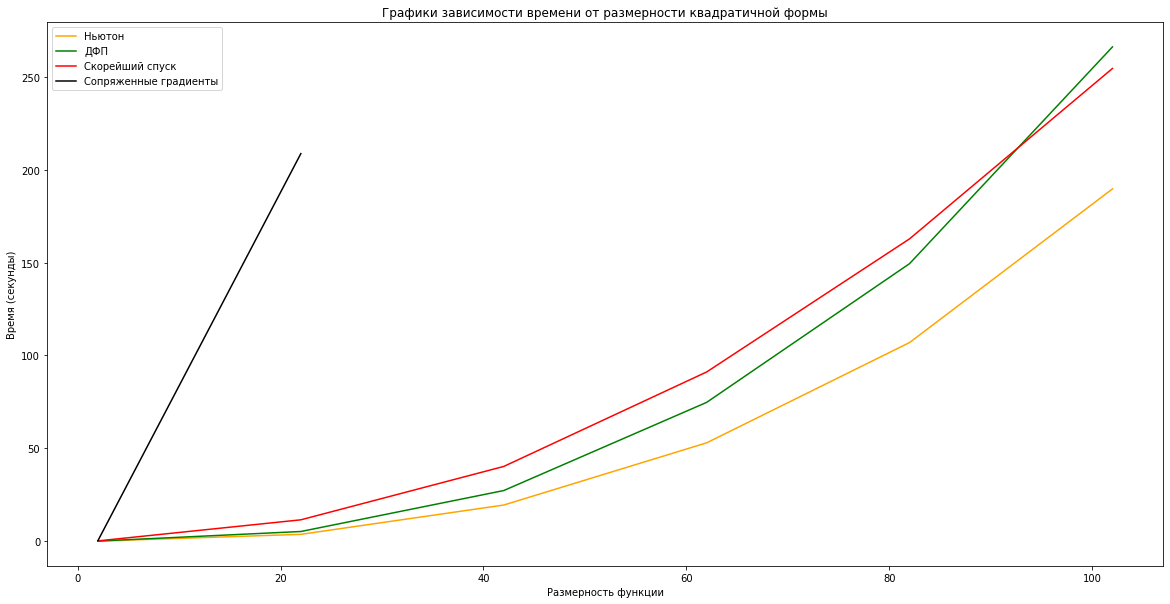

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Графики зависимости времени от размерности квадратичной формы")
plt.plot(dims_nw1, time_nw, color="orange", label="Ньютон")
plt.plot(dims_dfp1, time_dfp, color="green", label="ДФП")
plt.plot(dims_sd1, time_sd, color="red", label="Скорейший спуск")
plt.plot(dims_cg1, time_cg1, color="black", label="Сопряженные градиенты")
plt.ylabel('Время (секунды)')
plt.xlabel('Размерность функции')
plt.legend()
plt.show()

На графике видно, что ДФП и метод Ньютона до 20 размерности работают примерно одинаково быстро. Ньютон оказался самым быстрым среди предложенных методов. Метод сопряженных градиентов очень быстро растёт уже на малых размерностях. Метод скорейшего спуска начинает работать быстрее на размерностях ближе к 100.

Таким образом, был изучен метод сопряженных градиентов. Он был проверен на разных размерностях, при разных характеристиках квадратичной формы.

# Лабораторная работа №5

Цель лабораторной работы - изучить методы нулевого порядка. Реализуем заданные методы и сравним их с другими уже реализованными.

Сначала реализуем метод Хука-Дживса. Метод принимает функцию, старт, сдвигов и эпсилон.

In [ ]:
def hooke_jeeves(function, x0, err=1, epsilon=0.0001):
    # создаём вектор сдвигов для каждого измерения функции
    dims = x0.size
    e = np.eye(dims) * err
    
    # считаем значение функции на старте
    x = x0
    fx = function(x)
    
    num_iterations = 0
    iters = []

    # пока сдвиг больше эпсилон
    while e[1, 1] > epsilon:
        current_position = x
        # проходим по всем измерениям
        for i in range(0, dims):
            # сдвигаем позицию на сдвиг и пересчитываем функцию
            z = current_position + e[:, i]
            y = function(z)
            num_iterations += 1
            
            # если значение функции меньше, то переходим на новую позицию
            if y < fx:
                current_position = z
                fx = y
                iters.append(x)
            # в ином случае считаем (нынешнюю позицию - сдвиг)
            else:
                z = current_position - e[:, i]
                y = function(z)
                num_iterations += 1
                # если значение функции меньше, то переходим на новую позицию
                if y < fx:
                    current_position = z
                    fx = y
                iters.append(x)
                
        # если позиция не изменилась, то меняем сдвиги
        if np.all(current_position == x):
            e *= 0.5

        # иначе
        else:
            # пересчитываем х и значение функции
            x1 = current_position + (current_position - x)
            f1 = function(x1)
            num_iterations += 1
            x = current_position
            iters.append(x)
            
            # если новое значение функции меньше нынешнего
            if f1 < fx:
                x = x1
                fx = f1

                # проходим по всем измерениям
                for i in range(0, dims):
                    # считаем потенциальный новый x
                    z = x1 - e[:, i]
                    y = function(z)
                    num_iterations += 1

                    # если значение функции в новой точке меньше
                    # заменяем x и f(x)
                    if y < f1:
                        x = z
                        fx = y
                    iters.append(x)

    return x, fx, num_iterations, np.array(iters)

Протестируем метод на наборе функций из предидущих лабораторных работ.

[1.0390625  1.07971191]
Количество итераций: 258198


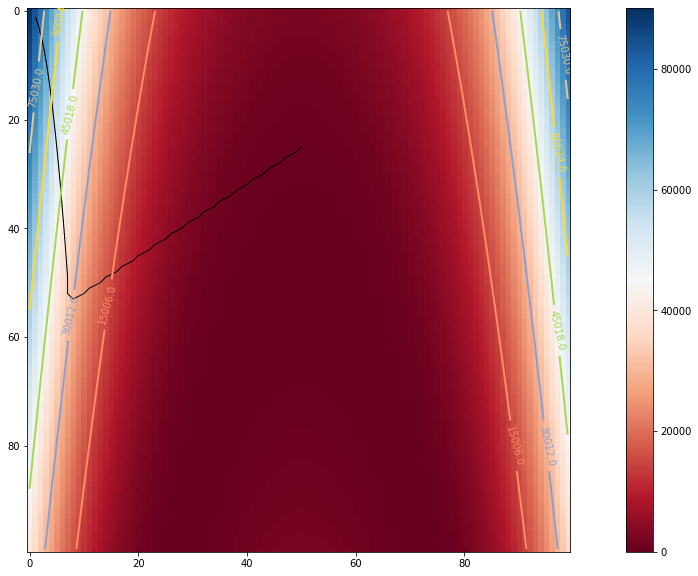

In [ ]:
x, val, nit, its = hooke_jeeves(rozenbrock_vec, np.array([start[0], start[1]]).T)
print(x)
print(f'Количество итераций: {nit}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, its)

[ 3.58447266 -1.84814453]
Количество итераций: 239


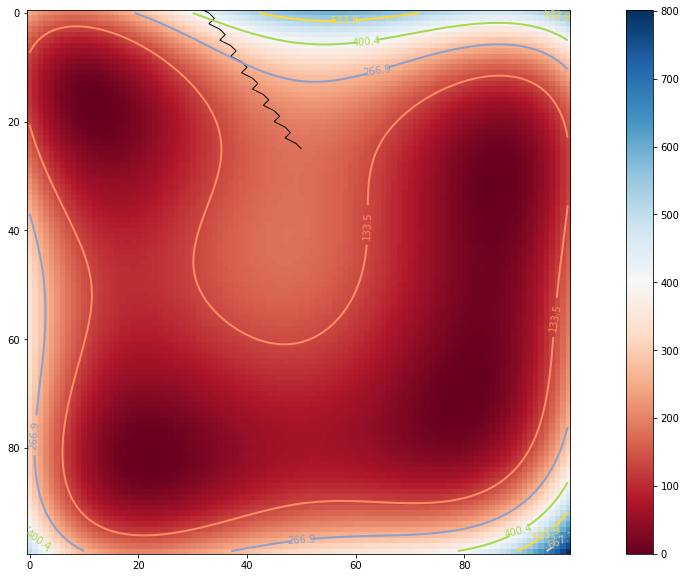

In [ ]:
x, val, nit, its = hooke_jeeves(himmelbau_vec, np.array([start[0], start[1]]).T)
print(x)
print(f'Количество итераций: {nit}')
draw_func(himmelbau, (5, -5), (5, -5), 6, its)

[0.2857666  0.35717773]
Количество итераций: 250


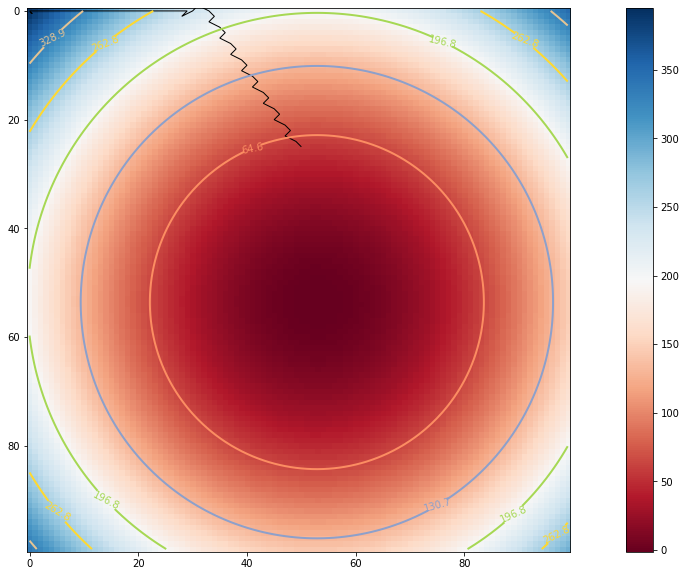

In [ ]:
x, val, nit, its = hooke_jeeves(quadratic_form_vec, np.array([start[0], start[1]]).T)
print(x)
print(f'Количество итераций: {nit}')
draw_func(quadratic_form, (5, -5), (5, -5), 6, its)

Количество итераций заметно отличается для разных функций (от 200 до сотен тысяч). При этом метод довольно точно находит экстремум даже из точки далёкой от задуманого экстремума.

Теперь реализуем метод Нелдера-Мида (метод симплексов).

In [ ]:
# генерация симплексов
def generate_simplex(x0, step=0.1):
    """
    Create a simplex based at x0
    """
    yield x0.copy()
    for i,_ in enumerate(x0):
        x = x0.copy()
        x[i] += step
        yield x


# преобразовываем симплекс в массив точек
def make_simplex(x0, step=0.1):
    return np.array(list(generate_simplex(x0, step)))


# считаем центроид точек
def centroid(points):
    return np.mean(points, axis=0)

# отражение симплекса
def reflection(func, res, x0, refl):
    # отражаем точку
    xr = x0 + refl*(x0 - res[-1][0])
    rscore = func(xr)

    # новый результат
    new_res = res[:]

    # если прогресс, то возвращаем результат
    progress = rscore < new_res[-2][1]
    if progress:
        new_res[-1] = (xr, rscore)
        return new_res
    return None


# функция для расширения симплекса
def expansion(func, res, x0, ext):
    # берём последнюю точку и сравниваем с первой
    xr, rscore = res[-1]
    if rscore < res[0][1]:
        # пересчитываем последнюю точку
        xe = xr + ext * (xr - x0)
        escore = func(xe)
        # если результат лучше изначального, то возвращаем его
        if escore < rscore:
            new_res = res[:]
            new_res[-1] = (xe, escore)
            return new_res
    return None


# сокращение симплекса
def contraction(func, res, x0, cont):
    # пересчитываем последнюю точку
    xc = x0 + cont * (res[-1][0] - x0)
    cscore = func(xc)

    new_res = res[:]
    
    # если результат стал лучше, то возвращаем его
    progress = cscore < new_res[-1][1]
    if progress:
        new_res[-1] = (xc, cscore)
        return new_res
    return None


# функция для уменьшения симплекса
def reduction(func, res, red):
    # пересчитываем точки и возвращаем их новые версии
    pts = np.array([pts for (pts,_) in res])
    dirs = pts - pts[0]
    reduced_points = pts[0] + red*dirs
    new_res = [(pt, func(pt)) for pt in reduced_points]
    return new_res


def nelder_mead(func, points, max_iter=1000, no_improve_thr=10e-6, 
                max_stagnations=10, reflect = 1., ext = 1., 
                cont = 0.5, red = 0.5):
    # переменная для хранения предидущего лучшего результата
    prev_best = func(points[0])
    # счётчик стагнаций
    stagnations = 0
    # результат
    res = [(pt, func(pt)) for pt in points]
    # итерации
    hist = []

    # пока не достигли максимального количества итераций
    for iters in range(max_iter):
        # сортируем результаты
        res = sorted(res, key = lambda x: x[1])
        hist.append(res[0][0])
        # сохраняем результат
        best = res[0][1]

        # проверяем стал ли результат лучше
        if best < prev_best - no_improve_thr:
            stagnations = 0
            prev_best = best
        else:
            stagnations += 1
    
        # если превысили максимальное количество стагнаций
        if stagnations >= max_stagnations:
            return res[0], np.array(hist)

        # считаем центроид точек
        pts = np.array([tup[0] for tup in res[:-1]])
        x0 = centroid(pts)

        # считаем новый результат
        new_res = reflection(func, res, x0, reflect)
        # если не null
        if new_res is not None:
            # расширяем симплекс
            exp_res = expansion(func, new_res, x0, ext)
            # если не null, то сохраняем новый результат
            if exp_res is not None:
                new_res = exp_res
        # иначе
        else:
            # сокращаем симплекс
            new_res = contraction(func, res, x0, cont)
            # если не null, то уменшаем симплекс
            if new_res is None:
                new_res = reduction(func, res, red)

        res = new_res
    else:
        return np.nan, np.empty(0)

[1.00009071 1.00018983]
Количество итераций: 270


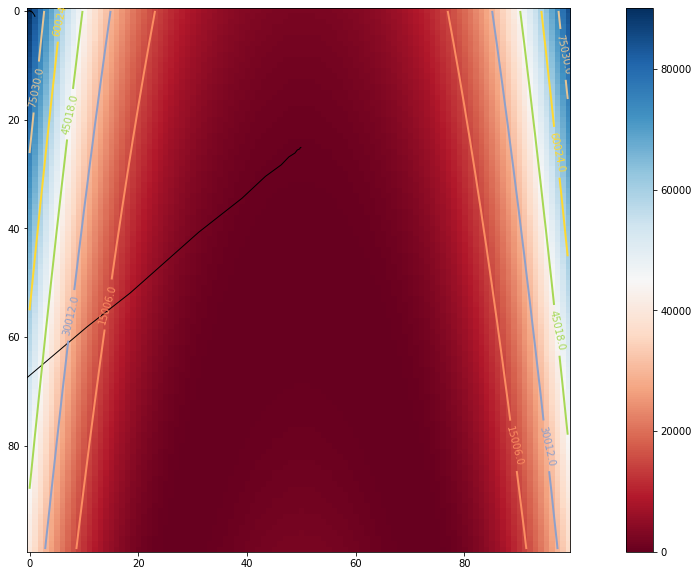

In [ ]:
x, its = nelder_mead(rozenbrock_vec, 
                     list(generate_simplex(np.array([start[0], start[1]]))))
print(x[0])
print(f'Количество итераций: {len(its)}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, its)

[-2.80514457  3.13128318]
Количество итераций: 75


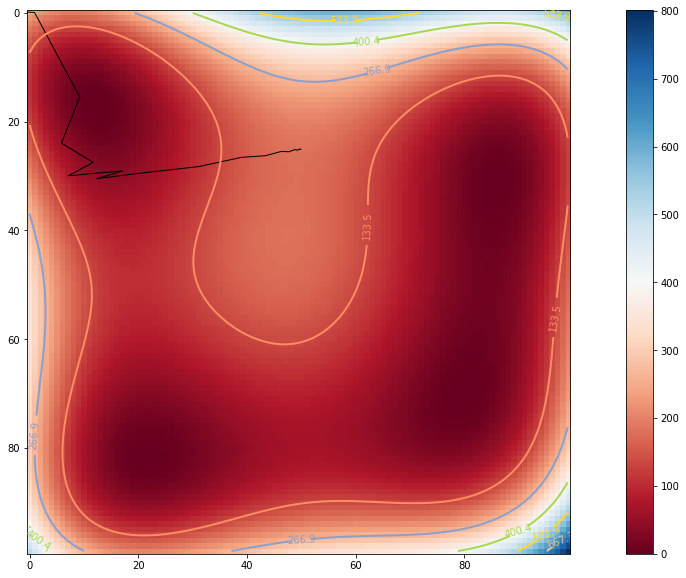

In [ ]:
x, its = nelder_mead(himmelbau_vec, 
                     list(generate_simplex(np.array([start[0], start[1]]))))
print(x[0])
print(f'Количество итераций: {len(its)}')
draw_func(himmelbau, (5, -5), (5, -5), 6, its)

[0.28566393 0.35713009]
Количество итераций: 71


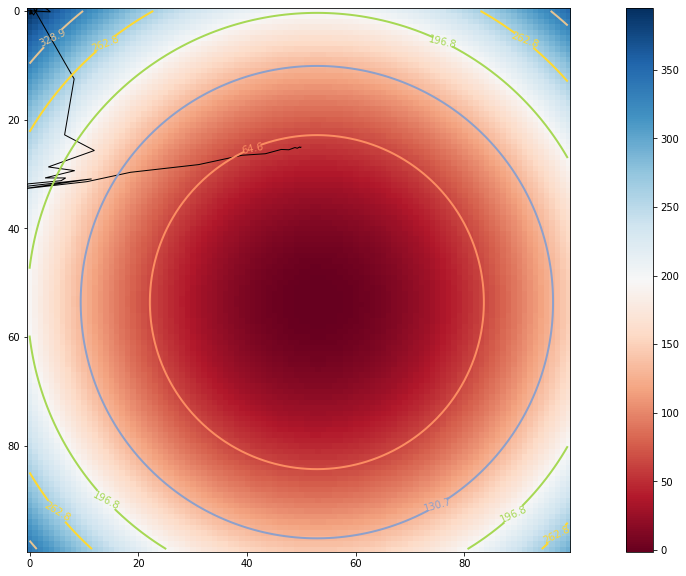

In [ ]:
x, its = nelder_mead(quadratic_form_vec, 
                     list(generate_simplex(np.array([start[0], start[1]]))))
print(x[0])
print(f'Количество итераций: {len(its)}')
draw_func(quadratic_form, (5, -5), (5, -5), 6, its)

Метод Нелдера-Мида сработал за значительно меньшее количество итераций и также оказался довольно точным.

Теперь реализуем по-координатный спуск.

In [ ]:
def coordinate_descent(func, start, epsilon=0.0001):
    # стартовая точка
    p = start.copy()
    # сдвиг
    dp = [1.0] * start.shape[0]
    # лучшее значение
    best_err = func(p)
    hst = []

    # пока сдвиг больше эпсилон
    while sum(dp) > epsilon:
        hst.append(p.copy())
        # обходим вектор p
        for i in range(len(p)):
            p[i] += dp[i]
            err = func(p)
            # если результат стал лучше, то увеличиваем сдвиг
            if err < best_err:
                best_err = err
                dp[i] *= 1.1
            # иначе
            else:
                # возвращаем значение
                p[i] -= 2 * dp[i]
                err = func(p)
                # если стало лучше, то увеличим сдвиг
                if err < best_err:
                    best_err = err
                    dp[i] *= 1.1
                else:
                    # иначе уменьшаем сдвиг
                    p[i] += dp[i]
                    dp[i] *= 0.9
    
    return p, np.array(hst)

[1.00049841 1.00096677]
Количество итераций: 20105


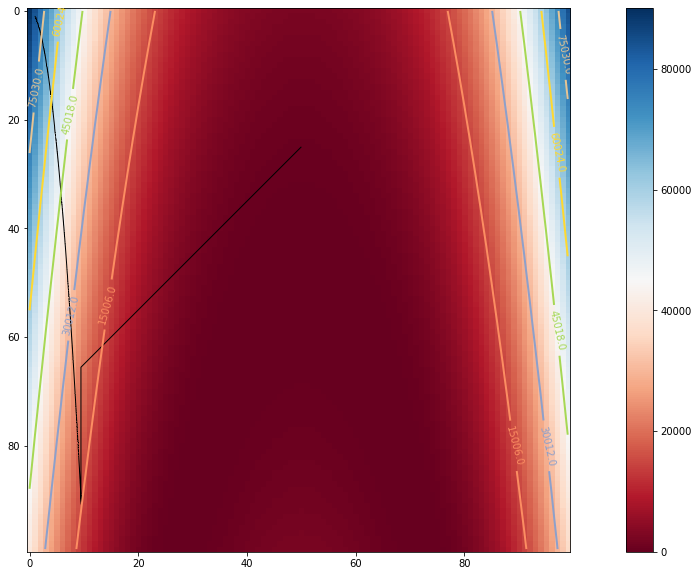

In [ ]:
x, its = coordinate_descent(rozenbrock_vec, np.asarray(start))
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(rozenbrock, (5, -5), (5, -5), 6, its)

[3.00002713 1.99997498]
Количество итераций: 226


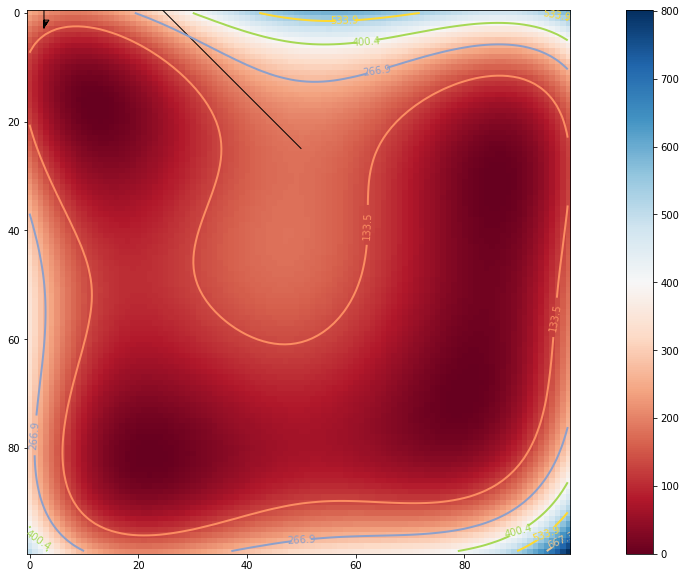

In [ ]:
x, its = coordinate_descent(himmelbau_vec, np.array(start))
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(himmelbau, (5, -5), (5, -5), 6, its)

[0.28567288 0.35714849]
Количество итераций: 632


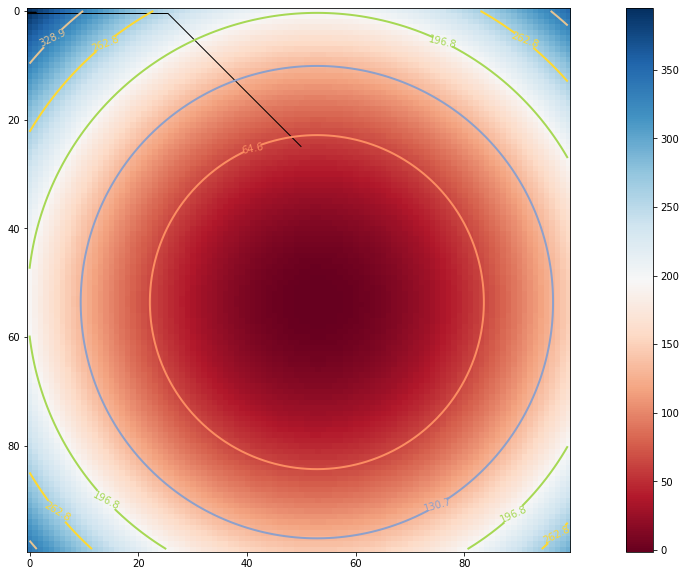

In [ ]:
x, its = coordinate_descent(quadratic_form_vec, np.array(start))
print(x)
print(f'Количество итераций: {len(its)}')
draw_func(quadratic_form, (5, -5), (5, -5), 6, its)

Зададим расширенную функцию Розенброка, чтобы проверить как методы будут работать при смене размерности функции.

In [ ]:
def extended_rozenbrock(x):
  result = []
  for i in range(x.shape[0] - 1):
    result.append((1 - x[i]) ** 2 + 100 * (x[i + 1] - x[i] ** 2) ** 2)
  return sum(result)

Поскольку требовалось, чтоб начальное положение было в формате (-1.2, 0, -1.2, ...), создадим функцию, которая будет генерировать входной вектор n-ой размерности.

In [ ]:
def get_x0(n):
  inp = []

  for i in range(n):
    if i % 2 == 0:
      inp.append(-1.2)
    else:
      inp.append(0)
  
  return np.asarray(inp)

Замерим время для метода Хука-Дживса. Поскольку метод работал слишком долго ближе к 100 измерениям, принято решение ограничится несколькими пробами в пределах 102 измерений. Результат отображен на графике дальше.

In [ ]:
time_arr_hj = []

i = 2
while i <= 102:
  try:
    start_time = time.time()
    x, val, nit, its = hooke_jeeves(
        extended_rozenbrock, 
        get_x0(i).T
    )
    time_arr_hj.append(time.time() - start_time)
    print(f'Оптимизировано для размерности {i}')
    i += 20
  except:
    print(f'Данная реализация метода Хука-Дживса \
    не смогла работать с {i}-ной функцией')
    break

Теперь проверим метод скорейшего спуска. Поскольку он требует подсчитывать градиент для оптимизации, то его значительно ограничивает библиотека sympy, которая была использована для подсчета производных. Она может считать производные для функций, у которых не более 255 переменных. Поэтому проверим сможет ли данный метод дать хороший результат на малых размерностях. Для ускорения расчета бралась каждая 20 размерность от 2 до 102.

In [ ]:
time_arr_sd = []

i = 2
while i < 1000:
  try:
    start_time = time.time()
    x, its = msd_ndim(
      get_gradient_vec(extended_rozenbrock, i), 
      get_x0(i)
    )
    time_arr_sd.append(time.time() - start_time)
    print(f'Оптимизировано для размерности {i}')
    if i < 100:
      i += 20
    else:
      i += 200
  except:
    print(f'Данная реализация метода скорейшего спуска \
    не смогла работать с {i}-ной функцией')
    break

Оптимизировано для размерности 2
Оптимизировано для размерности 22
Оптимизировано для размерности 42
Оптимизировано для размерности 62
Оптимизировано для размерности 82
Оптимизировано для размерности 102
Данная реализация метода Хука-Дживса     не смогла работать с 302-ной функцией


Функция Нелдера-Мида считала экстремумы без явного ухудшения скорости после увеличения размерности. Она единственная, где удалось посчитать время даже для размерносте близких к 1000.

In [ ]:
time_arr_nm = []

i = 2
while i < 1000:
  try:
    start_time = time.time()
    x, its = nelder_mead(extended_rozenbrock, 
                     list(generate_simplex(get_x0(i))))
    time_arr_nm.append(time.time() - start_time)
    print(f'Оптимизировано для размерности {i}')
    i += 20
  except:
    print(f'Данная реализация метода Нелдера-Мида \
    не смогла работать с {i}-мерной функцией')
    break

Оптимизировано для размерности 2
Оптимизировано для размерности 22
Оптимизировано для размерности 42
Оптимизировано для размерности 62
Оптимизировано для размерности 82
Оптимизировано для размерности 102
Оптимизировано для размерности 122
Оптимизировано для размерности 142
Оптимизировано для размерности 162
Оптимизировано для размерности 182
Оптимизировано для размерности 202
Оптимизировано для размерности 222
Оптимизировано для размерности 242
Оптимизировано для размерности 262
Оптимизировано для размерности 282
Оптимизировано для размерности 302
Оптимизировано для размерности 322
Оптимизировано для размерности 342
Оптимизировано для размерности 362
Оптимизировано для размерности 382
Оптимизировано для размерности 402
Оптимизировано для размерности 422
Оптимизировано для размерности 442
Оптимизировано для размерности 462
Оптимизировано для размерности 482
Оптимизировано для размерности 502
Оптимизировано для размерности 522
Оптимизировано для размерности 542
Оптимизировано для размерн

Теперь проверим метод сопряженных градиентов. При максимальном количестве итераций в 1000 время начинало слишком сильно расти уже для 22 измерений. Потому максимальное количество итераций было уменшено до 100. У этого метода также возникла проблема с производными функций размерности больше чем 255.

In [ ]:
time_arr_cg = []

i = 2
while i < 1000:
  try:
    start_time = time.time()
    x, its = conjugate_gradient(
        extended_rozenbrock, 
        get_gradient_vec(extended_rozenbrock, i), 
        get_x0(i),
        100
    )
    time_arr_cg.append(time.time() - start_time)
    print(f'Оптимизировано для размерности {i}')
    if i < 102:
      i += 20
    else:
      i += 200
  except:
    print(f'Данная реализация метода сопряженных градиентов \
    не смогла работать с {i}-мерной функцией')
    break

Оптимизировано для размерности 2
Оптимизировано для размерности 22
Оптимизировано для размерности 42
Оптимизировано для размерности 62
Оптимизировано для размерности 82
Оптимизировано для размерности 102
Данная реализация метода сопряженных градиентов     не смогла работать с 302-мерной функцией


ДФП работал явно быстрее всех кроме метода Нелдера-Мида, но у него также есть проблема с подсчётом производных.

In [ ]:
time_arr_dfp = []

i = 2
while i < 1000:
  try:
    start_time = time.time()
    x, its, n = dfp(extended_rozenbrock, 
      get_gradient_vec(extended_rozenbrock, i), 
      get_hessian_vec(extended_rozenbrock, i),
      get_x0(i)
    )
    time_arr_dfp.append(time.time() - start_time)
    print(f'Оптимизировано для размерности {i}')
    if i < 102:
      i += 20
    else:
      i += 200
  except:
    print(f'Данная реализация метода ДФП \
    не смогла работать с {i}-мерной функцией')
    break

Оптимизировано для размерности 2
Оптимизировано для размерности 22
Оптимизировано для размерности 42
Оптимизировано для размерности 62
Оптимизировано для размерности 82
Оптимизировано для размерности 102
Данная реализация метода ДФП     не смогла работать с 302-мерной функцией


Отобразим графики роста времени в зависимости от роста размерности. Самым быстрым методом оказался метод Нелдера-Мида. Для малых размерностей (до ~23) метод Хука-Дживса также работает довольно быстро и обгоняет конкурентов (кроме Нелдера-Мида). ДФП обганял всех кроме Нелдера-Мида после ~26. При максимальном числе итераций в 100 метод сопряженных градиентов слегка обганяет метод скорейшего спуска, но если вернуть это значение на 1000, то скорейший спуск окажется сильно быстрее. Время выполнения для метода Нелдера-Мида также растёт, но сильно медленней, чем для любого другого метода. При размерности близкой к 1000 время только начало приближаться к 2.5 секундам.

In [ ]:
dims_hj = [(20 * i) + 2 for i, v in enumerate(time_arr_hj)]
dims_nm = [(20 * i) + 2 for i, v in enumerate(time_arr_nm)]
dims_dfp = [(20 * i) + 2 for i, v in enumerate(time_arr_dfp)]
dims_sd = [(20 * i) + 2 for i, v in enumerate(time_arr_sd)]
dims_cg = [(20 * i) + 2 for i, v in enumerate(time_arr_cg)]

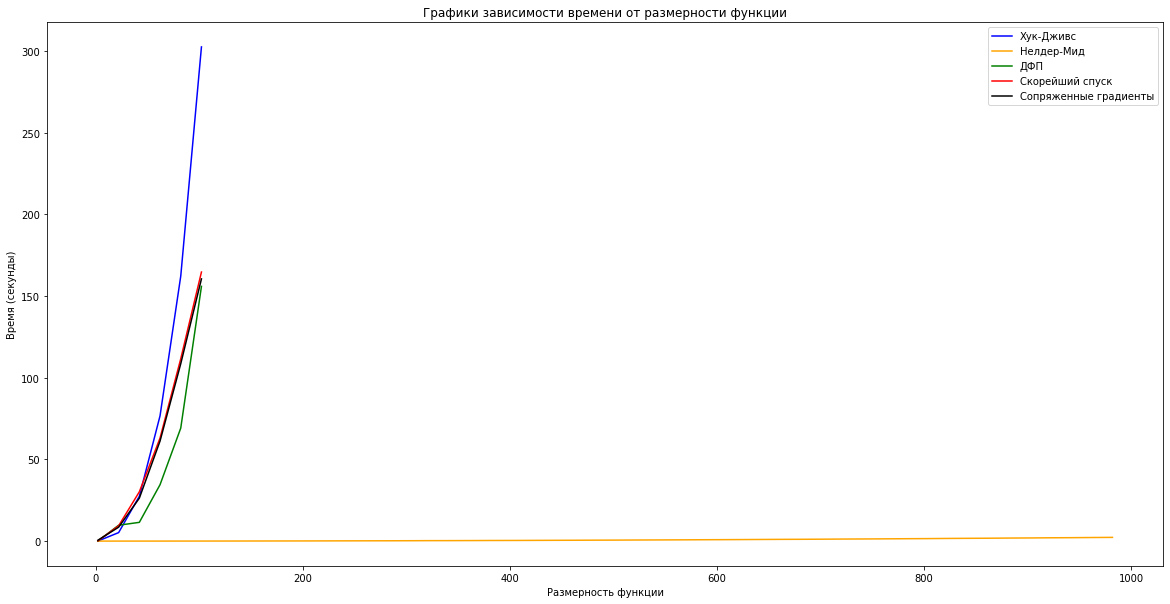

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Графики зависимости времени от размерности функции")
plt.plot(dims_hj, time_arr_hj, color="blue", label="Хук-Дживс")
plt.plot(dims_nm, time_arr_nm, color="orange", label="Нелдер-Мид")
plt.plot(dims_dfp, time_arr_dfp, color="green", label="ДФП")
plt.plot(dims_sd, time_arr_sd, color="red", label="Скорейший спуск")
plt.plot(dims_cg, time_arr_cg, color="black", label="Сопряженные градиенты")
plt.ylabel('Время (секунды)')
plt.xlabel('Размерность функции')
plt.legend()
plt.show()

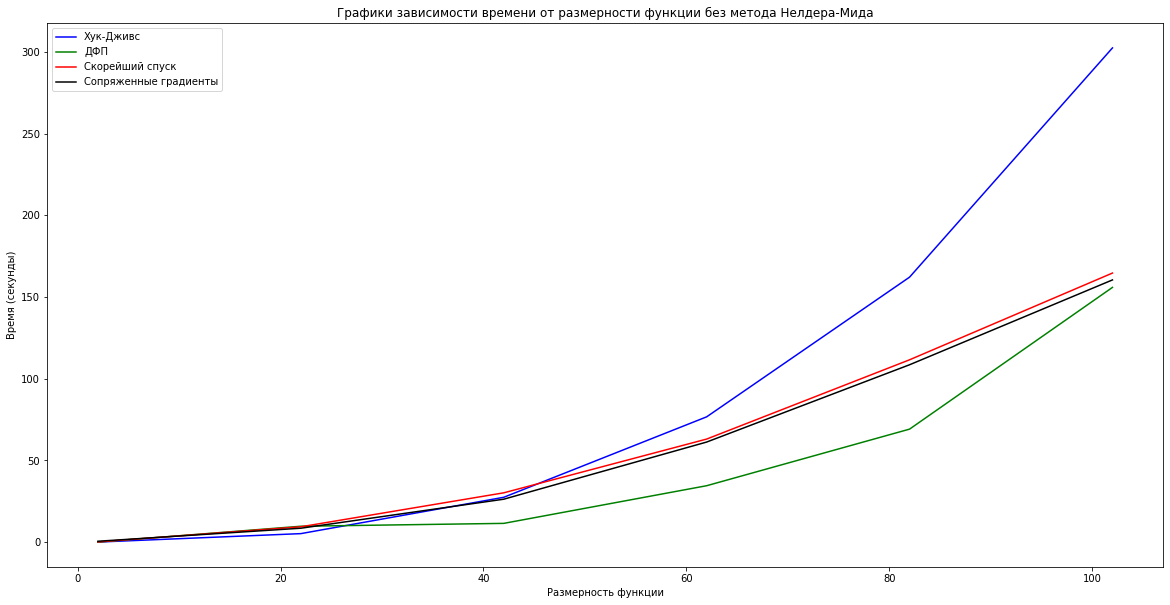

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Графики зависимости времени от размерности функции \
без метода Нелдера-Мида")
plt.plot(dims_hj, time_arr_hj, color="blue", label="Хук-Дживс")
plt.plot(dims_dfp, time_arr_dfp, color="green", label="ДФП")
plt.plot(dims_sd, time_arr_sd, color="red", label="Скорейший спуск")
plt.plot(dims_cg, time_arr_cg, color="black", label="Сопряженные градиенты")
plt.ylabel('Время (секунды)')
plt.xlabel('Размерность функции')
plt.legend()
plt.show()

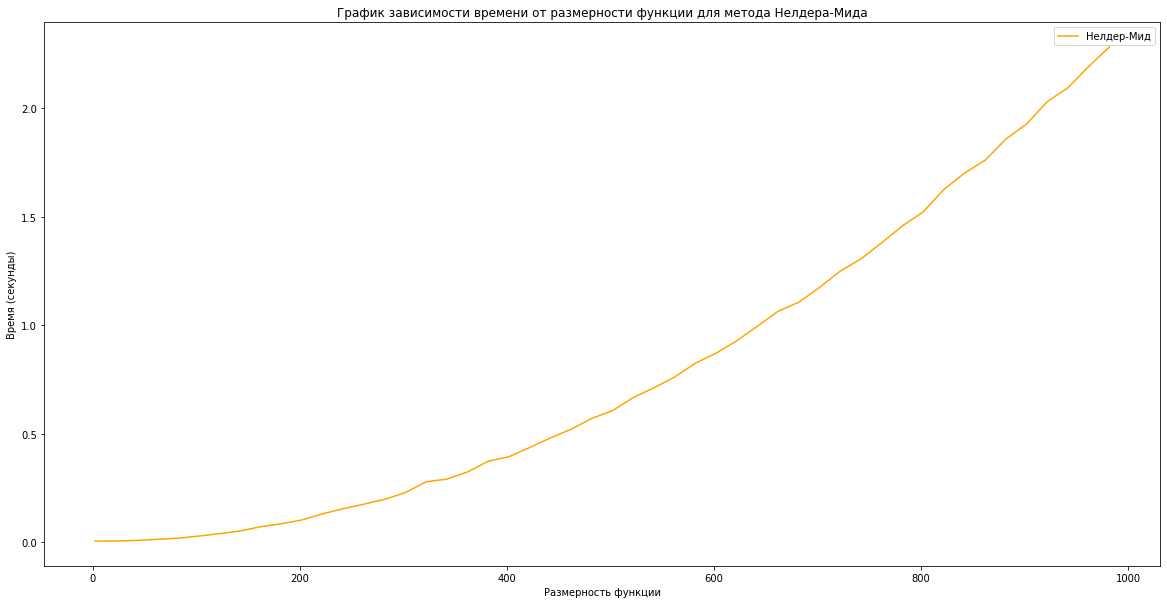

In [ ]:
plt.figure(figsize=(20,10))
plt.title("График зависимости времени от размерности функции для метода \
Нелдера-Мида")
plt.plot(dims_nm, time_arr_nm, color="orange", label="Нелдер-Мид")
plt.ylabel('Время (секунды)')
plt.xlabel('Размерность функции')
plt.legend()
plt.show()

Таким образом, были изучены и реализованы методы нулевого порядка. Также проведено сравнение этих методов с ранее реализованными. В ходе сравнений определено, что по времени наиболее совершенным является метод Нелдера-Мида. Для функций малой размерности оптимальным также является метод Хука-Дживса. При размерности около 30 и выше оптимальным методом может стать метод Дэвидона-Флетчера-Пауэлла.